# ABOUT THIS DATASET

Context :

This Dataset contains data from all Pokemons and their forms from the eight generations. It includes their number, name, primary and secondary type, abilities, base stats, performance vs other types, etc. 

Data was scrapped from Serebii, Bulbapedia and Pokemon databases.

# IMPORTS

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly import tools
from plotly.offline import init_notebook_mode, iplot

In [3]:
from sklearn.linear_model import SGDClassifier, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error
from sklearn.svm import LinearSVC

In [4]:
from google.colab import files

In [5]:
import io

In [6]:
# Display all columns and rows of of the dataframe :
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)

In [7]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [8]:
import warnings
warnings.filterwarnings('ignore')

## READ DATASET

In [9]:
data_to_load = files.upload()

Saving All_Pokemon.csv to All_Pokemon.csv


In [10]:
df_pokemon = pd.read_csv(io.BytesIO(data_to_load['All_Pokemon.csv']))
df_pokemon.head(10)

Number              Name Type 1  Type 2                    Abilities  HP  \
0       1         Bulbasaur  Grass  Poison  ['Chlorophyll', 'Overgrow']  45   
1       2           Ivysaur  Grass  Poison  ['Chlorophyll', 'Overgrow']  60   
2       3          Venusaur  Grass  Poison  ['Chlorophyll', 'Overgrow']  80   
3       3     Mega Venusaur  Grass  Poison                ['Thick Fat']  80   
4       4        Charmander   Fire     NaN     ['Blaze', 'Solar Power']  39   
5       5        Charmeleon   Fire     NaN     ['Blaze', 'Solar Power']  58   
6       6         Charizard   Fire  Flying     ['Blaze', 'Solar Power']  78   
7       6  Mega Charizard Y   Fire  Flying                  ['Drought']  78   
8       6  Mega Charizard X   Fire  Dragon              ['Tough Claws']  78   
9       7          Squirtle  Water     NaN     ['Rain Dish', 'Torrent']  44   

   Att  Def  Spa  Spd  Spe  BST        Mean  Standard Deviation  Generation  \
0   49   49   65   65   45  318   53.000000            8.640988         1.0   
1   62   63   80   80   60  405   67.500000            8.902247         1.0   
2   82   83  100  100   80  525   87.500000            8.902247         1.0   
3  100  123  122  120   80  625  104.166667           18.747592         6.0   
4   52   43   60   50   65  309   51.500000            8.995369         1.0   
5   64   58   80   65   80  405   67.500000            9.233093         1.0   
6   84   78  109   85  100  534   89.000000           11.575837         1.0   
7  104   78  159  115  100  634  105.666667           27.378012         6.0   
8  130  111  130   85  100  634  105.666667           20.154955         6.0   
9   48   65   50   64   43  314   52.333333            8.919392         1.0   

  Experience type  Experience to level 100  Final Evolution  Catch Rate  \
0     Medium Slow                  1059860              0.0          45   
1     Medium Slow                  1059860              0.0          45   
2     Medium Slow                  1059860              1.0          45   
3     Medium Slow                  1059860              1.0          45   
4     Medium Slow                  1059860              0.0          45   
5     Medium Slow                  1059860              0.0          45   
6     Medium Slow                  1059860              1.0          45   
7     Medium Slow                  1059860              1.0          45   
8     Medium Slow                  1059860              1.0          45   
9     Medium Slow                  1059860              0.0          45   

   Legendary  Mega Evolution  Alolan Form  Galarian Form  Against Normal  \
0        0.0             0.0          0.0            0.0             1.0   
1        0.0             0.0          0.0            0.0             1.0   
2        0.0             0.0          0.0            0.0             1.0   
3        0.0             1.0          0.0            0.0             1.0   
4        0.0             0.0          0.0            0.0             1.0   
5        0.0             0.0          0.0            0.0             1.0   
6        0.0             0.0          0.0            0.0             1.0   
7        0.0             1.0          0.0            0.0             1.0   
8        0.0             1.0          0.0            0.0             1.0   
9        0.0             0.0          0.0            0.0             1.0   

   Against Fire  Against Water  Against Electric  Against Grass  Against Ice  \
0          2.00            0.5               0.5           0.25          2.0   
1          2.00            0.5               0.5           0.25          2.0   
2          2.00            0.5               0.5           0.25          2.0   
3          2.00            0.5               0.5           0.25          2.0   
4          0.50            2.0               1.0           0.50          0.5   
5          0.50            2.0               1.0           0.50          0.5   
6          0.50            2.0          

### Content

- Number: Number of the Pokemon in the National Pokedex
- Name: Name of the Pokemon
- Type 1: Primary Type of the Pokemon
- Type 2: Secondary Type of the Pokemon
- Abilities: A list that contains the abilities of the Pokemon
- HP: Base Hit Points stat of the Pokemon
- Att: Base Attack stat of the Pokemon
- Def: Base Defense stat of the Pokemon
- Spa: Base Special Attack stat of the Pokemon
- Spd: Base Special Defense stat of the Pokemon
- Spe: Base Speed stat of the Pokemon
- BST: Sum of all the base stats
- Mean: Mean of the base stats
- Standard Deviation: Standard deviation of the base stats
- Generation: The Generation in which the Pokemon was introduced
- Experience Type: The Experience Group to which the Pokemon belongs
- Experience to level 100: Amount of experience the Pokemon needs to level up to 100
- Final Evolution: Denotes if the Pokemon is a Final Evolution
- Catch Rate: Catch Rate of the Pokemon
- Legendary: Denotes if the Pokemon is Legendary
- Mega Evolution: Denotes if the Pokemon is a Mega Evolution
- Alolan Form: Denotes if the Pokemon is an Alolan Form
- Galarian Form: Denotes if the Pokemon is a Galarian Form
- Against { }: Effectiveness of certain type against the Pokemon
Update
- Height: The height of the Pokemon in metres
- Weight: The weight of the Pokemon in kilograms
- BMI: The Body mass index of the Pokemon (Weight / Height^2)


*Link to the dataset : https://www.kaggle.com/datasets/maca11/all-pokemon-dataset*

# OBSERVATIONS

In [ ]:
df_pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number                   1032 non-null   int64  
 1   Name                     1032 non-null   object 
 2   Type 1                   1032 non-null   object 
 3   Type 2                   548 non-null    object 
 4   Abilities                1032 non-null   object 
 5   HP                       1032 non-null   int64  
 6   Att                      1032 non-null   int64  
 7   Def                      1032 non-null   int64  
 8   Spa                      1032 non-null   int64  
 9   Spd                      1032 non-null   int64  
 10  Spe                      1032 non-null   int64  
 11  BST                      1032 non-null   int64  
 12  Mean                     1032 non-null   float64
 13  Standard Deviation       1032 non-null   float64
 14  Generation              

In [ ]:
df_pokemon.describe()

Number           HP          Att          Def          Spa  \
count  1032.000000  1032.000000  1032.000000  1032.000000  1032.000000   
mean    439.226744    69.906008    80.526163    74.609496    72.918605   
std     261.871350    26.189155    32.542374    30.905972    32.773495   
min       1.000000     1.000000     5.000000     5.000000    10.000000   
25%     211.750000    50.000000    55.000000    50.000000    50.000000   
50%     434.500000    67.000000    78.000000    70.000000    65.000000   
75%     667.250000    83.000000   100.000000    90.000000    95.000000   
max     898.000000   255.000000   190.000000   230.000000   194.000000   

               Spd          Spe          BST         Mean  Standard Deviation  \
count  1032.000000  1032.000000  1032.000000  1032.000000         1032.000000   
mean     72.139535    68.548450   438.648256    73.108043           20.028104   
std      27.625876    30.219526   120.675545    20.112591           10.830298   
min      20.000000     5.000000   175.000000    29.166667            0.000000   
25%      50.000000    45.000000   330.000000    55.000000           12.801910   
50%      70.000000    65.000000   459.000000    76.500000           18.484228   
75%      90.000000    90.000000   515.000000    85.833333           24.835709   
max     230.000000   200.000000   780.000000   130.000000          103.215659   

        Generation  Experience to level 100  Final Evolution   Catch Rate  \
count  1032.000000             1.032000e+03      1032.000000  1032.000000   
mean      4.432171             1.061362e+06         0.564922    93.879845   
std       2.263713             1.570876e+05         0.496008    76.316071   
min       1.000000             6.000000e+05         0.000000     3.000000   
25%       3.000000             1.000000e+06         0.000000    45.000000   
50%       5.000000             1.000000e+06         1.000000    60.000000   
75%       6.000000             1.250000e+06         1.000000   127.000000   
max       8.000000             1.640000e+06         1.000000   255.000000   

         Legendary  Mega Evolution  Alolan Form  Galarian Form  \
count  1032.000000     1032.000000  1032.000000    1032.000000   
mean      0.121124        0.048450     0.017442       0.019380   
std       0.326430        0.214818     0.130974       0.137923   
min       0.000000        0.000000     0.000000       0.000000   
25%       0.000000        0.000000     0.000000       0.000000   
50%       0.000000        0.000000     0.000000       0.000000   
75%       0.000000        0.000000     0.000000       0.000000   
max       1.000000        1.000000     1.000000       1.000000   

       Against Normal  Against Fire  Against Water  Against Electric  \
count     1032.000000   1032.000000    1032.000000       1032.000000   
mean         0.867490      1.147045       1.061289          1.045785   
std          0.288087      0.703754       0.607551          0.635515   
min          0.000000      0.250000       0.250000          0.000000   
25%          1.000000      0.500000       0.500000          0.500000   
50%          1.000000      1.000000       1.000000          1.000000   
75%          1.000000      2.000000       1.000000          1.000000   
max          1.000000      4.000000       4.000000          4.000000   

       Against Grass  Against Ice  Against Fighting  Against Poison  \
count    1032.000000  1032.000000       1032.000000     1032.000000   
mean        1.005814     1.210514          1.074612        0.956395   
std         0.748643     0.759727          0.758243        0.544938   
min         0.250000     0.250000          0.000000        0.000000   
25%         0.500000     0.500000          0.500000        0.500000   
50%         1.000000     1.000000          1.000000        1.000000   
75%         1.000000     2.000000          2.000000        1.000000   
max         4.000000     4.000000          4.000000        4.000000   

       Against Ground  Against Flying

In [ ]:
df_pokemon.shape

(1032, 44)

## Number of NaN values on columns :

In [ ]:
# pd.isnull(df_pokemon).sum()

for col in df_pokemon.columns:
    print(col, " : ",df_pokemon[col].isna().sum())

Number  :  0
Name  :  0
Type 1  :  0
Type 2  :  484
Abilities  :  0
HP  :  0
Att  :  0
Def  :  0
Spa  :  0
Spd  :  0
Spe  :  0
BST  :  0
Mean  :  0
Standard Deviation  :  0
Generation  :  0
Experience type  :  0
Experience to level 100  :  0
Final Evolution  :  0
Catch Rate  :  0
Legendary  :  0
Mega Evolution  :  0
Alolan Form  :  0
Galarian Form  :  0
Against Normal  :  0
Against Fire  :  0
Against Water  :  0
Against Electric  :  0
Against Grass  :  0
Against Ice  :  0
Against Fighting  :  0
Against Poison  :  0
Against Ground  :  0
Against Flying  :  0
Against Psychic  :  0
Against Bug  :  0
Against Rock  :  0
Against Ghost  :  0
Against Dragon  :  0
Against Dark  :  0
Against Steel  :  0
Against Fairy  :  0
Height  :  0
Weight  :  0
BMI  :  0


In [ ]:
# Number of NaN on columns and rows :

pd.isnull(df_pokemon).sum().sum()

484

484 missing values in 'Type 2'

## unique and nunique

In [ ]:
df_pokemon.apply(lambda x: x.unique())

Number                     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Name                       [Bulbasaur, Ivysaur, Venusaur, Mega Venusaur, ...
Type 1                     [Grass, Fire, Water, Bug, Normal, Dark, Poison...
Type 2                     [Poison, nan, Flying, Dragon, Normal, Psychic,...
Abilities                  [['Chlorophyll', 'Overgrow'], ['Thick Fat'], [...
HP                         [45, 60, 80, 39, 58, 78, 44, 59, 79, 50, 40, 6...
Att                        [49, 62, 82, 100, 52, 64, 84, 104, 130, 48, 63...
Def                        [49, 63, 83, 123, 43, 58, 78, 111, 65, 80, 100...
Spa                        [65, 80, 100, 122, 60, 109, 159, 130, 50, 85, ...
Spd                        [65, 80, 100, 120, 50, 85, 115, 64, 105, 20, 2...
Spe                        [45, 60, 80, 65, 100, 43, 58, 78, 30, 70, 50, ...
BST                        [318, 405, 525, 625, 309, 534, 634, 314, 530, ...
Mean                       [53.0, 67.5, 87.5, 104.16666666666669, 51.5, 8...

In [ ]:
df_pokemon.nunique()

Number                      898
Name                       1032
Type 1                       18
Type 2                       18
Abilities                   602
HP                          103
Att                         123
Def                         113
Spa                         119
Spd                         106
Spe                         127
BST                         215
Mean                        215
Standard Deviation          725
Generation                    8
Experience type               6
Experience to level 100       6
Final Evolution               2
Catch Rate                   34
Legendary                     2
Mega Evolution                2
Alolan Form                   2
Galarian Form                 2
Against Normal                4
Against Fire                  5
Against Water                 5
Against Electric              6
Against Grass                 5
Against Ice                   5
Against Fighting              6
Against Poison                6
Against 

## value_counts

In [ ]:
# df_pokemon.apply(lambda x: x.value_counts()).T.stack().to_frame()

In [ ]:
df_pokemon.columns

Index(['Number', 'Name', 'Type 1', 'Type 2', 'Abilities', 'HP', 'Att', 'Def',
       'Spa', 'Spd', 'Spe', 'BST', 'Mean', 'Standard Deviation', 'Generation',
       'Experience type', 'Experience to level 100', 'Final Evolution',
       'Catch Rate', 'Legendary', 'Mega Evolution', 'Alolan Form',
       'Galarian Form', 'Against Normal', 'Against Fire', 'Against Water',
       'Against Electric', 'Against Grass', 'Against Ice', 'Against Fighting',
       'Against Poison', 'Against Ground', 'Against Flying', 'Against Psychic',
       'Against Bug', 'Against Rock', 'Against Ghost', 'Against Dragon',
       'Against Dark', 'Against Steel', 'Against Fairy', 'Height', 'Weight',
       'BMI'],
      dtype='object')

### Type 1

In [ ]:
df_pokemon["Type 1"].value_counts().to_frame()

Type 1
Water        131
Normal       114
Grass         91
Bug           81
Psychic       77
Fire          64
Rock          59
Electric      59
Dark          46
Dragon        42
Fighting      42
Ground        41
Ghost         41
Poison        40
Ice           38
Steel         36
Fairy         22
Flying         8

In [ ]:
print('The unique Pokemon types are :', df_pokemon['Type 1'].unique()) # all the unique types in column
print('The number of unique types are :', df_pokemon['Type 1'].nunique()) # count of unique values

The unique Pokemon types are : ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Dark' 'Poison' 'Electric' 'Ground'
 'Ice' 'Fairy' 'Steel' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Dragon'
 'Flying']
The number of unique types are : 18


### Type 2

In [ ]:
df_pokemon["Type 2"].value_counts(dropna=False).to_frame() # Display the NaN

Type 2
NaN          484
Flying       112
Psychic       42
Fairy         41
Ground        39
Poison        37
Steel         35
Fighting      31
Dragon        30
Grass         28
Ghost         27
Dark          26
Water         20
Ice           18
Fire          17
Rock          15
Electric      11
Normal        10
Bug            9

In [ ]:
print('The unique Pokemon types are :', df_pokemon['Type 2'].unique()) # all the unique types in column
print('The number of unique types are :', df_pokemon['Type 2'].nunique()) # count of unique values

The unique Pokemon types are : ['Poison' nan 'Flying' 'Dragon' 'Normal' 'Psychic' 'Steel' 'Ground'
 'Fairy' 'Grass' 'Fighting' 'Electric' 'Ice' 'Dark' 'Ghost' 'Rock' 'Water'
 'Fire' 'Bug']
The number of unique types are : 18


### Type 1 + Type 2 (Groupby + value_counts)

In [ ]:
df_pokemon.groupby('Type 1')['Type 2'].value_counts().to_frame()

Type 2
Type 1   Type 2          
Bug      Flying        14
         Poison        12
         Steel          7
         Grass          6
         Electric       4
         Fighting       4
         Rock           3
         Water          3
         Fairy          2
         Fire           2
         Ground         2
         Psychic        2
         Ghost          1
Dark     Flying         6
         Normal         5
         Dragon         4
         Fairy          3
         Fire           3
         Fighting       2
         Ghost          2
         Ice            2
         Psychic        2
         Steel          2
         Grass          1
Dragon   Ground         7
         Flying         6
         Ghost          4
         Psychic        4
         Ice            3
         Fighting       2
         Electric       1
         Fairy          1
         Fire           1
Electric Flying         6
         Steel          4
         Dragon         2
         Fairy          2
         Ice            2
         Normal         2
         Poison         2
         Dark           1
         Fire           1
         Ghost          1
         Grass          1
         Psychic        1
         Water          1
Fairy    Flying         2
         Steel          1
Fighting Psychic        3
         Steel          3
         Dark           2
         Flying         2
         Ghost          1
         Ice            1
         Water          1
Fire     Fighting       7
         Flying         7
         Ground         3
         Bug            2
         Dragon         2
         Ghost          2
         Normal         2
         Psychic        2
         Dark           1
         Rock           1
         Steel          1
         Water          1
Flying   Dragon         2
         Steel          1
         Water          1
Ghost    Grass         11
         Poison         4
         Fire           3
         Flying         3
         Ground         2
         Dark           1
         Dragon         1
         Fairy          1
Grass    Poison        15
         Flying         7
         Dragon         5
         Fairy          5
         Dark           3
         Fighting       3
         Ice            3
         Steel          3
         Psychic        2
         Ghost          1
         Ground         1
Ground   Flying         4
         Ghost          4
         Steel          4
         Dark           3
         Rock           3
         Dragon         2
         Psychic        2
         Electric       1
         Fire           1
Ice      Psychic        4
         Ground         3
         Water          3
         Bug            2
         Flying         2
         Steel          2
         Fairy          1
         Fire           1
         Ghost          1
Normal   Flying        27
         Fairy          5
         Fighting       4
         Psychic        3
         Grass          2
         Dragon         1
         Ground         1
         Water          1
Poison   Dark           5
         Dragon         3
         Flying         3
         Water          3
         Fighting       2
         Fire           2
         Ground         2
         Psychic        2
         Bug            1
         Fairy          1
Psychic  Fairy          9
         Flying         8
         Ghost          4
         Fighting       3
         Grass          2
         Steel          2
         Dark           1
         Dragon         1
         Fire           1
         Ice            1
         Normal         1
Rock     Flying         6
         Ground         6
         Water          6
         Steel          4
         Electric       3
         Fairy          3
         Bug            2
         Dark           2
         Dragon         2
         Fire           2
         Grass          2
         Ice            2
         Psychic        2
         Fighting       1
         Poison         1
Steel    Psychic        7
         Fairy 

In [ ]:
print(df_pokemon['Type 1'].value_counts(), '\n' , df_pokemon['Type 2'].value_counts())

Water       131
Normal      114
Grass        91
Bug          81
Psychic      77
Fire         64
Rock         59
Electric     59
Dark         46
Dragon       42
Fighting     42
Ground       41
Ghost        41
Poison       40
Ice          38
Steel        36
Fairy        22
Flying        8
Name: Type 1, dtype: int64 
 Flying      112
Psychic      42
Fairy        41
Ground       39
Poison       37
Steel        35
Fighting     31
Dragon       30
Grass        28
Ghost        27
Dark         26
Water        20
Ice          18
Fire         17
Rock         15
Electric     11
Normal       10
Bug           9
Name: Type 2, dtype: int64


[]

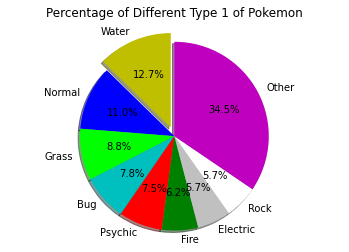

In [ ]:
# Type 1 :

labels = 'Water', 'Normal', 'Grass', 'Bug', 'Psychic', 'Fire', 'Electric', 'Rock', 'Other'
sizes = [131, 114, 91, 81, 77, 64, 59, 59, 356]
colors = ['Y', 'B', '#00ff00', 'C', 'R', 'G', 'silver', 'white', 'M']
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0)  # only "explode" the 1st slice 
plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.title("Percentage of Different Type 1 of Pokemon")

plt.plot()

[]

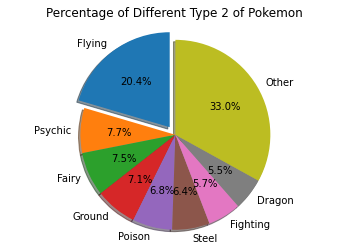

In [ ]:
# Type 2 :

labels = 'Flying', 'Psychic', 'Fairy', 'Ground', 'Poison', 'Steel', 'Fighting', 'Dragon', 'Other'
sizes = [112, 42, 41, 39, 37, 35, 31, 30, 181]
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0)  # only "explode" the 1st slice 
plt.pie(sizes, explode = explode, labels = labels,
        autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.title("Percentage of Different Type 2 of Pokemon")

plt.plot()

### Generation

In [ ]:
df_pokemon["Generation"].value_counts().to_frame()

Generation
5.0         163
1.0         151
3.0         138
6.0         133
7.0         116
4.0         116
8.0         115
2.0         100

### Experience Type

In [ ]:
df_pokemon["Experience type"].value_counts(dropna=False).to_frame()

Experience type
Medium Fast              426
Slow                     254
Medium Slow              245
Fast                      67
Erratic                   26
Fluctuating               14

### Experience to Level 100

In [ ]:
df_pokemon["Experience to level 100"].value_counts().to_frame()

Experience to level 100
1000000                      426
1250000                      254
1059860                      245
800000                        67
600000                        26
1640000                       14

### Final Evolution

In [ ]:
df_pokemon["Final Evolution"].value_counts().to_frame()

Final Evolution
1.0              583
0.0              449

### Catch Rate

In [ ]:
df_pokemon["Catch Rate"].value_counts().to_frame()

Catch Rate
45          337
3            96
255          92
190          84
75           75
60           68
120          67
90           48
30           26
200          20
225          15
25           13
180          13
50            9
127           8
150           8
235           8
100           7
140           6
70            5
10            4
65            3
125           3
55            3
170           2
130           2
220           2
80            2
205           1
155           1
145           1
35            1
15            1
160           1

### Legendary

In [ ]:
df_pokemon["Legendary"].value_counts().to_frame()

Legendary
0.0        907
1.0        125

### Mega Evolution

In [ ]:
df_pokemon["Mega Evolution"].value_counts().to_frame()

Mega Evolution
0.0             982
1.0              50

### Alolan Form

In [ ]:
df_pokemon["Alolan Form"].value_counts().to_frame()

Alolan Form
0.0         1014
1.0           18

### Galarian Form

In [ ]:
df_pokemon["Galarian Form"].value_counts().to_frame()

Galarian Form
0.0           1012
1.0             20

## Dataviz

In [ ]:
# Separate categorical columns and numeric columns :

cat_cols = [cname for cname in df_pokemon.columns if df_pokemon[cname].dtype == 'object'] # Delete the columns 'Name' and 'Abilities' for charts --> useless
num_cols = [cname for cname in df_pokemon.columns if df_pokemon[cname].dtype != 'object']

print('Objects features : ', cat_cols)
print('Numerical features : ', num_cols)

Objects features :  ['Name', 'Type 1', 'Type 2', 'Abilities', 'Experience type']
Numerical features :  ['Number', 'HP', 'Att', 'Def', 'Spa', 'Spd', 'Spe', 'BST', 'Mean', 'Standard Deviation', 'Generation', 'Experience to level 100', 'Final Evolution', 'Catch Rate', 'Legendary', 'Mega Evolution', 'Alolan Form', 'Galarian Form', 'Against Normal', 'Against Fire', 'Against Water', 'Against Electric', 'Against Grass', 'Against Ice', 'Against Fighting', 'Against Poison', 'Against Ground', 'Against Flying', 'Against Psychic', 'Against Bug', 'Against Rock', 'Against Ghost', 'Against Dragon', 'Against Dark', 'Against Steel', 'Against Fairy', 'Height', 'Weight', 'BMI']


In [ ]:
# Categorical columns + Delete the columns 'Name' and 'Abilities' for better objects charts :

cat_cols = df_pokemon.select_dtypes(exclude = [np.number]) # Select object columns
cat_cols = cat_cols[['Type 1', 'Type 2', 'Experience type']] # Select columns 'Type 1', 'Type 2' and 'Experience type' (= Delete 'Name' and 'Abilities')
cat_cols.head(5) # Display the 5 first columns of this Dataframe

Type 1  Type 2 Experience type
0  Grass  Poison     Medium Slow
1  Grass  Poison     Medium Slow
2  Grass  Poison     Medium Slow
3  Grass  Poison     Medium Slow
4   Fire     NaN     Medium Slow

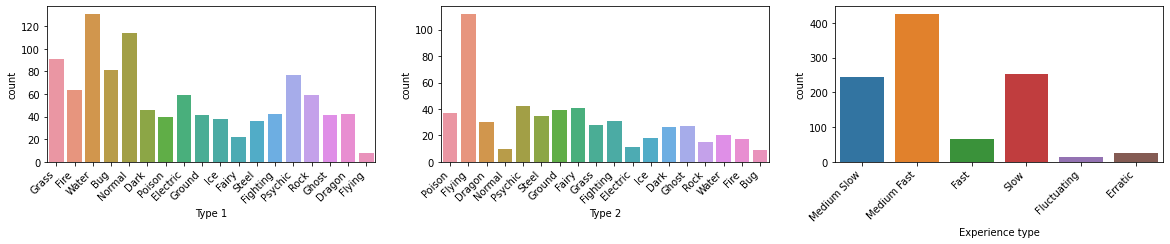

In [ ]:
# Dataviz for categorical columns without 'Name' and 'Abilities' :

plt.figure(figsize = (20, 20))

for i, cat in enumerate(cat_cols):
    plt.subplot(6, 3, i+1)
    sns.countplot(data = df_pokemon, x = cat)
    plt.xticks(rotation = 45, horizontalalignment = 'right')

plt.show()

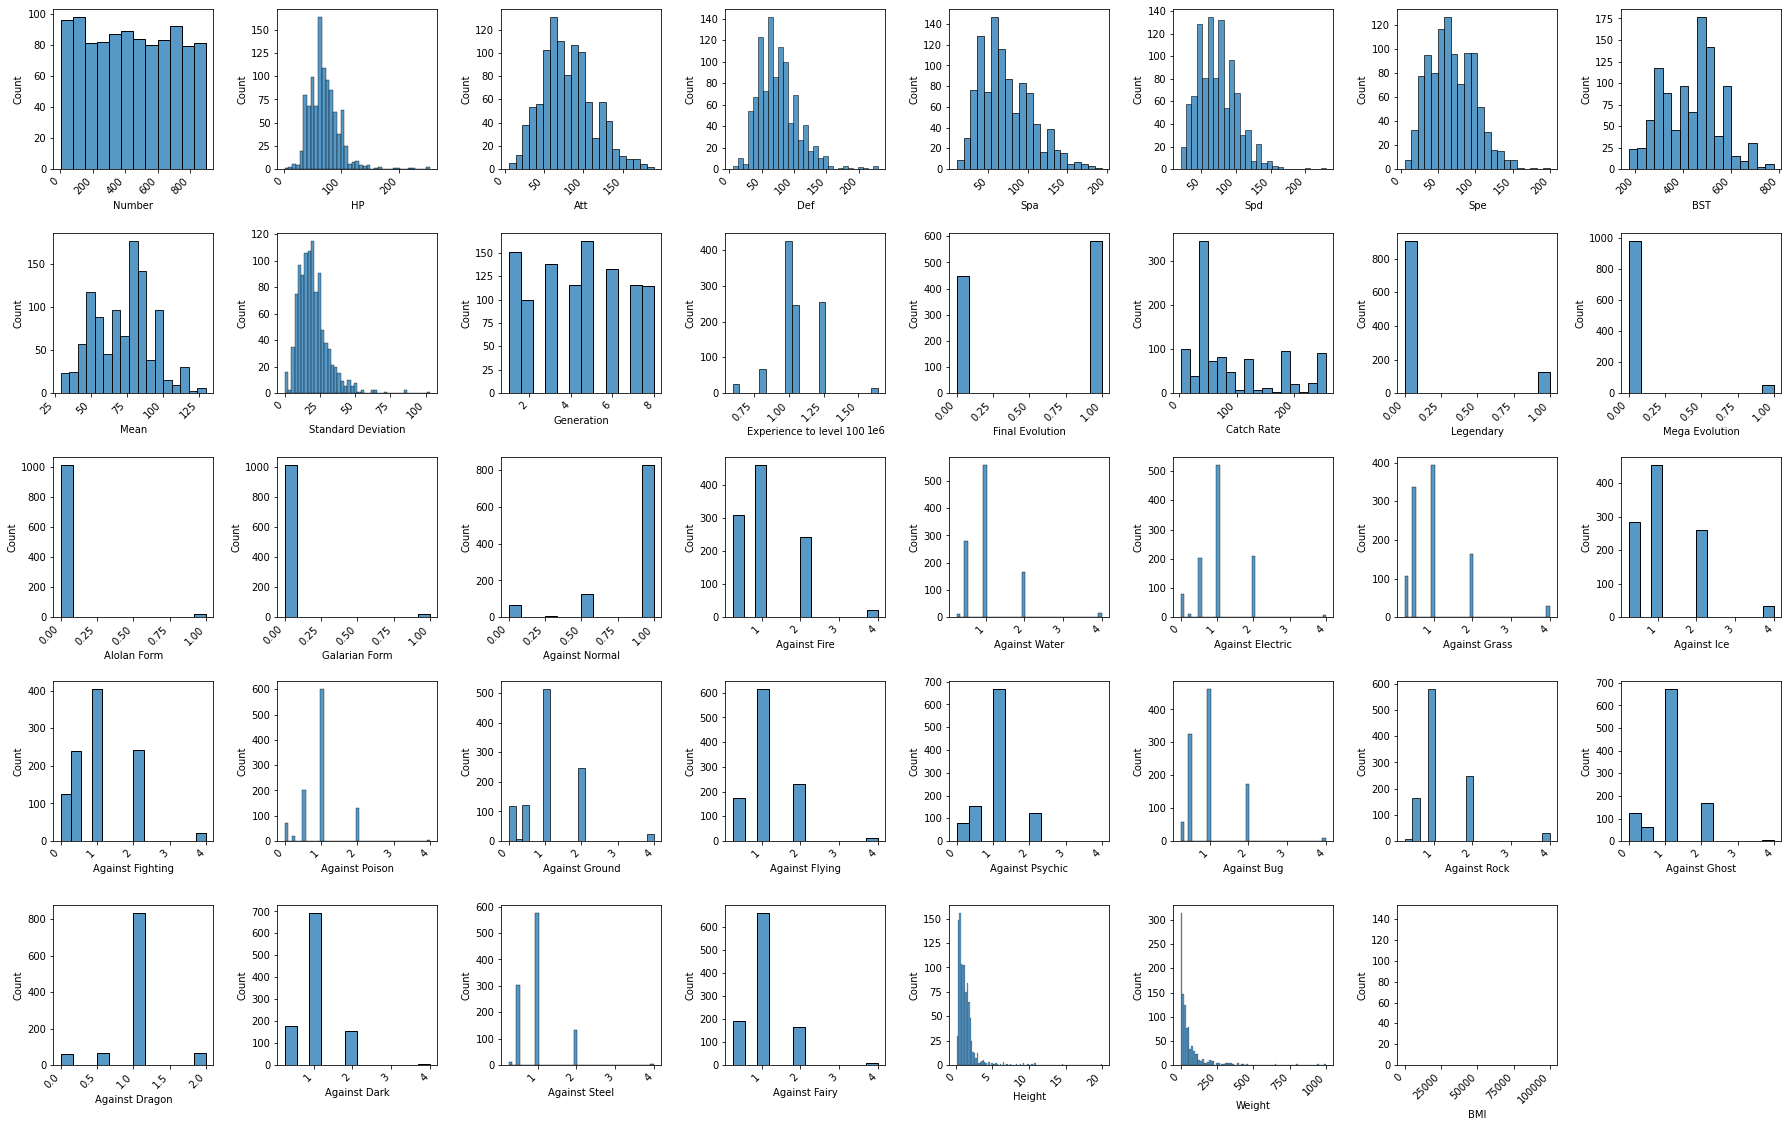

In [ ]:
# Dataviz for numeric columns :

plt.figure(figsize = (30, 30))

for j, con in enumerate(num_cols):
    plt.subplot(8, 8, j+1)
    sns.histplot(data = df_pokemon, x = con)
    plt.subplots_adjust(left = 0.1,
                    bottom = 0.1, 
                    right = 0.9, 
                    top = 0.9, 
                    wspace = 0.4, 
                    hspace = 0.4) # adjust spaces between each chart
    plt.xticks(rotation = 45, horizontalalignment = 'right')

plt.show()

## Stats by Types

Let's check which Type have the highest Attack, Defense, etc.

### HP

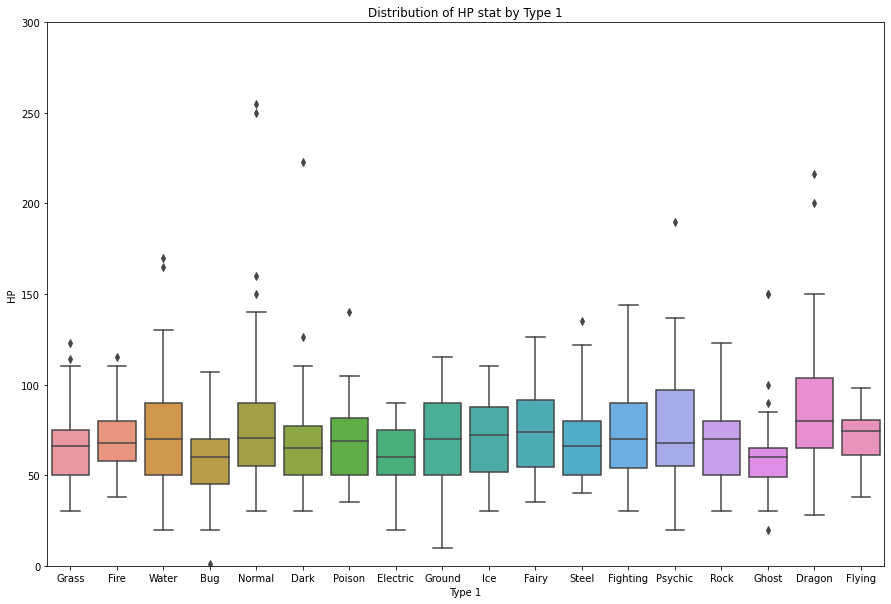

In [ ]:
plt.subplots(figsize = (15, 10))

sns.boxplot(data = df_pokemon, x = "Type 1", y = "HP")
plt.ylabel("HP")
plt.xlabel("Type 1")
plt.title('Distribution of HP stat by Type 1')
plt.ylim(0, 300)

plt.show()

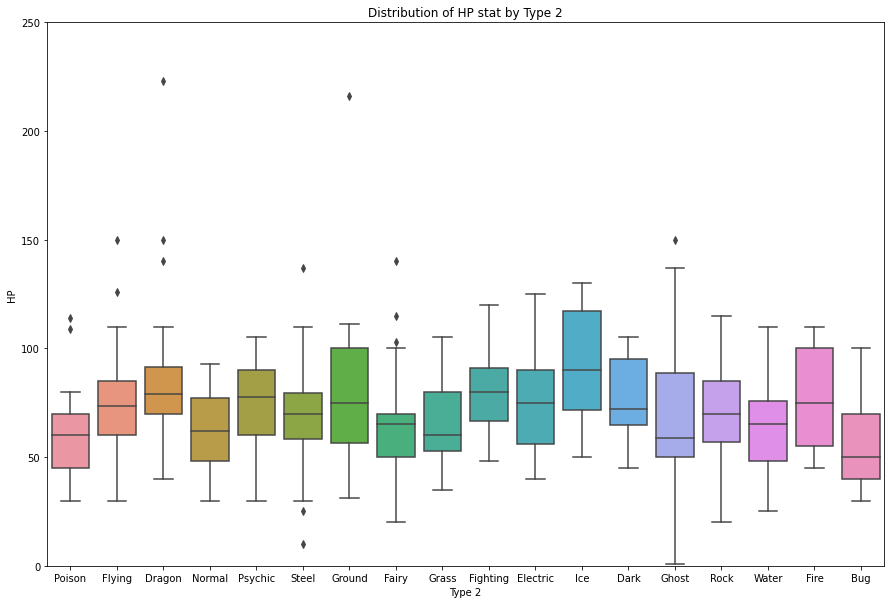

In [ ]:
plt.subplots(figsize = (15, 10))

sns.boxplot(data = df_pokemon, x = "Type 2", y = "HP")
plt.ylabel("HP")
plt.xlabel("Type 2")
plt.title('Distribution of HP stat by Type 2')
plt.ylim(0, 250)

plt.show()

### Attack

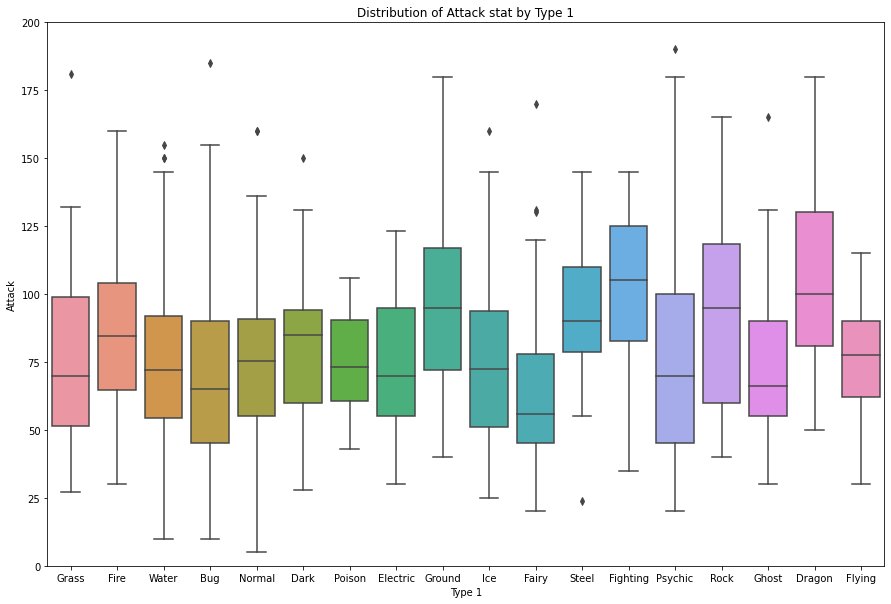

In [ ]:
plt.subplots(figsize = (15, 10))

sns.boxplot(data = df_pokemon, x = "Type 1", y = "Att")
plt.ylabel("Attack")
plt.xlabel("Type 1")
plt.title('Distribution of Attack stat by Type 1')
plt.ylim(0, 200)

plt.show()

Dragon Pokemon have a higher attack compared to the other types.

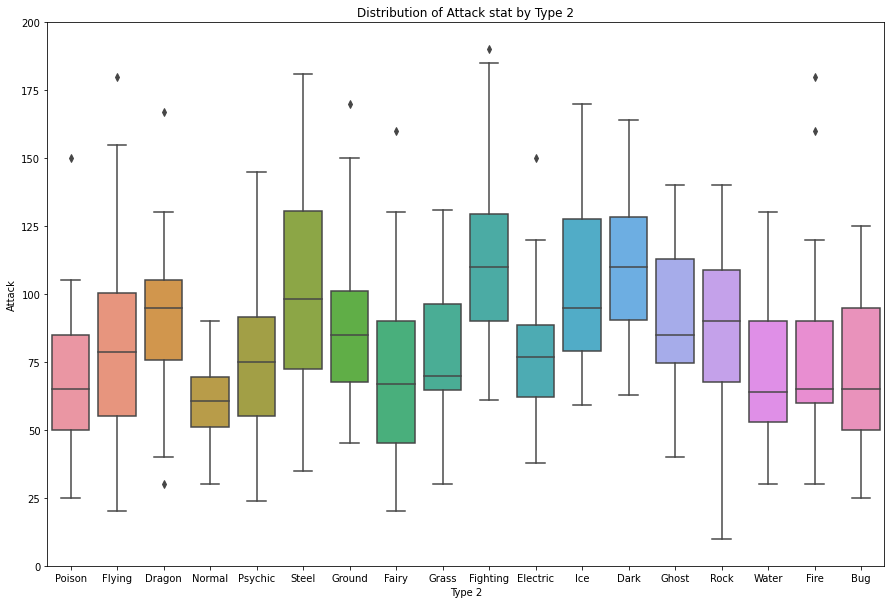

In [ ]:
plt.subplots(figsize = (15, 10))

sns.boxplot(data = df_pokemon, x = "Type 2", y = "Att")
plt.ylabel("Attack")
plt.xlabel("Type 2")
plt.title('Distribution of Attack stat by Type 2')
plt.ylim(0, 200)

plt.show()

### Defense

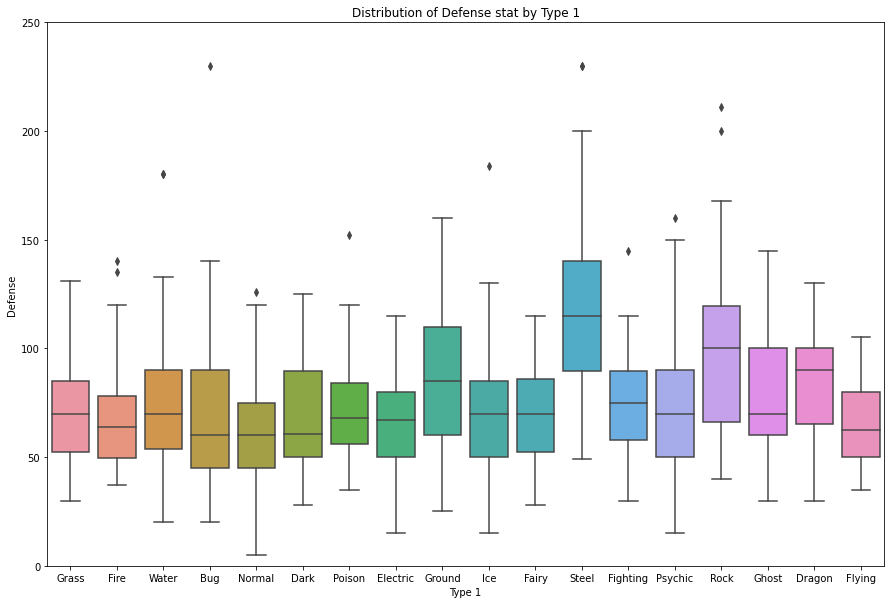

In [ ]:
plt.subplots(figsize = (15, 10))

sns.boxplot(data = df_pokemon, x = "Type 1", y = "Def")
plt.ylabel("Defense")
plt.xlabel("Type 1")
plt.title('Distribution of Defense stat by Type 1')
plt.ylim(0, 250)

plt.show()

Steel Pokemon have a higher defense compared to the other types.

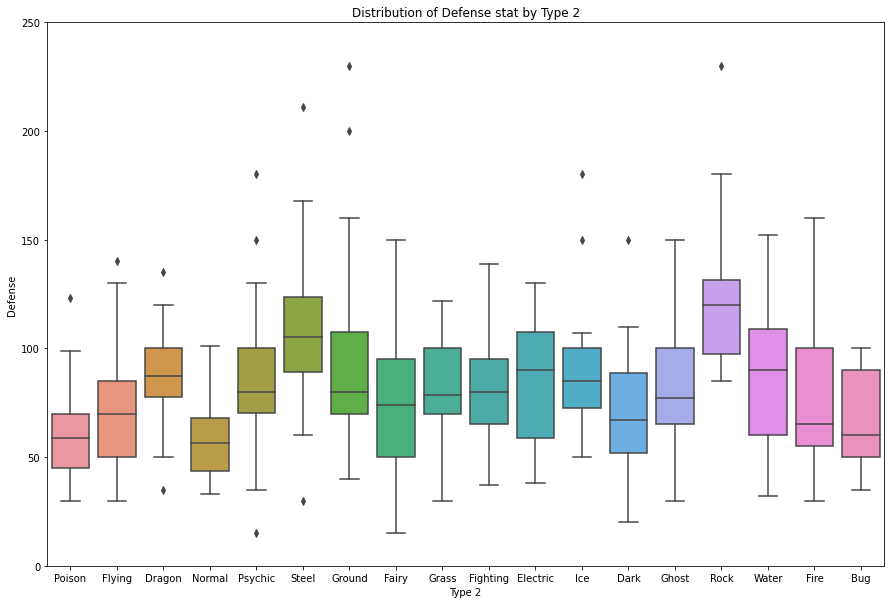

In [ ]:
plt.subplots(figsize = (15, 10))

sns.boxplot(data = df_pokemon, x = "Type 2", y = "Def")
plt.ylabel("Defense")
plt.xlabel("Type 2")
plt.title('Distribution of Defense stat by Type 2')
plt.ylim(0, 250)

plt.show()

### Special Attack

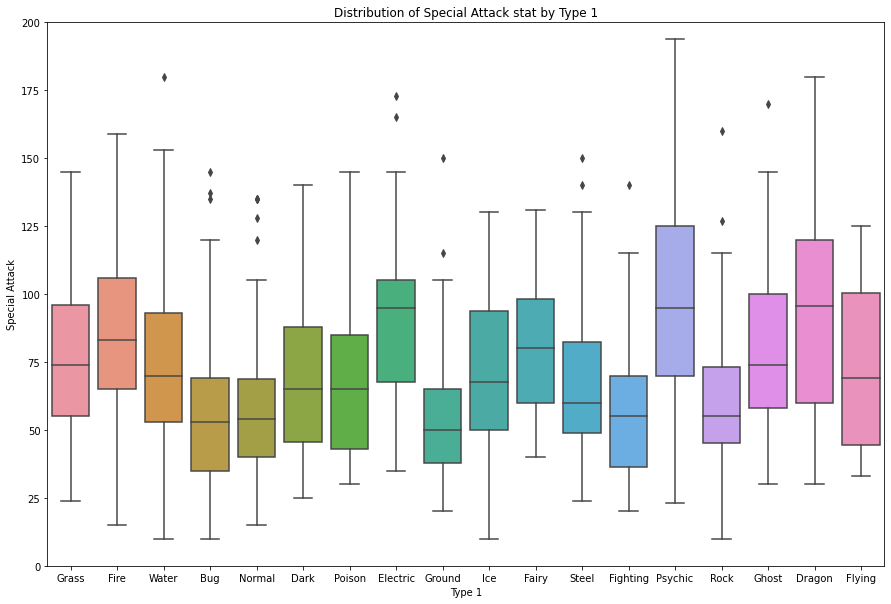

In [ ]:
plt.subplots(figsize = (15, 10))

sns.boxplot(data = df_pokemon, x = "Type 1", y = "Spa")
plt.ylabel("Special Attack")
plt.xlabel("Type 1")
plt.title('Distribution of Special Attack stat by Type 1')
plt.ylim(0, 200)

plt.show()

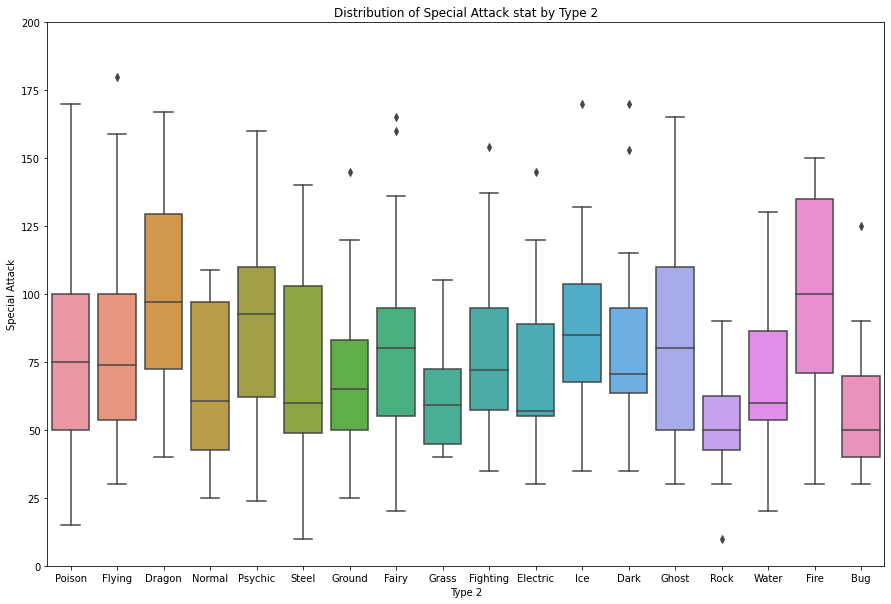

In [ ]:
plt.subplots(figsize = (15, 10))

sns.boxplot(data = df_pokemon, x = "Type 2", y = "Spa")
plt.ylabel("Special Attack")
plt.xlabel("Type 2")
plt.title('Distribution of Special Attack stat by Type 2')
plt.ylim(0, 200)

plt.show()

### Special Defense

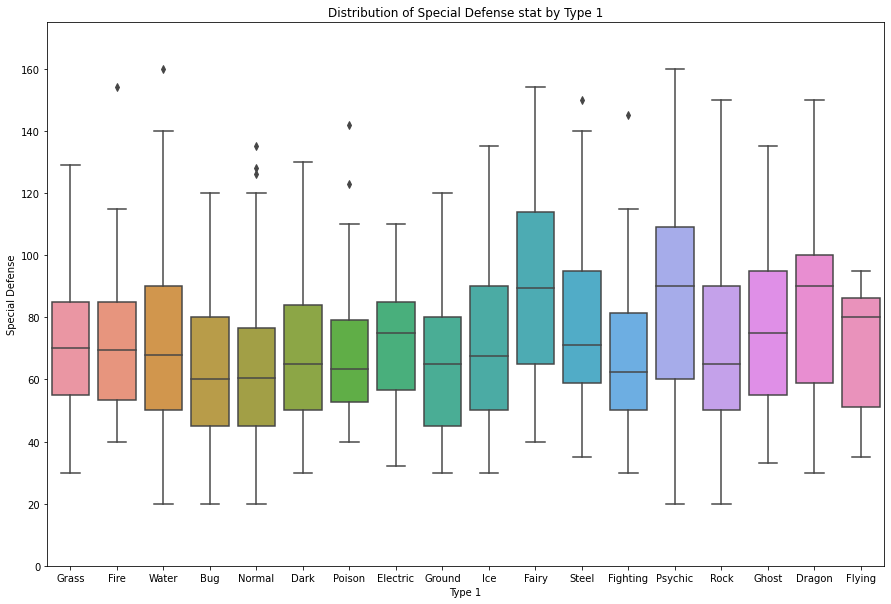

In [ ]:
plt.subplots(figsize = (15, 10))

sns.boxplot(data = df_pokemon, x = "Type 1", y = "Spd")
plt.ylabel("Special Defense")
plt.xlabel("Type 1")
plt.title('Distribution of Special Defense stat by Type 1')
plt.ylim(0, 175)

plt.show()

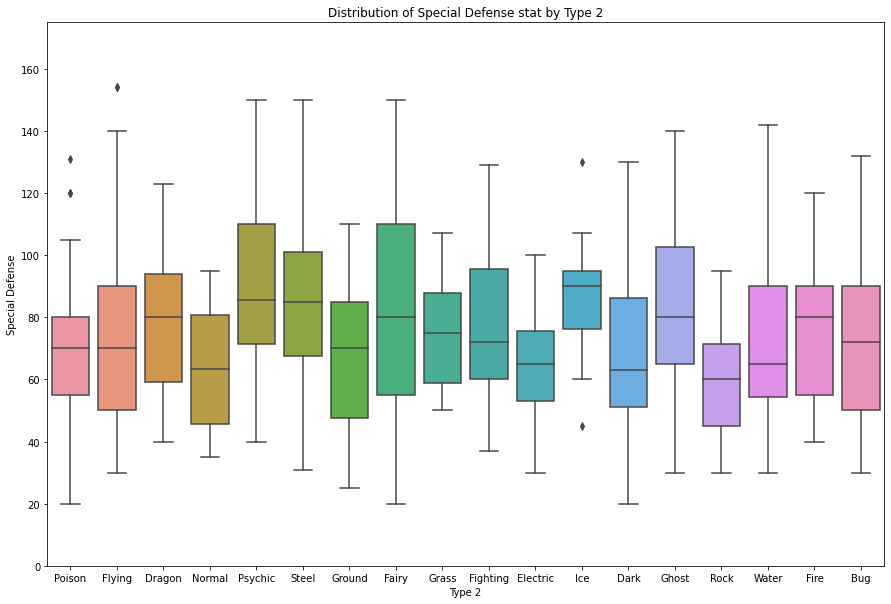

In [ ]:
plt.subplots(figsize = (15, 10))

sns.boxplot(data = df_pokemon, x = "Type 2", y = "Spd")
plt.ylabel("Special Defense")
plt.xlabel("Type 2")
plt.title('Distribution of Special Defense stat by Type 2')
plt.ylim(0, 175)

plt.show()

### Speed

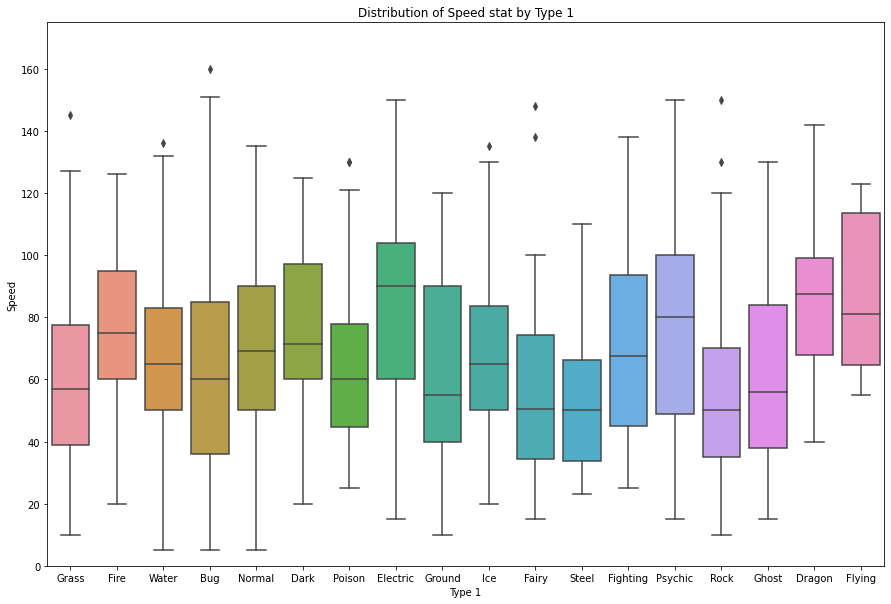

In [ ]:
plt.subplots(figsize = (15, 10))

sns.boxplot(data = df_pokemon, x = "Type 1", y = "Spe")
plt.ylabel("Speed")
plt.xlabel("Type 1")
plt.title('Distribution of Speed stat by Type 1')
plt.ylim(0, 175)

plt.show()

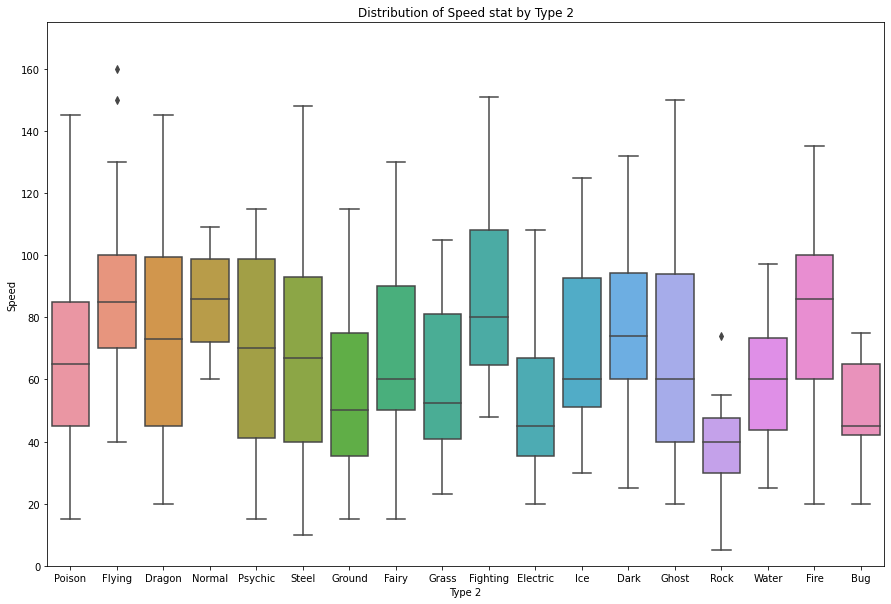

In [ ]:
plt.subplots(figsize = (15, 10))

sns.boxplot(data = df_pokemon, x = "Type 2", y = "Spe")
plt.ylabel("Speed")
plt.xlabel("Type 2")
plt.title('Distribution of Speed stat by Type 2')
plt.ylim(0, 175)

plt.show()

### BST

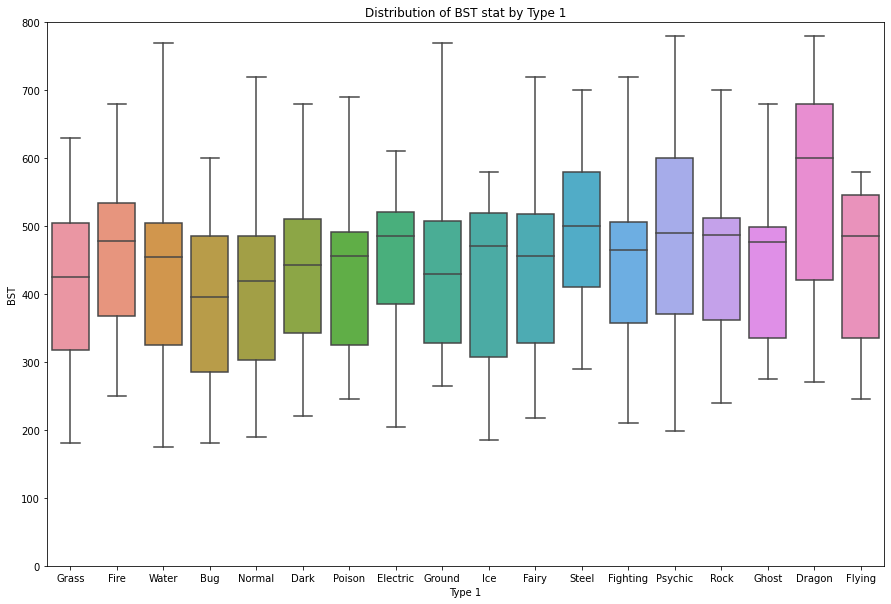

In [ ]:
plt.subplots(figsize = (15, 10))

sns.boxplot(data = df_pokemon, x = "Type 1", y = "BST")
plt.ylabel("BST")
plt.xlabel("Type 1")
plt.title('Distribution of BST stat by Type 1')
plt.ylim(0, 800)

plt.show()

Dragon Pokemon have the highest BST.

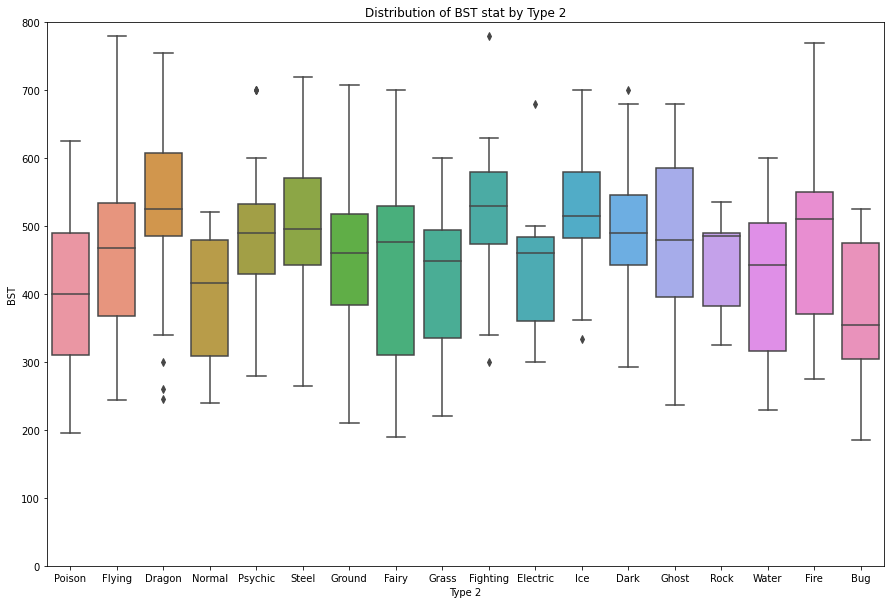

In [ ]:
plt.subplots(figsize = (15, 10))

sns.boxplot(data = df_pokemon, x = "Type 2", y = "BST")
plt.ylabel("BST")
plt.xlabel("Type 2")
plt.title('Distribution of BST stat by Type 2')
plt.ylim(0, 800)

plt.show()

## Display Legendary / Alolan / Galarian / Mega Pokemon

In [ ]:
df_pokemon[df_pokemon['Legendary'] == 1.0]

Number                         Name    Type 1    Type 2  \
182      144                     Articuno       Ice    Flying   
183      144            Galarian Articuno   Psychic    Flying   
184      145                       Zapdos  Electric    Flying   
185      145              Galarian Zapdos  Fighting    Flying   
186      146                      Moltres      Fire    Flying   
187      146             Galarian Moltres      Dark    Flying   
191      150                       Mewtwo   Psychic       NaN   
192      150                Mega Mewtwo Y   Psychic       NaN   
193      150                Mega Mewtwo X   Psychic  Fighting   
194      151                          Mew   Psychic       NaN   
293      243                       Raikou  Electric       NaN   
294      244                        Entei      Fire       NaN   
295      245                      Suicune     Water       NaN   
300      249                        Lugia   Psychic    Flying   
301      250                        Ho-Oh      Fire    Flying   
302      251                       Celebi   Psychic     Grass   
447      377                     Regirock      Rock       NaN   
448      378                       Regice       Ice       NaN   
449      379                    Registeel     Steel       NaN   
450      380                       Latias    Dragon   Psychic   
451      380                  Mega Latias    Dragon   Psychic   
452      381                       Latios    Dragon   Psychic   
453      381                  Mega Latios    Dragon   Psychic   
454      382                       Kyogre     Water       NaN   
455      382                Primal Kyogre     Water       NaN   
456      383                      Groudon    Ground       NaN   
457      383               Primal Groudon    Ground      Fire   
458      384                     Rayquaza    Dragon    Flying   
459      384                Mega Rayquaza    Dragon    Flying   
460      385                      Jirachi     Steel   Psychic   
461      386           Deoxys Normal Form   Psychic       NaN   
462      386          Deoxys Defense Form   Psychic       NaN   
463      386           Deoxys Attack Form   Psychic       NaN   
464      386            Deoxys Speed Form   Psychic       NaN   
570      480                         Uxie   Psychic       NaN   
571      481                      Mesprit   Psychic       NaN   
572      482                        Azelf   Psychic       NaN   
573      483                       Dialga     Steel    Dragon   
574      484                       Palkia     Water    Dragon   
575      485                      Heatran      Fire     Steel   
576      486                    Regigigas    Normal       NaN   
577      487                     Giratina     Ghost    Dragon   
578      487              Giratina-Origin    Dragon     Ghost   
579      488                    Cresselia   Psychic       NaN   
580      489                       Phione     Water       NaN   
581      490                      Manaphy     Water       NaN   
582      491                      Darkrai      Dark       NaN   
583      492                      Shaymin     Grass       NaN   
584      492                  Shaymin-Sky     Grass    Flying   
585      493                       Arceus    Normal       NaN   
586      494                      Victini   Psychic      Fire   
737      638                     Cobalion     Steel  Fighting   
738      639                    Terrakion      Rock  Fighting   
739      640                     Virizion     Grass  Fighting   
740      641                     Tornadus    Flying       NaN   
741      641             Tornadus-Therian    Flying       NaN   
742      642                    Thundurus  Electric    Flying   
743      642            Thundurus-Therian  Electric    Flying   
744      643                     Reshiram    Dragon      Fire   
745      644                       Zekrom    Dragon  Electric   
746      645                     Landorus

In [ ]:
df_pokemon[df_pokemon['Alolan Form'] == 1.0]

Number              Name    Type 1    Type 2  \
25       19    Alolan Rattata      Dark    Normal   
27       20   Alolan Raticate      Dark    Normal   
34       26     Alolan Raichu  Electric   Psychic   
36       27  Alolan Sandshrew       Ice     Steel   
38       28  Alolan Sandslash       Ice     Steel   
48       37     Alolan Vulpix       Ice       NaN   
50       38  Alolan Ninetales       Ice     Fairy   
63       50    Alolan Diglett    Ground     Steel   
65       51    Alolan Dugtrio    Ground     Steel   
67       52     Alolan Meowth      Dark       NaN   
70       53    Alolan Persian      Dark       NaN   
93       74    Alolan Geodude      Rock  Electric   
95       75   Alolan Graveler      Rock  Electric   
97       76      Alolan Golem      Rock  Electric   
116      88     Alolan Grimer    Poison      Dark   
118      89        Alolan Muk    Poison      Dark   
134     103  Alolan Exeggutor     Grass    Dragon   
137     105    Alolan Marowak      Fire     Ghost   

                                            Abilities   HP  Att  Def  Spa  \
25                ['Gluttony', 'Hustle', 'Thick Fat']   30   56   35   25   
27                ['Gluttony', 'Hustle', 'Thick Fat']   75   71   70   40   
34                                   ['Surge Surfer']   60   85   50   95   
36                       ['Slush Rush', 'Snow Cloak']   50   75   90   10   
38                       ['Slush Rush', 'Snow Cloak']   75  100  120   25   
48                     ['Snow Cloak', 'Snow Warning']   38   41   40   50   
50                     ['Snow Cloak', 'Snow Warning']   73   67   75   81   
63       ['Sand Force', 'Sand Veil', 'Tangling Hair']   10   55   30   35   
65       ['Sand Force', 'Sand Veil', 'Tangling Hair']   35  100   60   50   
67                ['Pickup', 'Rattled', 'Technician']   40   35   35   50   
70              ['Fur Coat', 'Rattled', 'Technician']   65   60   60   75   
93             ['Galvanize', 'Magnet Pull', 'Sturdy']   40   80  100   30   
95             ['Galvanize', 'Magnet Pull', 'Sturdy']   55   95  115   45   
97             ['Galvanize', 'Magnet Pull', 'Sturdy']   80  120  130   55   
116  ['Gluttony', 'Poison Touch', 'Power of Alchemy']   80   80   50   40   
118  ['Gluttony', 'Poison Touch', 'Power of Alchemy']  105  105   75   65   
134                              ['Frisk', 'Harvest']   95  105   85  125   
137                      ['Cursed Body', 'Rock Head']   60   80  110   50   

     Spd  Spe  BST       Mean  Standard Deviation  Generation Experience type  \
25    35   72  253  42.166667           16.466296         7.0     Medium Fast   
27    80   77  413  68.833333           13.334375         7.0     Medium Fast   
34    85  110  485  80.833333           20.292993         7.0     Medium Fast   
36    35   40  300  50.000000           26.299556         7.0     Medium Fast   
38    65   65  450  75.000000           29.860788         7.0     Medium Fast   
48    65   65  299  49.833333           11.363929         7.0     Medium Fast   
50   100  109  505  84.166667           15.170329         7.0     Medium Fast   
63    45   90  265  44.166667           24.734703         7.0     Medium Fast   
65    70  110  425  70.833333           26.523051         7.0     Medium Fast   
67    40   90  290  48.333333           19.293062         7.0     Medium Fast   
70    65  115  440  73.333333           19.293062         7.0     Medium Fast   
93    30   20  300  50.000000           29.439203         7.0     Medium Slow   
95    45   35  390  65.000000           29.439203         7.0     Medium Slow   
97    65   45  495  82.500000           31.983068         7.0     Medium Slow   
116   50   25  325  54.166667           20.086618         7.0     Medium Fast   
118  100   50  500  83.333333           21.343747         7.0     Medium Fast   
134   75   45  530  88.333333           24.944383         7.0            Slow   
137   80   45  425  70.833333           22.063670         7.0     Medium Fa

In [ ]:
df_pokemon[df_pokemon['Galarian Form'] == 1.0]

Number                          Name    Type 1   Type 2  \
68       52               Galarian Meowth     Steel      NaN   
99       77               Galarian Ponyta   Psychic      NaN   
101      78             Galarian Rapidash   Psychic    Fairy   
103      79             Galarian Slowpoke   Psychic      NaN   
106      80              Galarian Slowbro    Poison  Psychic   
110      83           Galarian Farfetch'd  Fighting      NaN   
143     110              Galarian Weezing    Poison    Fairy   
157     122             Galarian Mr. Mime       Ice  Psychic   
183     144             Galarian Articuno   Psychic   Flying   
185     145               Galarian Zapdos  Fighting   Flying   
187     146              Galarian Moltres      Dark   Flying   
244     199             Galarian Slowking    Poison  Psychic   
271     222              Galarian Corsola     Ghost      NaN   
318     263            Galarian Zigzagoon      Dark   Normal   
320     264              Galarian Linoone      Dark   Normal   
648     554             Galarian Darumaka       Ice      NaN   
651     555           Galarian Darmanitan       Ice      NaN   
652     555  Galarian Darmanitan Zen-Mode       Ice     Fire   
660     562               Galarian Yamask    Ground    Ghost   
717     618             Galarian Stunfisk    Ground    Steel   

                                            Abilities   HP  Att  Def  Spa  \
68               ['Pickup', 'Tough Claws', 'Unnerve']   50   65   55   40   
99        ['Anticipation', 'Pastel Veil', 'Run Away']   50   85   55   65   
101       ['Anticipation', 'Pastel Veil', 'Run Away']   65  100   70   80   
103          ['Gluttony', 'Own Tempo', 'Regenerator']   90   65   65   40   
106        ['Own Tempo', 'Quick Draw', 'Regenerator']   95  100   95  100   
110                          ['Scrappy', 'Steadfast']   52   95   55   58   
143   ['Levitate', 'Misty Surge', 'Neutralizing Gas']   65   90  120   85   
157    ['Ice Body', 'Screen Cleaner', 'Vital Spirit']   50   65   65   90   
183                                   ['Competitive']   90   85   85  125   
185                                       ['Defiant']   90  125   90   85   
187                                       ['Berserk']   90   85   90  100   
244  ['Curious Medicine', 'Own Tempo', 'Regenerator']   95   65   80  110   
271                     ['Cursed Body', 'Weak Armor']   60   55  100   65   
318              ['Gluttony', 'Pickup', 'Quick Feet']   38   30   41   30   
320              ['Gluttony', 'Pickup', 'Quick Feet']   78   70   61   50   
648                         ['Hustle', 'Inner Focus']   70   90   45   15   
651                   ['Gorilla Tactics', 'Zen Mode']  105  140   55   30   
652                   ['Gorilla Tactics', 'Zen Mode']  105  160   55   30   
660                              ['Wandering Spirit']   38   55   85   30   
717                                       ['Mimicry']  109   81   99   66   

     Spd  Spe  BST       Mean  Standard Deviation  Generation Experience type  \
68    40   40  290  48.333333            9.428090         8.0     Medium Fast   
99    65   90  410  68.333333           14.624941         8.0     Medium Fast   
101   80  105  500  83.333333           14.624941         8.0     Medium Fast   
103   40   15  315  52.500000           23.935678         8.0     Medium Fast   
106   70   30  490  81.666667           25.276251         8.0     Medium Fast   
110   62   55  377  62.833333           14.712995         8.0     Medium Fast   
143   70   60  490  81.666667           20.138410         8.0     Medium Fast   
157   90  100  460  76.666667           17.716910         8.0     Medium Fast   
183  100   95  580  96.666667           13.743685         8.0            Slow   
185   90  100  580  96.666667           13.437096         8.0            Slow   
187  125   90  580  96.666667           13.437096         8.0            Slow   
244  110   30  490  81.666667           28.087166         8.0     Medi

In [ ]:
# df_pokemon[df_pokemon['Name'] == 'Mega']

In [ ]:
df_pokemon[df_pokemon['Name'].str.contains("Mega ", case = False, na = False)] # with space to not display Meganium ;-)

Number              Name    Type 1    Type 2          Abilities   HP  \
3         3     Mega Venusaur     Grass    Poison      ['Thick Fat']   80   
7         6  Mega Charizard Y      Fire    Flying        ['Drought']   78   
8         6  Mega Charizard X      Fire    Dragon    ['Tough Claws']   78   
12        9    Mega Blastoise     Water       NaN  ['Mega Launcher']   79   
19       15     Mega Beedrill       Bug    Poison   ['Adaptability']   65   
23       18      Mega Pidgeot    Normal    Flying       ['No Guard']   83   
83       65     Mega Alakazam   Psychic       NaN          ['Trace']   55   
105      80      Mega Slowbro     Water   Psychic    ['Shell Armor']   95   
124      94       Mega Gengar     Ghost    Poison     ['Shadow Tag']   60   
149     115   Mega Kangaskhan    Normal       NaN  ['Parental Bond']  105   
163     127       Mega Pinsir       Bug    Flying       ['Aerilate']   65   
167     130     Mega Gyarados     Water      Dark   ['Mold Breaker']   95   
180     142   Mega Aerodactyl      Rock    Flying    ['Tough Claws']   80   
192     150     Mega Mewtwo Y   Psychic       NaN       ['Insomnia']  106   
193     150     Mega Mewtwo X   Psychic  Fighting      ['Steadfast']  106   
225     181     Mega Ampharos  Electric    Dragon   ['Mold Breaker']   90   
254     208      Mega Steelix     Steel    Ground     ['Sand Force']   75   
259     212       Mega Scizor       Bug     Steel     ['Technician']   70   
262     214    Mega Heracross       Bug  Fighting     ['Skill Link']   80   
279     229     Mega Houndoom      Dark      Fire    ['Solar Power']   75   
299     248    Mega Tyranitar      Rock      Dark    ['Sand Stream']  100   
306     254     Mega Sceptile     Grass    Dragon                 []   70   
310     257     Mega Blaziken      Fire  Fighting    ['Speed Boost']   80   
314     260     Mega Swampert     Water    Ground     ['Swift Swim']  100   
339     282    Mega Gardevoir   Psychic     Fairy       ['Pixilate']   68   
360     302      Mega Sableye      Dark     Ghost   ['Magic Bounce']   50   
362     303       Mega Mawile     Steel     Fairy     ['Huge Power']   50   
366     306       Mega Aggron     Steel       NaN         ['Filter']   70   
369     308     Mega Medicham  Fighting   Psychic     ['Pure Power']   60   
372     310    Mega Manectric  Electric       NaN     ['Intimidate']   70   
382     319     Mega Sharpedo     Water      Dark     ['Strong Jaw']   70   
387     323     Mega Camerupt      Fire    Ground    ['Sheer Force']   70   
399     334      Mega Altaria    Dragon     Fairy       ['Pixilate']   75   
420     354      Mega Banette     Ghost       NaN      ['Prankster']   64   
426     359        Mega Absol      Dark       NaN   ['Magic Bounce']   65   
430     362       Mega Glalie       Ice       NaN    ['Refrigerate']   80   
442     373    Mega Salamence    Dragon    Flying       ['Aerilate']   95   
446     376    Mega Metagross     Steel   Psychic    ['Tough Claws']   80   
451     380       Mega Latias    Dragon   Psychic       ['Levitate']   80   
453     381       Mega Latios    Dragon   Psychic       ['Levitate']   80   
459     384     Mega Rayquaza    Dragon    Flying   ['Delta Stream']  105   
509     428      Mega Lopunny    Normal  Fighting        ['Scrappy']   65   
527     445     Mega Garchomp    Dragon    Ground     ['Sand Force']  108   
531     448      Mega Lucario  Fighting     Steel   ['Adaptability']   70   
544     460    Mega Abomasnow     Grass       Ice   ['Snow Warning']   90   
560     475      Mega Gallade   Psychic  Fighting    ['Inner Focus']   68   
624     531       Mega Audino    Normal     Fairy         ['Healer']  103   
834     719      Mega Diancie      Rock     Fairy   ['Magic Bounce']   50   

     Att  Def  Spa  Spd  Spe  BST        Mean  Standard Deviation  Generation  \
3    100  123  122  120   80  625  104.166667           18.747592         6.0   
7    104   78  159  115  100  634  105.666667           27.378012    

## Heatmap

In [ ]:
correlation = round(df_pokemon.corr(), 2)
correlation

Number    HP   Att   Def   Spa   Spd   Spe   BST  \
Number                     1.00  0.11  0.12  0.09  0.09  0.08  0.02  0.13   
HP                         0.11  1.00  0.45  0.27  0.37  0.36  0.18  0.64   
Att                        0.12  0.45  1.00  0.46  0.37  0.27  0.38  0.74   
Def                        0.09  0.27  0.46  1.00  0.22  0.53 -0.01  0.62   
Spa                        0.09  0.37  0.37  0.22  1.00  0.51  0.44  0.74   
Spd                        0.08  0.36  0.27  0.53  0.51  1.00  0.22  0.71   
Spe                        0.02  0.18  0.38 -0.01  0.44  0.22  1.00  0.56   
BST                        0.13  0.64  0.74  0.62  0.74  0.71  0.56  1.00   
Mean                       0.13  0.64  0.74  0.62  0.74  0.71  0.56  1.00   
Standard Deviation         0.03  0.32  0.34  0.45  0.20  0.35  0.05  0.42   
Generation                 0.81  0.09  0.19  0.13  0.12  0.10  0.07  0.17   
Experience to level 100    0.10  0.24  0.29  0.15  0.24  0.12  0.21  0.31   
Final Evolution            0.06  0.52  0.55  0.48  0.54  0.58  0.44  0.78   
Catch Rate                -0.09 -0.46 -0.51 -0.43 -0.51 -0.50 -0.41 -0.70   
Legendary                  0.23  0.34  0.36  0.27  0.43  0.35  0.35  0.53   
Mega Evolution            -0.15  0.08  0.33  0.24  0.29  0.23  0.19  0.35   
Alolan Form               -0.19 -0.05 -0.01 -0.00 -0.08 -0.05 -0.01 -0.05   
Galarian Form             -0.10  0.02  0.02 -0.01 -0.04  0.00 -0.01 -0.00   
Against Normal            -0.15  0.05 -0.10 -0.29 -0.02 -0.10  0.10 -0.09   
Against Fire               0.03 -0.10 -0.02  0.06 -0.12 -0.01 -0.11 -0.07   
Against Water             -0.06 -0.01  0.10  0.14 -0.07 -0.05 -0.07  0.01   
Against Electric          -0.07 -0.04 -0.10 -0.10  0.01  0.01  0.09 -0.04   
Against Grass             -0.08  0.03  0.02  0.11 -0.11 -0.07 -0.14 -0.04   
Against Ice                0.02  0.07  0.06 -0.01  0.01 -0.02  0.08  0.05   
Against Fighting          -0.02  0.09  0.13  0.13 -0.18 -0.08 -0.06  0.01   
Against Poison             0.04 -0.02 -0.18 -0.24  0.06  0.00  0.02 -0.09   
Against Ground            -0.00 -0.02  0.05  0.20  0.05  0.03 -0.09  0.06   
Against Flying             0.01 -0.05 -0.01 -0.13 -0.11 -0.06 -0.04 -0.10   
Against Psychic           -0.08 -0.03 -0.01 -0.10 -0.11 -0.09 -0.03 -0.09   
Against Bug               -0.00  0.03 -0.06 -0.06  0.07  0.02 -0.02 -0.01   
Against Rock              -0.04 -0.05 -0.12 -0.17  0.07 -0.01  0.13 -0.04   
Against Ghost              0.09 -0.04 -0.01  0.14  0.27  0.21  0.02  0.15   
Against Dragon             0.03  0.13  0.13 -0.04  0.09 -0.04  0.12  0.10   
Against Dark               0.04  0.01 -0.10  0.06  0.21  0.15  0.02  0.09   
Against Steel              0.07  0.03  0.01  0.05 -0.06  0.08 -0.08  0.00   
Against Fairy              0.15  0.14  0.21 -0.01  0.02  0.02  0.12  0.12   
Height                     0.04  0.44  0.43  0.36  0.38  0.32  0.20  0.53   
Weight                     0.12  0.44  0.43  0.47  0.24  0.30  0.05  0.48   
BMI                        0.04 -0.03 -0.05  0.06 -0.04  0.07 -0.04 -0.01   

                         Mean  Standard Deviation  Generation  \
Number                   0.13                0.03        0.81   
HP                       0.64                0.32        0.09   
Att                      0.74                0.34        0.19   
Def                      0.62                0.45        0.13   
Spa                      0.74                0.20        0.12   
Spd                      0.71                0.35        0.10   
Spe                      0.56                0.05        0.07   
BST                      1.00                0.42        0.17   
Mean                     1.00                0.42        0.17   
Standard Deviation       0.42                1.00        0.08   
Generation               0.17                0.08        1.00   
Experience to level 100  0.31                0.06        0.06   
Final Evolution          0.78                0.34        0.08   
Catch Rate              -0.70     

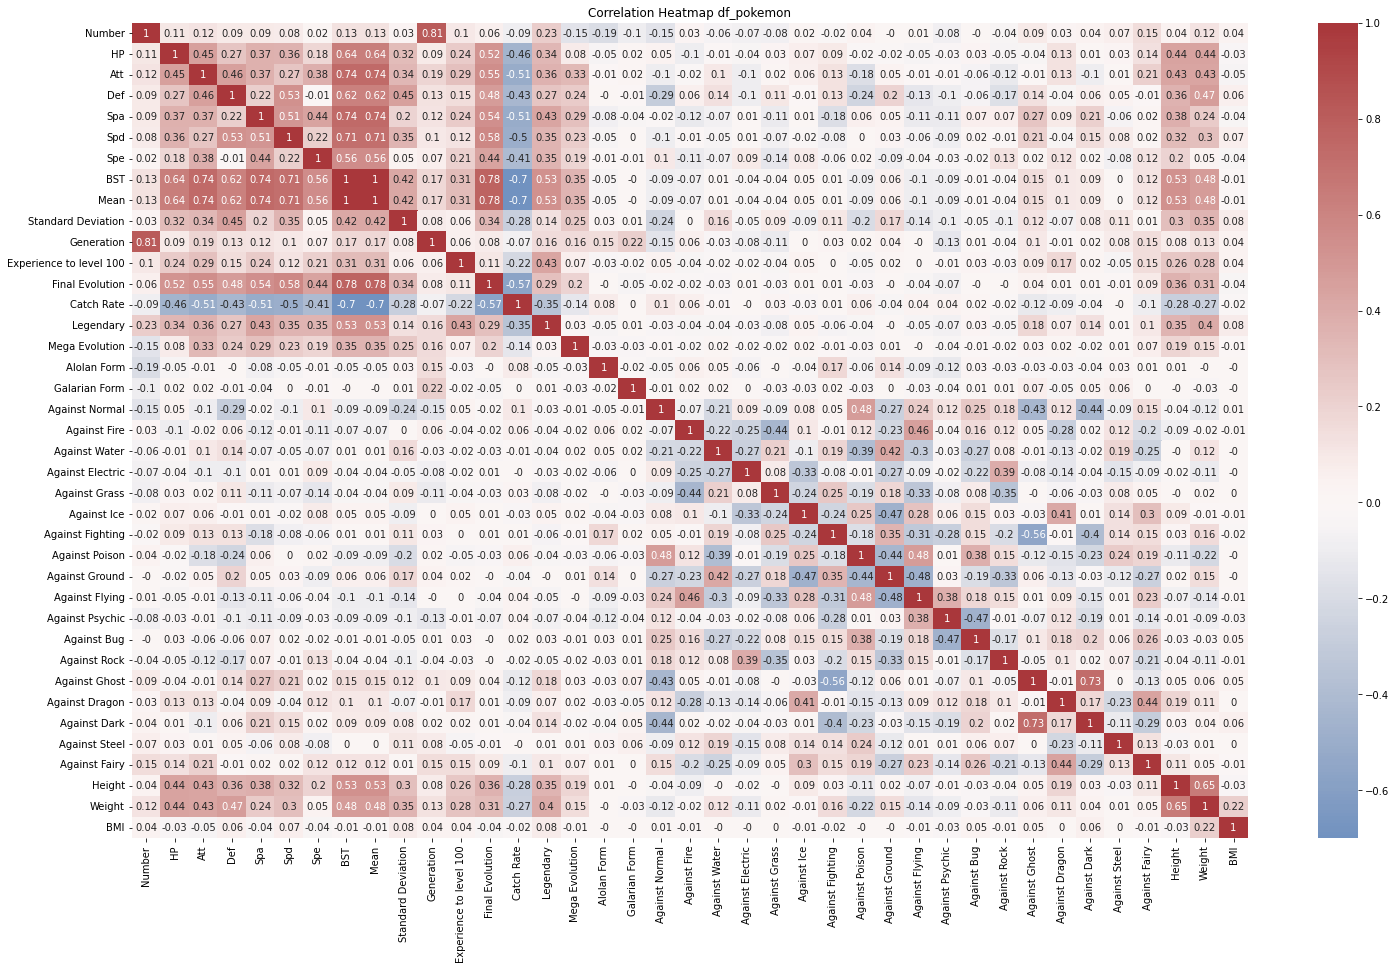

In [ ]:
plt.figure(figsize = (25, 15))

sns.heatmap(round(df_pokemon.corr(), 2), annot = True, cmap = 'vlag', center = 0)
plt.title("Correlation Heatmap df_pokemon")

plt.show()

# ANALYSIS

## Change the index to the 'Name' Attribute

In [ ]:
df_pokemon = df_pokemon.set_index('Name')
df_pokemon.head()

Number Type 1  Type 2                    Abilities  HP  Att  \
Name                                                                         
Bulbasaur           1  Grass  Poison  ['Chlorophyll', 'Overgrow']  45   49   
Ivysaur             2  Grass  Poison  ['Chlorophyll', 'Overgrow']  60   62   
Venusaur            3  Grass  Poison  ['Chlorophyll', 'Overgrow']  80   82   
Mega Venusaur       3  Grass  Poison                ['Thick Fat']  80  100   
Charmander          4   Fire     NaN     ['Blaze', 'Solar Power']  39   52   

               Def  Spa  Spd  Spe  BST        Mean  Standard Deviation  \
Name                                                                     
Bulbasaur       49   65   65   45  318   53.000000            8.640988   
Ivysaur         63   80   80   60  405   67.500000            8.902247   
Venusaur        83  100  100   80  525   87.500000            8.902247   
Mega Venusaur  123  122  120   80  625  104.166667           18.747592   
Charmander      43   60   50   65  309   51.500000            8.995369   

               Generation Experience type  Experience to level 100  \
Name                                                                 
Bulbasaur             1.0     Medium Slow                  1059860   
Ivysaur               1.0     Medium Slow                  1059860   
Venusaur              1.0     Medium Slow                  1059860   
Mega Venusaur         6.0     Medium Slow                  1059860   
Charmander            1.0     Medium Slow                  1059860   

               Final Evolution  Catch Rate  Legendary  Mega Evolution  \
Name                                                                    
Bulbasaur                  0.0          45        0.0             0.0   
Ivysaur                    0.0          45        0.0             0.0   
Venusaur                   1.0          45        0.0             0.0   
Mega Venusaur              1.0          45        0.0             1.0   
Charmander                 0.0          45        0.0             0.0   

               Alolan Form  Galarian Form  Against Normal  Against Fire  \
Name                                                                      
Bulbasaur              0.0            0.0             1.0           2.0   
Ivysaur                0.0            0.0             1.0           2.0   
Venusaur               0.0            0.0             1.0           2.0   
Mega Venusaur          0.0            0.0             1.0           2.0   
Charmander             0.0            0.0             1.0           0.5   

               Against Water  Against Electric  Against Grass  Against Ice  \
Name                                                                         
Bulbasaur                0.5               0.5           0.25          2.0   
Ivysaur                  0.5               0.5           0.25          2.0   
Venusaur                 0.5               0.5           0.25          2.0   
Mega Venusaur            0.5               0.5           0.25          2.0   
Charmander               2.0               1.0           0.50          0.5   

               Against Fighting  Against Poison  Against Ground  \
Name                                                              
Bulbasaur                   0.5             1.0             1.0   
Ivysaur                     0.5             1.0             1.0   
Venusaur                    0.5             1.0             1.0   
Mega Venusaur               0.5             1.0             1.0   
Charmander                  1.0             1.0             2.0   

               Against Flying  Against Psychic  Against Bug  Against Rock  \
Name                                                                        
Bulbasaur                 2.0              2.0          1.0           1.0   
Ivysaur                   2.0              2.0          1.0           1.0   
Venusaur                  2.0              2.0          1.0           1.0   
Mega Venusaur     

## The 10 Best Pokemon ?

We will use the BST column.

In [ ]:
df_pokemon.sort_values('BST', ascending = False).head(10)

Number    Type 1    Type 2  \
Name                                                   
Mega Mewtwo Y                150   Psychic       NaN   
Mega Mewtwo X                150   Psychic  Fighting   
Mega Rayquaza                384    Dragon    Flying   
Primal Groudon               383    Ground      Fire   
Primal Kyogre                382     Water       NaN   
Ultra Necrozma               800   Psychic    Dragon   
Arceus                       493    Normal       NaN   
Zacian Crowned Sword         888     Fairy     Steel   
Zamazenta Crowned Shield     889  Fighting     Steel   
Zygarde Complete             718    Dragon    Ground   

                                                  Abilities   HP  Att  Def  \
Name                                                                         
Mega Mewtwo Y                                  ['Insomnia']  106  150   70   
Mega Mewtwo X                                 ['Steadfast']  106  190  100   
Mega Rayquaza                              ['Delta Stream']  105  180  100   
Primal Groudon                            ['Desolate Land']  100  180  160   
Primal Kyogre                            ['Primordial Sea']  100  150   90   
Ultra Necrozma                              ['Prism Armor']   97  167   97   
Arceus                                        ['Multitype']  120  120  120   
Zacian Crowned Sword                     ['Intrepid Sword']   92  170  115   
Zamazenta Crowned Shield               ['Dauntless Shield']   92  130  145   
Zygarde Complete          ['Aura Break', 'Power Construct']  216  100  121   

                          Spa  Spd  Spe  BST        Mean  Standard Deviation  \
Name                                                                           
Mega Mewtwo Y             194  120  140  780  130.000000           38.453435   
Mega Mewtwo X             154  100  130  780  130.000000           33.045423   
Mega Rayquaza             180  100  115  780  130.000000           35.707142   
Primal Groudon            150   90   90  770  128.333333           36.247605   
Primal Kyogre             180  160   90  770  128.333333           36.247605   
Ultra Necrozma            167   97  129  754  125.666667           31.340425   
Arceus                    120  120  120  720  120.000000            0.000000   
Zacian Crowned Sword       80  115  148  720  120.000000           30.870698   
Zamazenta Crowned Shield   80  145  128  720  120.000000           25.159491   
Zygarde Complete           91   95   85  708  118.000000           45.247468   

                          Generation Experience type  Experience to level 100  \
Name                                                                            
Mega Mewtwo Y                    6.0            Slow                  1250000   
Mega Mewtwo X                    6.0            Slow                  1250000   
Mega Rayquaza                    6.0            Slow                  1250000   
Primal Groudon                   6.0            Slow                  1250000   
Primal Kyogre                    6.0            Slow                  1250000   
Ultra Necrozma                   7.0            Slow                  1250000   
Arceus                           4.0            Slow                  1250000   
Zacian Crowned Sword             8.0            Slow                  1250000   
Zamazenta Crowned Shield         8.0            Slow                  1250000   
Zygarde Complete                 6.0            Slow                  1250000   

                          Final Evolution  Catch Rate  Legendary  \
Name                                                               
Mega Mewtwo Y                         1.0           3        1.0   
Mega Mewtwo X                         1.0           3        1.0   
Mega Rayquaza                         1.0          45        1.0   
Primal Groudon                        1.0           3        1.0   
Primal Kyogre                         1.0           3        1.0   
Ultra 

The 10 best Pokemon are Legendaries. 

## Stats of Pokemon

In [ ]:
df_pokemon.columns

Index(['Number', 'Type 1', 'Type 2', 'Abilities', 'HP', 'Att', 'Def', 'Spa',
       'Spd', 'Spe', 'BST', 'Mean', 'Standard Deviation', 'Generation',
       'Experience type', 'Experience to level 100', 'Final Evolution',
       'Catch Rate', 'Legendary', 'Mega Evolution', 'Alolan Form',
       'Galarian Form', 'Against Normal', 'Against Fire', 'Against Water',
       'Against Electric', 'Against Grass', 'Against Ice', 'Against Fighting',
       'Against Poison', 'Against Ground', 'Against Flying', 'Against Psychic',
       'Against Bug', 'Against Rock', 'Against Ghost', 'Against Dragon',
       'Against Dark', 'Against Steel', 'Against Fairy', 'Height', 'Weight',
       'BMI'],
      dtype='object')

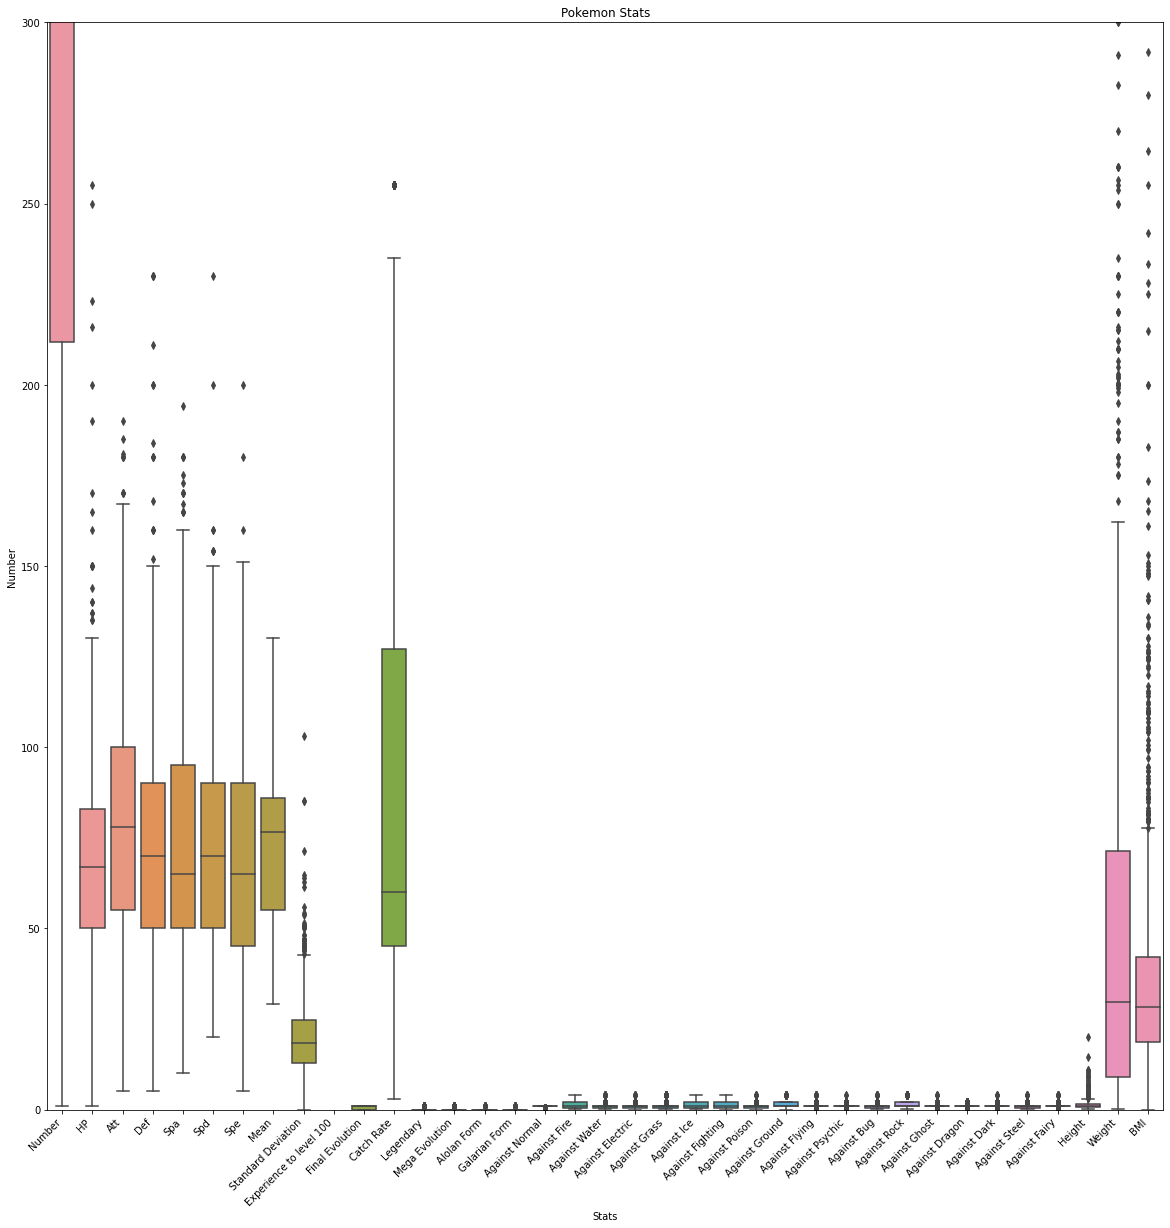

In [ ]:
df_boxplot = df_pokemon.drop(['Generation', 'BST'], axis = 1)

fig, ax = plt.subplots(figsize = (20, 20))
sns.boxplot(data = df_boxplot)
ax.set_title('Pokemon Stats', fontsize = 12)
plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.ylabel("Number")
plt.xlabel("Stats")
plt.ylim(0, 300)  # change the scale of y axix

plt.show()

## Pokemon with Max / Min Stats

In [ ]:
print("Max HP :", df_pokemon['HP'].max(), '-', df_pokemon['HP'].idxmax())
print("Max Attack :", df_pokemon['Att'].max(), '-', df_pokemon['Att'].idxmax())
print("Max Defense :", df_pokemon['Def'].max(), '-', df_pokemon['Def'].idxmax())
print("Max Special Attack :", df_pokemon['Spa'].max(), '-', df_pokemon['Spa'].idxmax())
print("Max Special Defense :", df_pokemon['Spd'].max(), '-', df_pokemon['Spd'].idxmax())
print("Max Speed :", df_pokemon['Spe'].max(), '-', df_pokemon['Spe'].idxmax())
print("Max Sum of Best Stats :", df_pokemon['BST'].max(), '-', df_pokemon['BST'].idxmax())
print("Max Mean :", df_pokemon['Mean'].max(), '-', df_pokemon['Mean'].idxmax())
print("Max Catch Rate :", df_pokemon['Catch Rate'].max(), '-', df_pokemon['Catch Rate'].idxmax())
print("Max Height :", df_pokemon['Height'].max(), '-', df_pokemon['Height'].idxmax())
print("Max Weight :", df_pokemon['Weight'].max(), '-', df_pokemon['Weight'].idxmax())
print("Max Body Max Index :", df_pokemon['BMI'].max(), '-', df_pokemon['BMI'].idxmax())

Max HP : 255 - Blissey
Max Attack : 190 - Mega Mewtwo X
Max Defense : 230 - Mega Steelix
Max Special Attack : 194 - Mega Mewtwo Y
Max Special Defense : 230 - Shuckle
Max Speed : 200 - Regieleki
Max Sum of Best Stats : 780 - Mega Mewtwo Y
Max Mean : 130.0 - Mega Mewtwo Y
Max Catch Rate : 255 - Caterpie
Max Height : 20.0 - Eternatus
Max Weight : 999.9 - Cosmoem
Max Body Max Index : 99990.0 - Cosmoem


In [ ]:
# Example :

print(df_pokemon.loc['Mega Mewtwo Y'])

Number                              150
Type 1                          Psychic
Type 2                              NaN
Abilities                  ['Insomnia']
HP                                  106
Att                                 150
Def                                  70
Spa                                 194
Spd                                 120
Spe                                 140
BST                                 780
Mean                              130.0
Standard Deviation            38.453435
Generation                          6.0
Experience type                    Slow
Experience to level 100         1250000
Final Evolution                     1.0
Catch Rate                            3
Legendary                           1.0
Mega Evolution                      1.0
Alolan Form                         0.0
Galarian Form                       0.0
Against Normal                      1.0
Against Fire                        1.0
Against Water                       1.0


In [ ]:
print("Min HP :", df_pokemon['HP'].min(), '-', df_pokemon['HP'].idxmin())
print("Min Attack :", df_pokemon['Att'].min(), '-', df_pokemon['Att'].idxmin())
print("Min Defense :", df_pokemon['Def'].min(), '-', df_pokemon['Def'].idxmin())
print("Min Special Attack :", df_pokemon['Spa'].min(), '-', df_pokemon['Spa'].idxmin())
print("Min Special Defense :", df_pokemon['Spd'].min(), '-', df_pokemon['Spd'].idxmin())
print("Min Speed :", df_pokemon['Spe'].min(), '-', df_pokemon['Spe'].idxmin())
print("Min Sum of Best Stats :", df_pokemon['BST'].min(), '-', df_pokemon['BST'].idxmin())
print("Min Mean :", df_pokemon['Mean'].min(), '-', df_pokemon['Mean'].idxmin())
print("Min Catch Rate :", df_pokemon['Catch Rate'].min(), '-', df_pokemon['Catch Rate'].idxmin())
print("Min Height :", df_pokemon['Height'].min(), '-', df_pokemon['Height'].idxmin())
print("Min Weight :", df_pokemon['Weight'].min(), '-', df_pokemon['Weight'].idxmin())
print("Min Body Max Index :", df_pokemon['BMI'].min(), '-', df_pokemon['BMI'].idxmin())

Min HP : 1 - Shedinja
Min Attack : 5 - Chansey
Min Defense : 5 - Chansey
Min Special Attack : 10 - Alolan Sandshrew
Min Special Defense : 20 - Caterpie
Min Speed : 5 - Shuckle
Min Sum of Best Stats : 175 - Wishiwashi
Min Mean : 29.166666666666668 - Wishiwashi
Min Catch Rate : 3 - Articuno
Min Height : 0.1 - Joltik
Min Weight : 0.1 - Gastly
Min Body Max Index : 0.0 - Haunter


In [ ]:
# Example :

print(df_pokemon.loc['Chansey'])

Number                                                            113
Type 1                                                         Normal
Type 2                                                            NaN
Abilities                  ['Healer', 'Natural Cure', 'Serene Grace']
HP                                                                250
Att                                                                 5
Def                                                                 5
Spa                                                                35
Spd                                                               105
Spe                                                                50
BST                                                               450
Mean                                                             75.0
Standard Deviation                                          85.195853
Generation                                                        1.0
Experience type     

## Number of Pokemon by Type and Generation

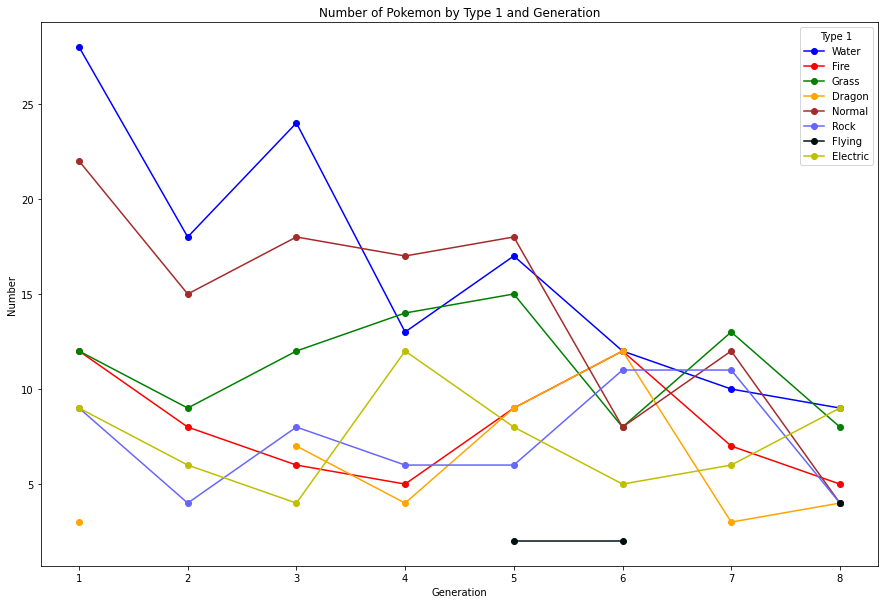

In [ ]:
# Type 1 :

number = df_pokemon.groupby(['Generation', 'Type 1']).count().reset_index()
number = number[['Generation', 'Type 1', 'BST']]
number = number.pivot('Generation', 'Type 1', 'BST')
number[['Water', 'Fire', 'Grass', 'Dragon', 'Normal', 'Rock', 'Flying', 'Electric']].plot(color = ['b', 'r', 'g', '#FFA500', 'brown', '#6666ff', '#001012', 'y'], marker = 'o')

fig = plt.gcf()
fig.set_size_inches(15, 10)

plt.xlabel('Generation')
plt.ylabel('Number')
plt.title('Number of Pokemon by Type 1 and Generation')

plt.show()

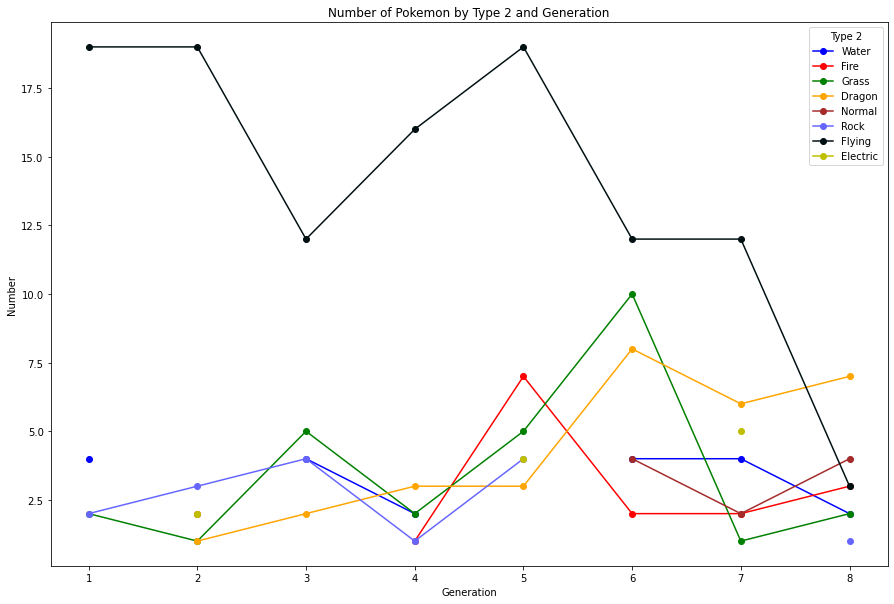

In [ ]:
# Type 2 :

number = df_pokemon.groupby(['Generation', 'Type 2']).count().reset_index()
number = number[['Generation', 'Type 2', 'BST']]
number = number.pivot('Generation', 'Type 2', 'BST')
number[['Water', 'Fire', 'Grass', 'Dragon', 'Normal', 'Rock', 'Flying', 'Electric']].plot(color = ['b', 'r', 'g', '#FFA500', 'brown', '#6666ff', '#001012', 'y'], marker = 'o')

fig = plt.gcf()
fig.set_size_inches(15, 10)

plt.xlabel('Generation')
plt.ylabel('Number')
plt.title('Number of Pokemon by Type 2 and Generation')

plt.show()

## Count of Pokemon by Type

In [ ]:
gen = df_pokemon["Generation"].value_counts().sort_index().to_frame()
gen.columns = ['Number'] # rename column Generation --> Number
gen # order by gen 1 to 8 (and not by values)

Number
1.0     151
2.0     100
3.0     138
4.0     116
5.0     163
6.0     133
7.0     116
8.0     115

### Dataframe by Generations

In [ ]:
g1 = df_pokemon[df_pokemon['Generation'] == 1.0].copy(deep=True)
g2 = df_pokemon[df_pokemon['Generation'] == 2.0].copy(deep=True)
g3 = df_pokemon[df_pokemon['Generation'] == 3.0].copy(deep=True)
g4 = df_pokemon[df_pokemon['Generation'] == 4.0].copy(deep=True)
g5 = df_pokemon[df_pokemon['Generation'] == 5.0].copy(deep=True)
g6 = df_pokemon[df_pokemon['Generation'] == 6.0].copy(deep=True)
g7 = df_pokemon[df_pokemon['Generation'] == 7.0].copy(deep=True)
g8 = df_pokemon[df_pokemon['Generation'] == 8.0].copy(deep=True)

In [ ]:
g1.head(2)

Number Type 1  Type 2                    Abilities  HP  Att  Def  \
Name                                                                          
Bulbasaur       1  Grass  Poison  ['Chlorophyll', 'Overgrow']  45   49   49   
Ivysaur         2  Grass  Poison  ['Chlorophyll', 'Overgrow']  60   62   63   

           Spa  Spd  Spe  BST  Mean  Standard Deviation  Generation  \
Name                                                                  
Bulbasaur   65   65   45  318  53.0            8.640988         1.0   
Ivysaur     80   80   60  405  67.5            8.902247         1.0   

          Experience type  Experience to level 100  Final Evolution  \
Name                                                                  
Bulbasaur     Medium Slow                  1059860              0.0   
Ivysaur       Medium Slow                  1059860              0.0   

           Catch Rate  Legendary  Mega Evolution  Alolan Form  Galarian Form  \
Name                                                                           
Bulbasaur          45        0.0             0.0          0.0            0.0   
Ivysaur            45        0.0             0.0          0.0            0.0   

           Against Normal  Against Fire  Against Water  Against Electric  \
Name                                                                       
Bulbasaur             1.0           2.0            0.5               0.5   
Ivysaur               1.0           2.0            0.5               0.5   

           Against Grass  Against Ice  Against Fighting  Against Poison  \
Name                                                                      
Bulbasaur           0.25          2.0               0.5             1.0   
Ivysaur             0.25          2.0               0.5             1.0   

           Against Ground  Against Flying  Against Psychic  Against Bug  \
Name                                                                      
Bulbasaur             1.0             2.0              2.0          1.0   
Ivysaur               1.0             2.0              2.0          1.0   

           Against Rock  Against Ghost  Against Dragon  Against Dark  \
Name                                                                   
Bulbasaur           1.0            1.0             1.0           1.0   
Ivysaur             1.0            1.0             1.0           1.0   

           Against Steel  Against Fairy  Height  Weight   BMI  
Name                                                           
Bulbasaur            1.0            0.5     0.7     6.9  14.1  
Ivysaur              1.0            0.5     1.0    13.0  13.0

In [ ]:
g2.head(2)

Number Type 1 Type 2                   Abilities  HP  Att  Def  \
Name                                                                        
Chikorita     152  Grass    NaN  ['Leaf Guard', 'Overgrow']  45   49   65   
Bayleef       153  Grass    NaN  ['Leaf Guard', 'Overgrow']  60   62   80   

           Spa  Spd  Spe  BST  Mean  Standard Deviation  Generation  \
Name                                                                  
Chikorita   49   65   45  318  53.0            8.640988         2.0   
Bayleef     63   80   60  405  67.5            8.902247         2.0   

          Experience type  Experience to level 100  Final Evolution  \
Name                                                                  
Chikorita     Medium Slow                  1059860              0.0   
Bayleef       Medium Slow                  1059860              0.0   

           Catch Rate  Legendary  Mega Evolution  Alolan Form  Galarian Form  \
Name                                                                           
Chikorita          45        0.0             0.0          0.0            0.0   
Bayleef            45        0.0             0.0          0.0            0.0   

           Against Normal  Against Fire  Against Water  Against Electric  \
Name                                                                       
Chikorita             1.0           2.0            0.5               0.5   
Bayleef               1.0           2.0            0.5               0.5   

           Against Grass  Against Ice  Against Fighting  Against Poison  \
Name                                                                      
Chikorita            0.5          2.0               1.0             2.0   
Bayleef              0.5          2.0               1.0             2.0   

           Against Ground  Against Flying  Against Psychic  Against Bug  \
Name                                                                      
Chikorita             0.5             2.0              1.0          2.0   
Bayleef               0.5             2.0              1.0          2.0   

           Against Rock  Against Ghost  Against Dragon  Against Dark  \
Name                                                                   
Chikorita           1.0            1.0             1.0           1.0   
Bayleef             1.0            1.0             1.0           1.0   

           Against Steel  Against Fairy  Height  Weight   BMI  
Name                                                           
Chikorita            1.0            1.0     0.9     6.4   7.9  
Bayleef              1.0            1.0     1.2    15.8  11.0

In [ ]:
g3.head(2)

Number Type 1 Type 2                 Abilities  HP  Att  Def  Spa  \
Name                                                                         
Treecko     252  Grass    NaN  ['Overgrow', 'Unburden']  40   45   35   65   
Grovyle     253  Grass    NaN  ['Overgrow', 'Unburden']  50   65   45   85   

         Spd  Spe  BST       Mean  Standard Deviation  Generation  \
Name                                                                
Treecko   55   70  310  51.666667           12.801910         3.0   
Grovyle   65   95  405  67.500000           17.736497         3.0   

        Experience type  Experience to level 100  Final Evolution  Catch Rate  \
Name                                                                            
Treecko     Medium Slow                  1059860              0.0          45   
Grovyle     Medium Slow                  1059860              0.0          45   

         Legendary  Mega Evolution  Alolan Form  Galarian Form  \
Name                                                             
Treecko        0.0             0.0          0.0            0.0   
Grovyle        0.0             0.0          0.0            0.0   

         Against Normal  Against Fire  Against Water  Against Electric  \
Name                                                                     
Treecko             1.0           2.0            0.5               0.5   
Grovyle             1.0           2.0            0.5               0.5   

         Against Grass  Against Ice  Against Fighting  Against Poison  \
Name                                                                    
Treecko            0.5          2.0               1.0             2.0   
Grovyle            0.5          2.0               1.0             2.0   

         Against Ground  Against Flying  Against Psychic  Against Bug  \
Name                                                                    
Treecko             0.5             2.0              1.0          2.0   
Grovyle             0.5             2.0              1.0          2.0   

         Against Rock  Against Ghost  Against Dragon  Against Dark  \
Name                                                                 
Treecko           1.0            1.0             1.0           1.0   
Grovyle           1.0            1.0             1.0           1.0   

         Against Steel  Against Fairy  Height  Weight   BMI  
Name                                                         
Treecko            1.0            1.0     0.5     5.0  20.0  
Grovyle            1.0            1.0     0.9    21.6  26.7

In [ ]:
g4.head(2)

Number Type 1 Type 2                    Abilities  HP  Att  Def  Spa  \
Name                                                                            
Turtwig     387  Grass    NaN  ['Overgrow', 'Shell Armor']  55   68   64   45   
Grotle      388  Grass    NaN  ['Overgrow', 'Shell Armor']  75   89   85   55   

         Spd  Spe  BST  Mean  Standard Deviation  Generation Experience type  \
Name                                                                           
Turtwig   55   31  318  53.0           12.261049         4.0     Medium Slow   
Grotle    65   36  405  67.5           18.163608         4.0     Medium Slow   

         Experience to level 100  Final Evolution  Catch Rate  Legendary  \
Name                                                                       
Turtwig                  1059860              0.0          45        0.0   
Grotle                   1059860              0.0          45        0.0   

         Mega Evolution  Alolan Form  Galarian Form  Against Normal  \
Name                                                                  
Turtwig             0.0          0.0            0.0             1.0   
Grotle              0.0          0.0            0.0             1.0   

         Against Fire  Against Water  Against Electric  Against Grass  \
Name                                                                    
Turtwig           2.0            0.5               0.5            0.5   
Grotle            2.0            0.5               0.5            0.5   

         Against Ice  Against Fighting  Against Poison  Against Ground  \
Name                                                                     
Turtwig          2.0               1.0             2.0             0.5   
Grotle           2.0               1.0             2.0             0.5   

         Against Flying  Against Psychic  Against Bug  Against Rock  \
Name                                                                  
Turtwig             2.0              1.0          2.0           1.0   
Grotle              2.0              1.0          2.0           1.0   

         Against Ghost  Against Dragon  Against Dark  Against Steel  \
Name                                                                  
Turtwig            1.0             1.0           1.0            1.0   
Grotle             1.0             1.0           1.0            1.0   

         Against Fairy  Height  Weight   BMI  
Name                                          
Turtwig            1.0     0.4    10.2  63.8  
Grotle             1.0     1.1    97.0  80.2

In [ ]:
g5.head(2)

Number   Type 1 Type 2                 Abilities   HP  Att  Def  Spa  \
Name                                                                            
Victini     494  Psychic   Fire          ['Victory Star']  100  100  100  100   
Snivy       495    Grass    NaN  ['Contrary', 'Overgrow']   45   45   55   45   

         Spd  Spe  BST        Mean  Standard Deviation  Generation  \
Name                                                                 
Victini  100  100  600  100.000000            0.000000         5.0   
Snivy     55   63  308   51.333333            6.871843         5.0   

        Experience type  Experience to level 100  Final Evolution  Catch Rate  \
Name                                                                            
Victini            Slow                  1250000              1.0           3   
Snivy       Medium Slow                  1059860              0.0          45   

         Legendary  Mega Evolution  Alolan Form  Galarian Form  \
Name                                                             
Victini        1.0             0.0          0.0            0.0   
Snivy          0.0             0.0          0.0            0.0   

         Against Normal  Against Fire  Against Water  Against Electric  \
Name                                                                     
Victini             1.0           0.5            2.0               1.0   
Snivy               1.0           2.0            0.5               0.5   

         Against Grass  Against Ice  Against Fighting  Against Poison  \
Name                                                                    
Victini            0.5          0.5               0.5             1.0   
Snivy              0.5          2.0               1.0             2.0   

         Against Ground  Against Flying  Against Psychic  Against Bug  \
Name                                                                    
Victini             2.0             1.0              0.5          1.0   
Snivy               0.5             2.0              1.0          2.0   

         Against Rock  Against Ghost  Against Dragon  Against Dark  \
Name                                                                 
Victini           2.0            2.0             1.0           2.0   
Snivy             1.0            1.0             1.0           1.0   

         Against Steel  Against Fairy  Height  Weight   BMI  
Name                                                         
Victini            0.5            0.5     0.4     4.0  25.0  
Snivy              1.0            1.0     0.6     8.1  22.5

In [ ]:
g6.head(2)

Number Type 1  Type 2      Abilities  HP  Att  Def  Spa  \
Name                                                                        
Mega Venusaur          3  Grass  Poison  ['Thick Fat']  80  100  123  122   
Mega Charizard Y       6   Fire  Flying    ['Drought']  78  104   78  159   

                  Spd  Spe  BST        Mean  Standard Deviation  Generation  \
Name                                                                          
Mega Venusaur     120   80  625  104.166667           18.747592         6.0   
Mega Charizard Y  115  100  634  105.666667           27.378012         6.0   

                 Experience type  Experience to level 100  Final Evolution  \
Name                                                                         
Mega Venusaur        Medium Slow                  1059860              1.0   
Mega Charizard Y     Medium Slow                  1059860              1.0   

                  Catch Rate  Legendary  Mega Evolution  Alolan Form  \
Name                                                                   
Mega Venusaur             45        0.0             1.0          0.0   
Mega Charizard Y          45        0.0             1.0          0.0   

                  Galarian Form  Against Normal  Against Fire  Against Water  \
Name                                                                           
Mega Venusaur               0.0             1.0           2.0            0.5   
Mega Charizard Y            0.0             1.0           0.5            2.0   

                  Against Electric  Against Grass  Against Ice  \
Name                                                             
Mega Venusaur                  0.5           0.25          2.0   
Mega Charizard Y               2.0           0.25          1.0   

                  Against Fighting  Against Poison  Against Ground  \
Name                                                                 
Mega Venusaur                  0.5             1.0             1.0   
Mega Charizard Y               0.5             1.0             0.0   

                  Against Flying  Against Psychic  Against Bug  Against Rock  \
Name                                                                           
Mega Venusaur                2.0              2.0         1.00           1.0   
Mega Charizard Y             1.0              1.0         0.25           4.0   

                  Against Ghost  Against Dragon  Against Dark  Against Steel  \
Name                                                                           
Mega Venusaur               1.0             1.0           1.0            1.0   
Mega Charizard Y            1.0             1.0           1.0            0.5   

                  Against Fairy  Height  Weight   BMI  
Name                                                   
Mega Venusaur               0.5     2.4   155.5  27.0  
Mega Charizard Y            0.5     1.7   100.5  34.8

In [ ]:
g7.head(2)

Number Type 1  Type 2                            Abilities  \
Name                                                                          
Alolan Rattata       19   Dark  Normal  ['Gluttony', 'Hustle', 'Thick Fat']   
Alolan Raticate      20   Dark  Normal  ['Gluttony', 'Hustle', 'Thick Fat']   

                 HP  Att  Def  Spa  Spd  Spe  BST       Mean  \
Name                                                           
Alolan Rattata   30   56   35   25   35   72  253  42.166667   
Alolan Raticate  75   71   70   40   80   77  413  68.833333   

                 Standard Deviation  Generation Experience type  \
Name                                                              
Alolan Rattata            16.466296         7.0     Medium Fast   
Alolan Raticate           13.334375         7.0     Medium Fast   

                 Experience to level 100  Final Evolution  Catch Rate  \
Name                                                                    
Alolan Rattata                   1000000              0.0         255   
Alolan Raticate                  1000000              1.0         127   

                 Legendary  Mega Evolution  Alolan Form  Galarian Form  \
Name                                                                     
Alolan Rattata         0.0             0.0          1.0            0.0   
Alolan Raticate        0.0             0.0          1.0            0.0   

                 Against Normal  Against Fire  Against Water  \
Name                                                           
Alolan Rattata              1.0           1.0            1.0   
Alolan Raticate             1.0           1.0            1.0   

                 Against Electric  Against Grass  Against Ice  \
Name                                                            
Alolan Rattata                1.0            1.0          1.0   
Alolan Raticate               1.0            1.0          1.0   

                 Against Fighting  Against Poison  Against Ground  \
Name                                                                
Alolan Rattata                4.0             1.0             1.0   
Alolan Raticate               4.0             1.0             1.0   

                 Against Flying  Against Psychic  Against Bug  Against Rock  \
Name                                                                          
Alolan Rattata              1.0              0.0          2.0           1.0   
Alolan Raticate             1.0              0.0          2.0           1.0   

                 Against Ghost  Against Dragon  Against Dark  Against Steel  \
Name                                                                          
Alolan Rattata             0.0             1.0           0.5            1.0   
Alolan Raticate            0.0             1.0           0.5            1.0   

                 Against Fairy  Height  Weight   BMI  
Name                                                  
Alolan Rattata             2.0     0.3     3.8  42.2  
Alolan Raticate            2.0     0.7    25.5  52.0

In [ ]:
g8.head(2)

Number   Type 1 Type 2  \
Name                                      
Galarian Meowth      52    Steel    NaN   
Galarian Ponyta      77  Psychic    NaN   

                                                   Abilities  HP  Att  Def  \
Name                                                                         
Galarian Meowth         ['Pickup', 'Tough Claws', 'Unnerve']  50   65   55   
Galarian Ponyta  ['Anticipation', 'Pastel Veil', 'Run Away']  50   85   55   

                 Spa  Spd  Spe  BST       Mean  Standard Deviation  \
Name                                                                 
Galarian Meowth   40   40   40  290  48.333333            9.428090   
Galarian Ponyta   65   65   90  410  68.333333           14.624941   

                 Generation Experience type  Experience to level 100  \
Name                                                                   
Galarian Meowth         8.0     Medium Fast                  1000000   
Galarian Ponyta         8.0     Medium Fast                  1000000   

                 Final Evolution  Catch Rate  Legendary  Mega Evolution  \
Name                                                                      
Galarian Meowth              0.0         255        0.0             0.0   
Galarian Ponyta              0.0         190        0.0             0.0   

                 Alolan Form  Galarian Form  Against Normal  Against Fire  \
Name                                                                        
Galarian Meowth          0.0            1.0             0.5           2.0   
Galarian Ponyta          0.0            1.0             1.0           1.0   

                 Against Water  Against Electric  Against Grass  Against Ice  \
Name                                                                           
Galarian Meowth            1.0               1.0            0.5          0.5   
Galarian Ponyta            1.0               1.0            1.0          1.0   

                 Against Fighting  Against Poison  Against Ground  \
Name                                                                
Galarian Meowth               2.0             0.0             2.0   
Galarian Ponyta               0.5             1.0             1.0   

                 Against Flying  Against Psychic  Against Bug  Against Rock  \
Name                                                                          
Galarian Meowth             0.5              0.5          0.5           0.5   
Galarian Ponyta             1.0              0.5          2.0           1.0   

                 Against Ghost  Against Dragon  Against Dark  Against Steel  \
Name                                                                          
Galarian Meowth            1.0             0.5           1.0            0.5   
Galarian Ponyta            2.0             1.0           2.0            1.0   

                 Against Fairy  Height  Weight   BMI  
Name                                                  
Galarian Meowth            0.5     0.4     7.5  46.9  
Galarian Ponyta            1.0     0.8    24.0  37.5

### Number of Pokemons by Generations by Type

Each Generation add Pokemon with different Types (and Double Types).

We created 2 Dataframes :
- The first with the count of Pokemon with each Type 1 (df_t1)
- The second with the count of Pokemon with each Type 2 (df_t2)

Finally, we need to group the typings by Generations (df_type_gen), add them and created a Heatmap to show the counts easily.

In [ ]:
# Number of Pokemons with xxxx Type on Type 1 :
df_t1 = pd.DataFrame(df_pokemon.groupby('Generation')['Type 1'].value_counts())
df_t1.columns = ['Number'] # rename column Generation --> Number
df_t1 = df_t1.reset_index()
df_t1.columns = ['Generation', 'Type', 'Number']
df_t1.head()

Generation    Type  Number
0         1.0   Water      28
1         1.0  Normal      22
2         1.0  Poison      14
3         1.0     Bug      12
4         1.0    Fire      12

In [ ]:
# Number of Pokemon with xxxx Type on Type 2 (order by Generation) :

df_t2 = pd.DataFrame(df_pokemon.groupby('Generation')['Type 2'].value_counts())
df_t2.columns = ['Number'] # rename column Generation --> Number
df_t2 = df_t2.reset_index()
df_t2.columns = ['Generation', 'Type', 'Number']
df_t2.head()

Generation     Type  Number
0         1.0   Flying      19
1         1.0   Poison      19
2         1.0   Ground       6
3         1.0  Psychic       6
4         1.0    Water       4

In [ ]:
df_t2 = df_t2.set_index(['Generation','Type']).unstack().swaplevel(0, 1, 1).sort_index(1)
df_t1 = df_t1.set_index(['Generation','Type']).unstack().swaplevel(0, 1, 1).sort_index(1)
df_type_gen = pd.DataFrame(df_t2.add(df_t1, fill_value = 0))
# df_type_gen.loc['Column_Total'] = df_type_gen.sum(numeric_only = True, axis = 0)
# df_type_gen.loc[:, 'Row_Total'] = df_type_gen.sum(numeric_only = True, axis = 1)
df_type_gen

Type          Bug   Dark Dragon Electric  Fairy Fighting   Fire Flying  Ghost  \
           Number Number Number   Number Number   Number Number Number Number   
Generation                                                                      
1.0          12.0    NaN    3.0      9.0    5.0      8.0   12.0   19.0    3.0   
2.0          10.0    6.0    1.0      8.0    8.0      3.0   10.0   19.0    1.0   
3.0          14.0   10.0    9.0      4.0    5.0      7.0    6.0   12.0    6.0   
4.0          11.0    7.0    7.0     12.0    2.0      7.0    6.0   16.0    9.0   
5.0          18.0   16.0   12.0     12.0    2.0     16.0   16.0   21.0    9.0   
6.0           7.0   13.0   20.0      5.0   18.0     11.0   14.0   14.0   18.0   
7.0          11.0    8.0    9.0     11.0   13.0     10.0    9.0   12.0   11.0   
8.0           7.0   12.0   11.0      9.0   10.0     11.0    8.0    7.0   11.0   

Type        Grass Ground    Ice Normal Poison Psychic   Rock  Steel  Water  
           Number Number Number Number Number  Number Number Number Number  
Generation                                                                  
1.0          14.0   14.0    5.0   22.0   33.0    14.0   11.0    2.0   32.0  
2.0          10.0   10.0    5.0   15.0    4.0    10.0    7.0    4.0   18.0  
3.0          17.0   13.0    6.0   18.0    5.0    23.0   12.0    9.0   28.0  
4.0          16.0   11.0    7.0   17.0    8.0     9.0    7.0   11.0   15.0  
5.0          20.0   12.0    9.0   18.0    7.0    16.0   10.0   12.0   17.0  
6.0          18.0    9.0    6.0   12.0    5.0    17.0   11.0   11.0   16.0  
7.0          14.0    6.0    5.0   14.0    9.0    13.0   11.0   13.0   14.0  
8.0          10.0    5.0   13.0    8.0    6.0    17.0    5.0    9.0   11.0

In [ ]:
df_type_gen.fillna(value = 0, inplace = True) # replace NaN values --> 0
df_type_gen.head()

Type          Bug   Dark Dragon Electric  Fairy Fighting   Fire Flying  Ghost  \
           Number Number Number   Number Number   Number Number Number Number   
Generation                                                                      
1.0          12.0    0.0    3.0      9.0    5.0      8.0   12.0   19.0    3.0   
2.0          10.0    6.0    1.0      8.0    8.0      3.0   10.0   19.0    1.0   
3.0          14.0   10.0    9.0      4.0    5.0      7.0    6.0   12.0    6.0   
4.0          11.0    7.0    7.0     12.0    2.0      7.0    6.0   16.0    9.0   
5.0          18.0   16.0   12.0     12.0    2.0     16.0   16.0   21.0    9.0   

Type        Grass Ground    Ice Normal Poison Psychic   Rock  Steel  Water  
           Number Number Number Number Number  Number Number Number Number  
Generation                                                                  
1.0          14.0   14.0    5.0   22.0   33.0    14.0   11.0    2.0   32.0  
2.0          10.0   10.0    5.0   15.0    4.0    10.0    7.0    4.0   18.0  
3.0          17.0   13.0    6.0   18.0    5.0    23.0   12.0    9.0   28.0  
4.0          16.0   11.0    7.0   17.0    8.0     9.0    7.0   11.0   15.0  
5.0          20.0   12.0    9.0   18.0    7.0    16.0   10.0   12.0   17.0

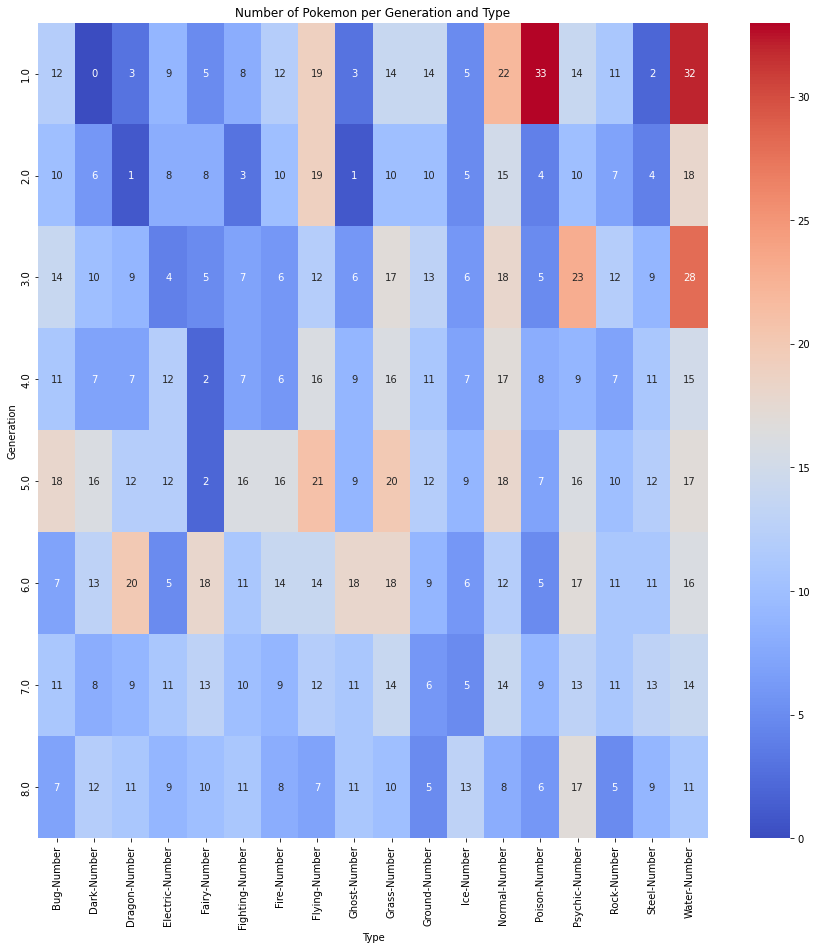

In [ ]:
# Heatmap :

fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(df_type_gen, annot = True, cmap = 'coolwarm')
ax.set_xlabel('Type')
ax.set_ylabel('Generation')
ax.set_title('Number of Pokemon per Generation and Type', fontsize = 12)
plt.show()

- In Gen 1 : no Pokemon with Dark type (doesn't exist at this time) and only 2 with Steel type (which was introduced officially in Gen 2). There are lots of Pokemon with Poison type (33) and Water type (32).
- In Gen 3 : 28 Pokemon with Water type. Much of the Hoenn region is covered in water.
- In Gen 6 : 18 Pokemon with Fairy type. 
It's almost the equivalent of the first 5 generations combined ! Fairy type was introduced in this generation.
- There are no dominant type in Gens 7 and 8 (except Psychic in Gen 8).

### Count of Pokemon by Double Types

Some Pokemon have two Types.

We are count the Double Types. Which DT is the most common in Pokemon ?

#### Double Types are NOT exchangeable

Warning ! The DT are not exchangeable. A Fire-Psychic Pokemon doesn't count as Psychic-Fire Pokemon !

In [ ]:
df_dt = df_pokemon.groupby('Type 1')['Type 2'].value_counts().unstack('Type 2', fill_value = 0)
df_dt


Type 2    Bug  Dark  Dragon  Electric  Fairy  Fighting  Fire  Flying  Ghost  \
Type 1                                                                        
Bug         0     0       0         4      2         4     2      14      1   
Dark        0     0       4         0      3         2     3       6      2   
Dragon      0     0       0         1      1         2     1       6      4   
Electric    0     1       2         0      2         0     1       6      1   
Fairy       0     0       0         0      0         0     0       2      0   
Fighting    0     2       0         0      0         0     0       2      1   
Fire        2     1       2         0      0         7     0       7      2   
Flying      0     0       2         0      0         0     0       0      0   
Ghost       0     1       1         0      1         0     3       3      0   
Grass       0     3       5         0      5         3     0       7      1   
Ground      0     3       2         1      0         0     1       4      4   
Ice         2     0       0         0      1         0     1       2      1   
Normal      0     0       1         0      5         4     0      27      0   
Poison      1     5       3         0      1         2     2       3      0   
Psychic     0     1       1         0      9         3     1       8      4   
Rock        2     2       2         3      3         1     2       6      0   
Steel       0     0       2         0      4         1     0       2      4   
Water       2     7       3         2      4         2     0       7      2   

Type 2    Grass  Ground  Ice  Normal  Poison  Psychic  Rock  Steel  Water  
Type 1                                                                     
Bug           6       2    0       0      12        2     3      7      3  
Dark          1       0    2       5       0        2     0      2      0  
Dragon        0       7    3       0       0        4     0      0      0  
Electric      1       0    2       2       2        1     0      4      1  
Fairy         0       0    0       0       0        0     0      1      0  
Fighting      0       0    1       0       0        3     0      3      1  
Fire          0       3    0       2       0        2     1      1      1  
Flying        0       0    0       0       0        0     0      1      1  
Ghost        11       2    0       0       4        0     0      0      0  
Grass         0       1    3       0      15        2     0      3      0  
Ground        0       0    0       0       0        2     3      4      0  
Ice           0       3    0       0       0        4     0      2      3  
Normal        2       1    0       0       0        3     0      0      1  
Poison        0       2    0       0       0        2     0      0      3  
Psychic       2       0    1       1       0        0     0      2      0  
Rock          2       6    2       0       1        2     0      4      6  
Steel         0       2    0       0       0        7     3      0      0  
Water         3      10    4       0       3        6     5      1      0

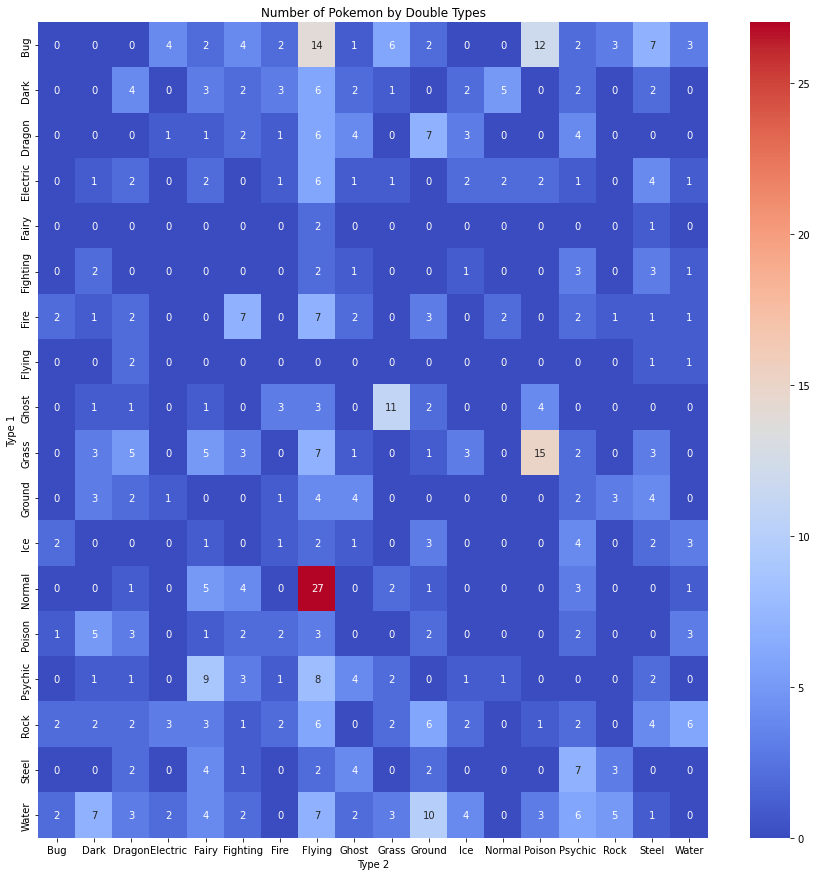

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))

sns.heatmap(df_dt, annot = True, cmap = 'coolwarm')
ax.set_title('Number of Pokemon by Double Types', fontsize = 12)
ax.set_xlabel('Type 2')
ax.set_ylabel('Type 1')

plt.show()

#### Double Types are exchangeable

The DT are exchangeable here. A Fire-Psychic Pokemon count as Psychic-Fire Pokemon !

In [ ]:
df_dt

Type 2    Bug  Dark  Dragon  Electric  Fairy  Fighting  Fire  Flying  Ghost  \
Type 1                                                                        
Bug         0     0       0         4      2         4     2      14      1   
Dark        0     0       4         0      3         2     3       6      2   
Dragon      0     0       0         1      1         2     1       6      4   
Electric    0     1       2         0      2         0     1       6      1   
Fairy       0     0       0         0      0         0     0       2      0   
Fighting    0     2       0         0      0         0     0       2      1   
Fire        2     1       2         0      0         7     0       7      2   
Flying      0     0       2         0      0         0     0       0      0   
Ghost       0     1       1         0      1         0     3       3      0   
Grass       0     3       5         0      5         3     0       7      1   
Ground      0     3       2         1      0         0     1       4      4   
Ice         2     0       0         0      1         0     1       2      1   
Normal      0     0       1         0      5         4     0      27      0   
Poison      1     5       3         0      1         2     2       3      0   
Psychic     0     1       1         0      9         3     1       8      4   
Rock        2     2       2         3      3         1     2       6      0   
Steel       0     0       2         0      4         1     0       2      4   
Water       2     7       3         2      4         2     0       7      2   

Type 2    Grass  Ground  Ice  Normal  Poison  Psychic  Rock  Steel  Water  
Type 1                                                                     
Bug           6       2    0       0      12        2     3      7      3  
Dark          1       0    2       5       0        2     0      2      0  
Dragon        0       7    3       0       0        4     0      0      0  
Electric      1       0    2       2       2        1     0      4      1  
Fairy         0       0    0       0       0        0     0      1      0  
Fighting      0       0    1       0       0        3     0      3      1  
Fire          0       3    0       2       0        2     1      1      1  
Flying        0       0    0       0       0        0     0      1      1  
Ghost        11       2    0       0       4        0     0      0      0  
Grass         0       1    3       0      15        2     0      3      0  
Ground        0       0    0       0       0        2     3      4      0  
Ice           0       3    0       0       0        4     0      2      3  
Normal        2       1    0       0       0        3     0      0      1  
Poison        0       2    0       0       0        2     0      0      3  
Psychic       2       0    1       1       0        0     0      2      0  
Rock          2       6    2       0       1        2     0      4      6  
Steel         0       2    0       0       0        7     3      0      0  
Water         3      10    4       0       3        6     5      1      0

In [ ]:
total_types = df_dt + df_dt.transpose()
total_types

Type 2    Bug  Dark  Dragon  Electric  Fairy  Fighting  Fire  Flying  Ghost  \
Type 1                                                                        
Bug         0     0       0         4      2         4     4      14      1   
Dark        0     0       4         1      3         4     4       6      3   
Dragon      0     4       0         3      1         2     3       8      5   
Electric    4     1       3         0      2         0     1       6      1   
Fairy       2     3       1         2      0         0     0       2      1   
Fighting    4     4       2         0      0         0     7       2      1   
Fire        4     4       3         1      0         7     0       7      5   
Flying     14     6       8         6      2         2     7       0      3   
Ghost       1     3       5         1      1         1     5       3      0   
Grass       6     4       5         1      5         3     0       7     12   
Ground      2     3       9         1      0         0     4       4      6   
Ice         2     2       3         2      1         1     1       2      1   
Normal      0     5       1         2      5         4     2      27      0   
Poison     13     5       3         2      1         2     2       3      4   
Psychic     2     3       5         1      9         6     3       8      4   
Rock        5     2       2         3      3         1     3       6      0   
Steel       7     2       2         4      5         4     1       3      4   
Water       5     7       3         3      4         3     1       8      2   

Type 2    Grass  Ground  Ice  Normal  Poison  Psychic  Rock  Steel  Water  
Type 1                                                                     
Bug           6       2    2       0      13        2     5      7      5  
Dark          4       3    2       5       5        3     2      2      7  
Dragon        5       9    3       1       3        5     2      2      3  
Electric      1       1    2       2       2        1     3      4      3  
Fairy         5       0    1       5       1        9     3      5      4  
Fighting      3       0    1       4       2        6     1      4      3  
Fire          0       4    1       2       2        3     3      1      1  
Flying        7       4    2      27       3        8     6      3      8  
Ghost        12       6    1       0       4        4     0      4      2  
Grass         0       1    3       2      15        4     2      3      3  
Ground        1       0    3       1       2        2     9      6     10  
Ice           3       3    0       0       0        5     2      2      7  
Normal        2       1    0       0       0        4     0      0      1  
Poison       15       2    0       0       0        2     1      0      6  
Psychic       4       2    5       4       2        0     2      9      6  
Rock          2       9    2       0       1        2     0      7     11  
Steel         3       6    2       0       0        9     7      0      1  
Water         3      10    7       1       6        6    11      1      0

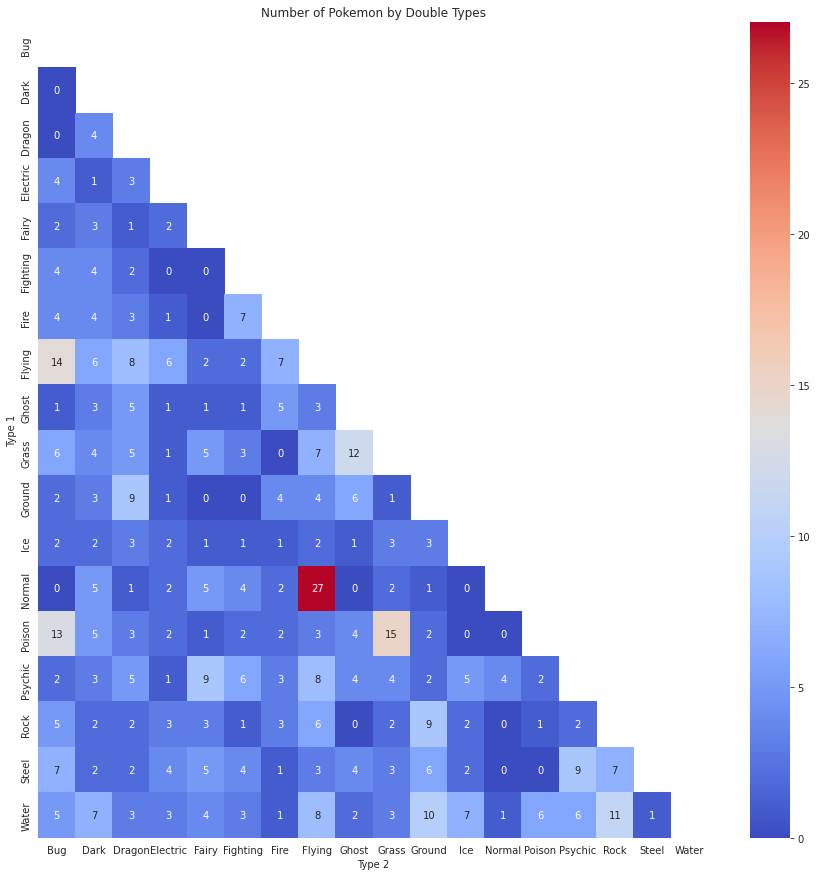

In [ ]:
mask = np.zeros_like(total_types)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize = (15,15))
    ax = sns.heatmap(total_types, mask = mask, annot = True, cmap = 'coolwarm')
ax.set_title('Number of Pokemon by Double Types', fontsize = 12)
ax.set_xlabel('Type 2')
ax.set_ylabel('Type 1')
plt.show()

- Most repeated Double type --> Normal-Flying (27 Pokemon), followed by Poison-Grass (15) and Poison-Bug (13 Pokemon). 
- There are lots of Double types that doesn't exist in Pokemon (each with a 0) !

## Legendaries Pokemon by Type

Which type is the most common amongst Legendary Pokemon ?

We will have to group Types by Legendaries Pokemon and count them.

In [ ]:
# Regroup Legendaries Pokemon by Type 1 :

leg_t1 = df_pokemon[df_pokemon['Legendary'] == 1]['Type 1'].value_counts()
leg_t1

Psychic     30
Dragon      16
Electric     8
Water        8
Steel        8
Fighting     7
Fire         6
Rock         6
Normal       6
Dark         5
Grass        5
Ground       4
Bug          3
Fairy        3
Ice          3
Poison       3
Flying       2
Ghost        2
Name: Type 1, dtype: int64

In [ ]:
# Regroup Legendaries Pokemon by Type 2 :


leg_t2 = df_pokemon[df_pokemon['Legendary'] == 1]['Type 2'].value_counts()
leg_t2

Flying      17
Fighting     8
Steel        8
Dragon       7
Ghost        7
Fairy        7
Psychic      6
Ice          4
Grass        3
Fire         3
Ground       3
Dark         2
Water        2
Electric     1
Poison       1
Name: Type 2, dtype: int64

In [ ]:
df_legendary_types = pd.DataFrame(leg_t1.add(leg_t2, fill_value = 0))
df_legendary_types = df_legendary_types.reset_index()
df_legendary_types = df_legendary_types.sort_values(by = 0, ascending = False)
df_legendary_types.columns = ['Type', 'Number']
df_legendary_types

Type  Number
14   Psychic    36.0
2     Dragon    23.0
7     Flying    19.0
16     Steel    16.0
5   Fighting    15.0
17     Water    10.0
4      Fairy    10.0
3   Electric     9.0
6       Fire     9.0
8      Ghost     9.0
9      Grass     8.0
11       Ice     7.0
10    Ground     7.0
1       Dark     7.0
12    Normal     6.0
15      Rock     6.0
13    Poison     4.0
0        Bug     3.0

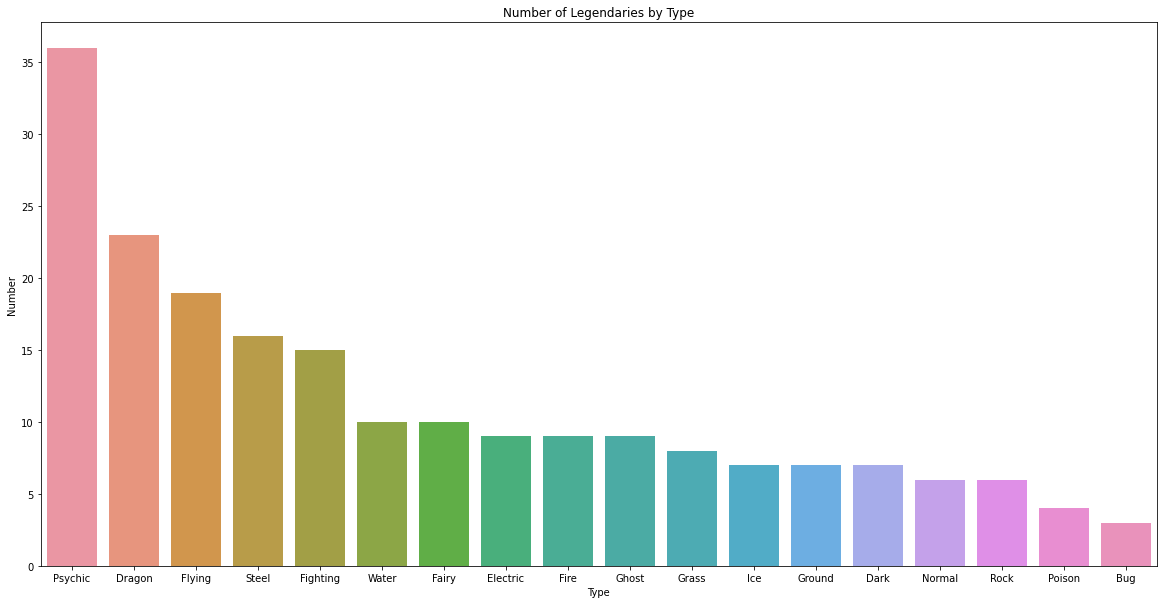

In [ ]:
plt.subplots(figsize = (20, 10))

sns.barplot(data = df_legendary_types, x = "Type", y = "Number")
plt.ylabel("Number")
plt.xlabel("Type")
plt.title("Number of Legendaries by Type")

plt.show()

Psychic is the most common Type for Legendaries Pokemon.

## Strongest Pokemon by Type

We will take the 1st row for every Type 1 of Pokemon.

We will take the column BST to sort values.

In [ ]:
strong_pokemon_type = df_pokemon.sort_values(by = 'BST', ascending = False)
strong_pokemon_type = strong_pokemon_type.drop_duplicates('Type 1', keep = 'first')
strong_pokemon_type

Number    Type 1   Type 2  \
Name                                                  
Mega Mewtwo Y                150   Psychic      NaN   
Mega Rayquaza                384    Dragon   Flying   
Primal Groudon               383    Ground     Fire   
Primal Kyogre                382     Water      NaN   
Arceus                       493    Normal      NaN   
Zacian Crowned Sword         888     Fairy    Steel   
Zamazenta Crowned Shield     889  Fighting    Steel   
Mega Tyranitar               248      Rock     Dark   
Mega Metagross               376     Steel  Psychic   
Eternatus                    890    Poison   Dragon   
Giratina                     487     Ghost   Dragon   
Ho-Oh                        250      Fire   Flying   
Yveltal                      717      Dark   Flying   
Mega Sceptile                254     Grass   Dragon   
Mega Ampharos                181  Electric   Dragon   
Mega Pinsir                  127       Bug   Flying   
Mega Glalie                  362       Ice      NaN   
Tornadus                     641    Flying      NaN   

                                            Abilities   HP  Att  Def  Spa  \
Name                                                                        
Mega Mewtwo Y                            ['Insomnia']  106  150   70  194   
Mega Rayquaza                        ['Delta Stream']  105  180  100  180   
Primal Groudon                      ['Desolate Land']  100  180  160  150   
Primal Kyogre                      ['Primordial Sea']  100  150   90  180   
Arceus                                  ['Multitype']  120  120  120  120   
Zacian Crowned Sword               ['Intrepid Sword']   92  170  115   80   
Zamazenta Crowned Shield         ['Dauntless Shield']   92  130  145   80   
Mega Tyranitar                        ['Sand Stream']  100  164  150   95   
Mega Metagross                        ['Tough Claws']   80  145  150  105   
Eternatus                                ['Pressure']  140   85   95  145   
Giratina                    ['Pressure', 'Telepathy']  150  100  120  100   
Ho-Oh                     ['Pressure', 'Regenerator']  106  130   90  110   
Yveltal                                 ['Dark Aura']  126  131   95  131   
Mega Sceptile                                      []   70  110   75  145   
Mega Ampharos                        ['Mold Breaker']   90   95  105  165   
Mega Pinsir                              ['Aerilate']   65  155  120   65   
Mega Glalie                           ['Refrigerate']   80  120   80  120   
Tornadus                     ['Defiant', 'Prankster']   79  115   70  125   

                          Spd  Spe  BST        Mean  Standard Deviation  \
Name                                                                      
Mega Mewtwo Y             120  140  780  130.000000           38.453435   
Mega Rayquaza             100  115  780  130.000000           35.707142   
Primal Groudon             90   90  770  128.333333           36.247605   
Primal Kyogre             160   90  770  128.333333           36.247605   
Arceus                    120  120  720  120.000000            0.000000   
Zacian Crowned Sword      115  148  720  120.000000           30.870698   
Zamazenta Crowned Shield  145  128  720  120.000000           25.159491   
Mega Tyranitar            120   71  700  116.666667           32.133402   
Mega Metagross            110  110  700  116.666667           24.094720   
Eternatus                  95  130  690  115.000000           23.979158   
Giratina                  120   90  680  113.333333           19.720266   
Ho-Oh                     154   90  680  113.333333           22.676468   
Yveltal                    98   99  680  113.333333           16.131405   
Mega Sceptile              85  145  630  105.000000           30.956959   
Mega Ampharos             110   45  610  101.666667           35.316034   
Mega Pinsir                90  105  600  100.000000           31.622777   
Mega Glalie                80  100

Every Pokemon in this DF are Legendaries / Mega. And without Legendaries / Mega ?

In [ ]:
no_leg_no_mega = df_pokemon[(df_pokemon['Mega Evolution'] == 0) & (df_pokemon['Legendary'] == 0)]
no_leg_no_mega.head(3)

Number Type 1  Type 2                    Abilities  HP  Att  Def  \
Name                                                                          
Bulbasaur       1  Grass  Poison  ['Chlorophyll', 'Overgrow']  45   49   49   
Ivysaur         2  Grass  Poison  ['Chlorophyll', 'Overgrow']  60   62   63   
Venusaur        3  Grass  Poison  ['Chlorophyll', 'Overgrow']  80   82   83   

           Spa  Spd  Spe  BST  Mean  Standard Deviation  Generation  \
Name                                                                  
Bulbasaur   65   65   45  318  53.0            8.640988         1.0   
Ivysaur     80   80   60  405  67.5            8.902247         1.0   
Venusaur   100  100   80  525  87.5            8.902247         1.0   

          Experience type  Experience to level 100  Final Evolution  \
Name                                                                  
Bulbasaur     Medium Slow                  1059860              0.0   
Ivysaur       Medium Slow                  1059860              0.0   
Venusaur      Medium Slow                  1059860              1.0   

           Catch Rate  Legendary  Mega Evolution  Alolan Form  Galarian Form  \
Name                                                                           
Bulbasaur          45        0.0             0.0          0.0            0.0   
Ivysaur            45        0.0             0.0          0.0            0.0   
Venusaur           45        0.0             0.0          0.0            0.0   

           Against Normal  Against Fire  Against Water  Against Electric  \
Name                                                                       
Bulbasaur             1.0           2.0            0.5               0.5   
Ivysaur               1.0           2.0            0.5               0.5   
Venusaur              1.0           2.0            0.5               0.5   

           Against Grass  Against Ice  Against Fighting  Against Poison  \
Name                                                                      
Bulbasaur           0.25          2.0               0.5             1.0   
Ivysaur             0.25          2.0               0.5             1.0   
Venusaur            0.25          2.0               0.5             1.0   

           Against Ground  Against Flying  Against Psychic  Against Bug  \
Name                                                                      
Bulbasaur             1.0             2.0              2.0          1.0   
Ivysaur               1.0             2.0              2.0          1.0   
Venusaur              1.0             2.0              2.0          1.0   

           Against Rock  Against Ghost  Against Dragon  Against Dark  \
Name                                                                   
Bulbasaur           1.0            1.0             1.0           1.0   
Ivysaur             1.0            1.0             1.0           1.0   
Venusaur            1.0            1.0             1.0           1.0   

           Against Steel  Against Fairy  Height  Weight   BMI  
Name                                                           
Bulbasaur            1.0            0.5     0.7     6.9  14.1  
Ivysaur              1.0            0.5     1.0    13.0  13.0  
Venusaur             1.0            0.5     2.0   100.0  25.0

In [ ]:
strong_pokemon_type = no_leg_no_mega.sort_values(by = 'BST', ascending = False)
strong_pokemon_type = strong_pokemon_type.drop_duplicates('Type 1', keep = 'first')
strong_pokemon_type

Number    Type 1   Type 2  \
Name                                                      
Slaking                          289    Normal      NaN   
Ash-Greninja                     658     Water     Dark   
Dragapult                        887    Dragon    Ghost   
Tyranitar                        248      Rock     Dark   
Metagross                        376     Steel  Psychic   
Hydreigon                        635      Dark   Dragon   
Arcanine                          59      Fire      NaN   
Florges                          671     Fairy      NaN   
Volcarona                        637       Bug     Fire   
Electivire                       466  Electric      NaN   
Galarian Darmanitan Zen-Mode     555       Ice     Fire   
Tangrowth                        465     Grass      NaN   
Crobat                           169    Poison   Flying   
Noivern                          715    Flying   Dragon   
Rhyperior                        464    Ground     Rock   
Espeon                           196   Psychic      NaN   
Dusknoir                         477     Ghost      NaN   
Lucario                          448  Fighting    Steel   

                                                                 Abilities  \
Name                                                                         
Slaking                                                         ['Truant']   
Ash-Greninja                                               ['Battle Bond']   
Dragapult                     ['Clear Body', 'Cursed Body', 'Infiltrator']   
Tyranitar                                       ['Sand Stream', 'Unnerve']   
Metagross                                    ['Clear Body', 'Light Metal']   
Hydreigon                                                     ['Levitate']   
Arcanine                         ['Flash Fire', 'Intimidate', 'Justified']   
Florges                                       ['Flower Veil', 'Symbiosis']   
Volcarona                                          ['Flame Body', 'Swarm']   
Electivire                                 ['Motor Drive', 'Vital Spirit']   
Galarian Darmanitan Zen-Mode               ['Gorilla Tactics', 'Zen Mode']   
Tangrowth                     ['Chlorophyll', 'Leaf Guard', 'Regenerator']   
Crobat                                      ['Infiltrator', 'Inner Focus']   
Noivern                              ['Frisk', 'Infiltrator', 'Telepathy']   
Rhyperior                      ['Lightning Rod', 'Reckless', 'Solid Rock']   
Espeon                                     ['Magic Bounce', 'Synchronize']   
Dusknoir                                             ['Frisk', 'Pressure']   
Lucario                          ['Inner Focus', 'Justified', 'Steadfast']   

                               HP  Att  Def  Spa  Spd  Spe  BST        Mean  \
Name                                                                          
Slaking                       150  160  100   95   65  100  670  111.666667   
Ash-Greninja                   72  145   67  153   71  132  640  106.666667   
Dragapult                      88  120   75  100   75  142  600  100.000000   
Tyranitar                     100  134  110   95  100   61  600  100.000000   
Metagross                      80  135  130   95   90   70  600  100.000000   
Hydreigon                      92  105   90  125   90   98  600  100.000000   
Arcanine                       90  110   80  100   80   95  555   92.500000   
Florges                        78   65   68  112  154   75  552   92.000000   
Volcarona                      85   60   65  135  105  100  550   91.666667   
Electivire                     75  123   67   95   85   95  540   90.000000   
Galarian Darmanitan Zen-Mode  105  160   55   30   55  135  540   90.000000   
Tangrowth                     100  100  125  110   50   50  535   89.166667   
Crobat                         85   90   80   70   80  130  535   89.166667   
Noivern                        85   70   80   97   80  123  535   89.166667   
Rhyperior               

## Strongest Generation

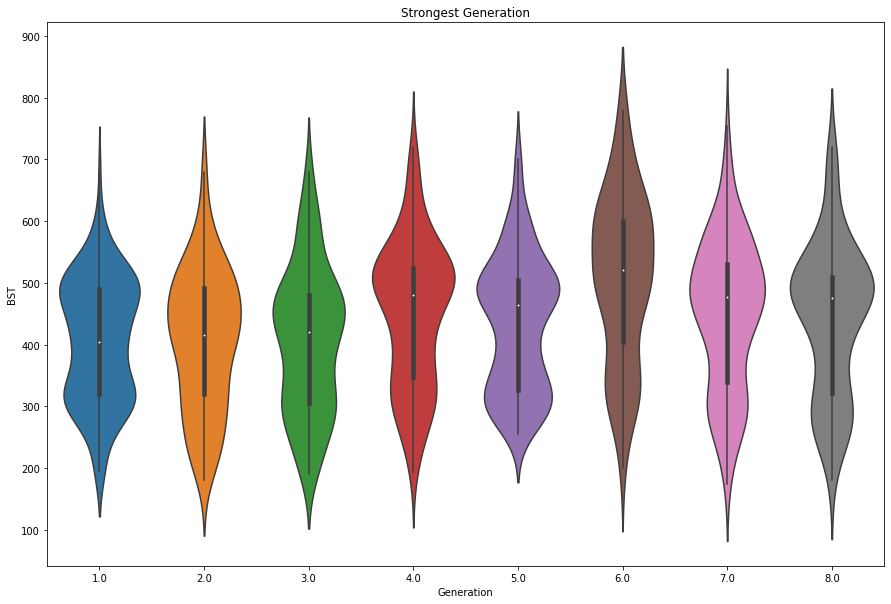

In [ ]:
plt.subplots(figsize = (15, 10))

sns.violinplot(data = df_pokemon, x = "Generation", y = "BST")
plt.title('Strongest Generation')
plt.ylabel("BST")
plt.xlabel("Generation")

plt.show()

Generation 6 is the strongest Generation, but there are lots of Legendary / Mega in this Generation. Let's check the strongest generation without Legendaries and Mega Evolution...

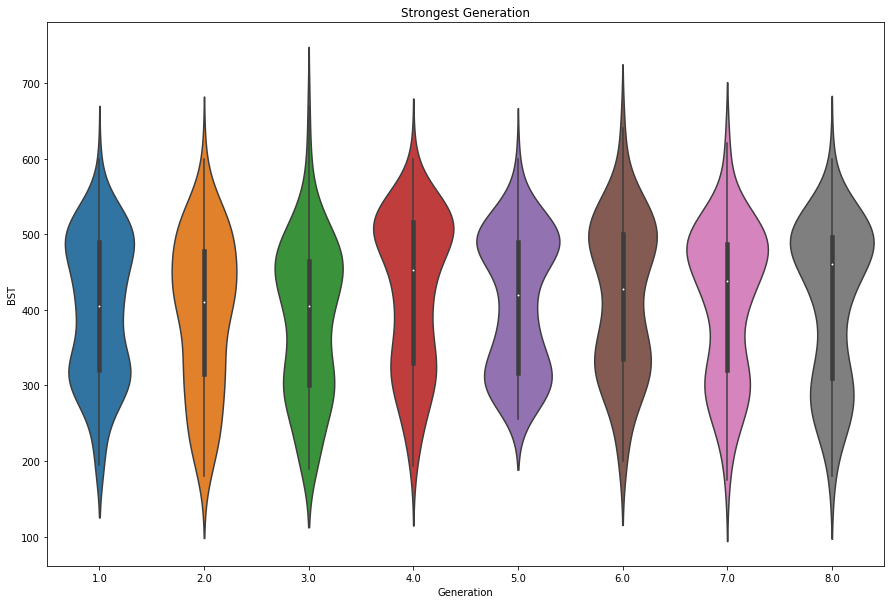

In [ ]:
plt.subplots(figsize = (15, 10))

sns.violinplot(data = no_leg_no_mega, x = "Generation", y = "BST")
plt.title('Strongest Generation')
plt.ylabel("BST")
plt.xlabel("Generation")

plt.show()

Generation 3 is the strongest Generation !

## Relationship between Stats ?

In [ ]:
# Final Evolution = Yes
# Legendaries = No
# Mega Evolution = No
# Create a DF group by stats

stats = df_pokemon[(df_pokemon['Final Evolution'] == 1) & (df_pokemon['Legendary'] == 0) & (df_pokemon['Mega Evolution'] == 0)][['HP', 'Att', 'Def', 'Spa', 'Spd', 'Spe']]
stats.head()

HP  Att  Def  Spa  Spd  Spe
Name                                   
Venusaur    80   82   83  100  100   80
Charizard   78   84   78  109   85  100
Blastoise   79   83  100   85  105   78
Butterfree  60   45   50   90   80   70
Beedrill    65   90   40   45   80   75

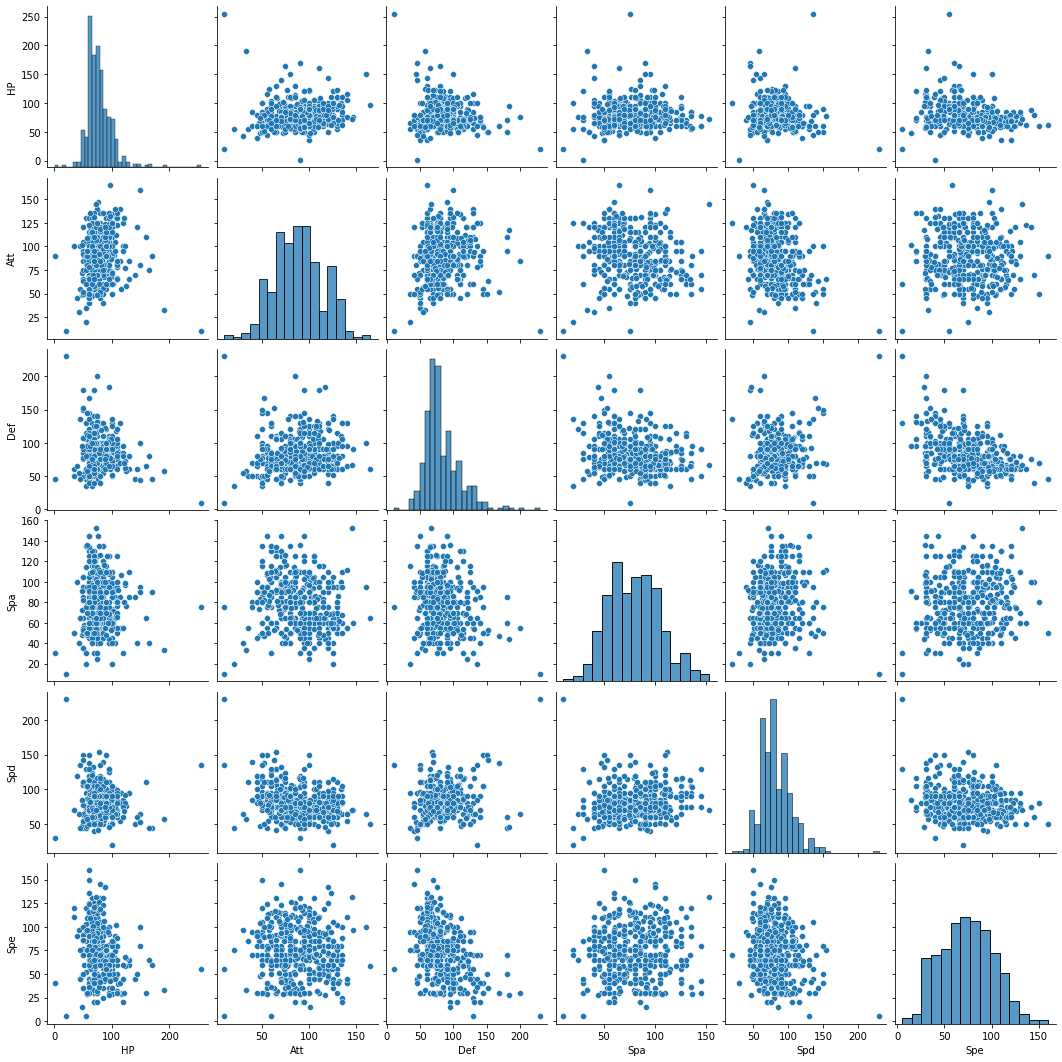

In [ ]:
sns.pairplot(data = stats)
plt.show()

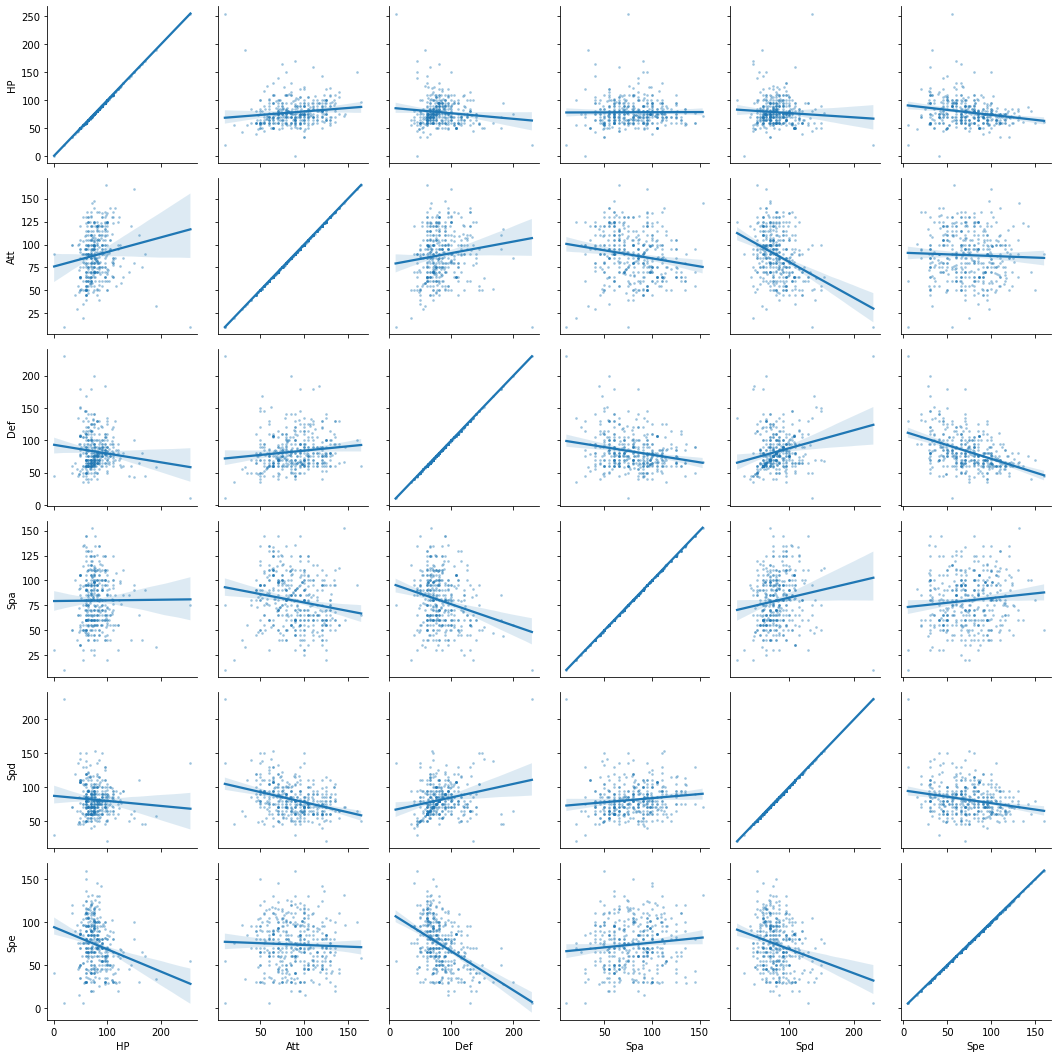

In [ ]:
pairgrid = sns.PairGrid(stats)
pairgrid.map(sns.regplot, scatter_kws = {'alpha': 0.3, 's' : 3})

plt.show()

## Best Type

### Type VS Type

Which type is the better type in Pokemon ? Some examples with Scatterplots :

#### Grass VS Fire

In [ ]:
grass = df_pokemon[(df_pokemon['Type 1'] == 'Grass') | ((df_pokemon['Type 2']) == "Grass")]  # All Grass Pokemon
fire = df_pokemon[(df_pokemon['Type 1'] == 'Fire') | ((df_pokemon['Type 2']) == "Fire")] # All Fire Pokemon

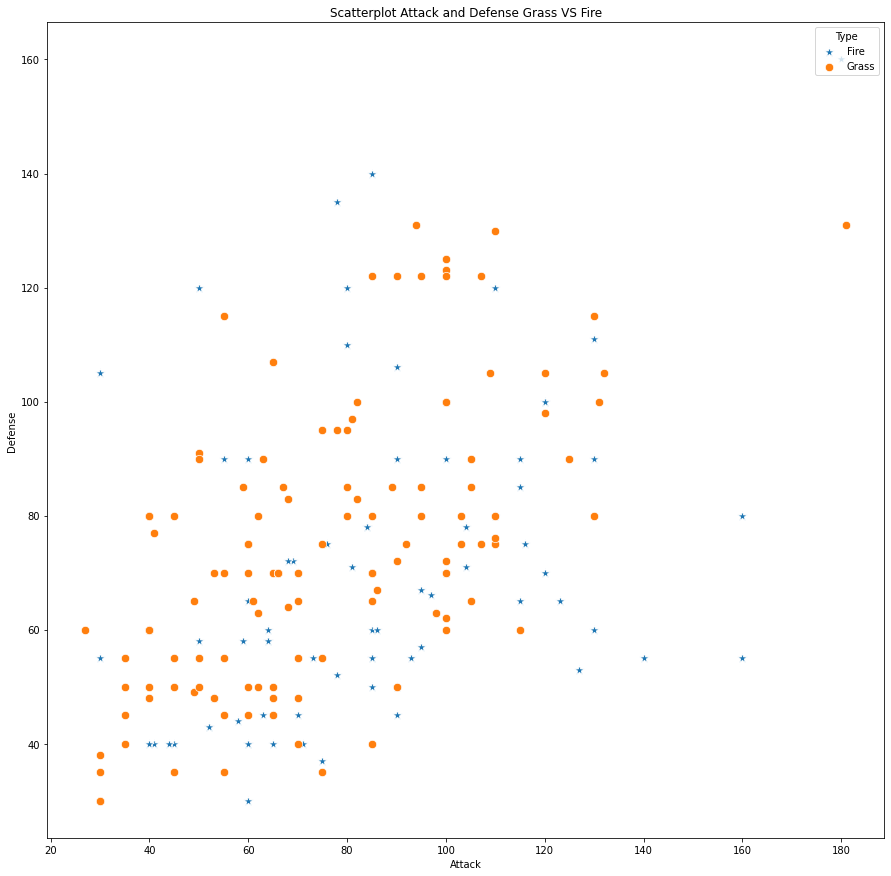

In [ ]:
# Scatterplot :

fig, ax = plt.subplots(figsize = (15, 15))

sns.scatterplot(data = df_pokemon, x = fire['Att'], y = fire['Def'], label = 'Fire', marker = "*", s = 100)
sns.scatterplot(data = df_pokemon, x = grass['Att'], y = grass['Def'], label = 'Grass', s = 70)
ax.legend(loc = 'upper right', title = 'Type')
ax.set_ylabel("Defense")
ax.set_xlabel("Attack")
ax.set_title("Scatterplot Attack and Defense Grass VS Fire")

plt.show()

#### Water VS Fire

In [ ]:
water = df_pokemon[(df_pokemon['Type 1'] == 'Water') | ((df_pokemon['Type 2']) == "Water")]
fire = df_pokemon[(df_pokemon['Type 1'] == 'Fire') | ((df_pokemon['Type 2']) == "Fire")]

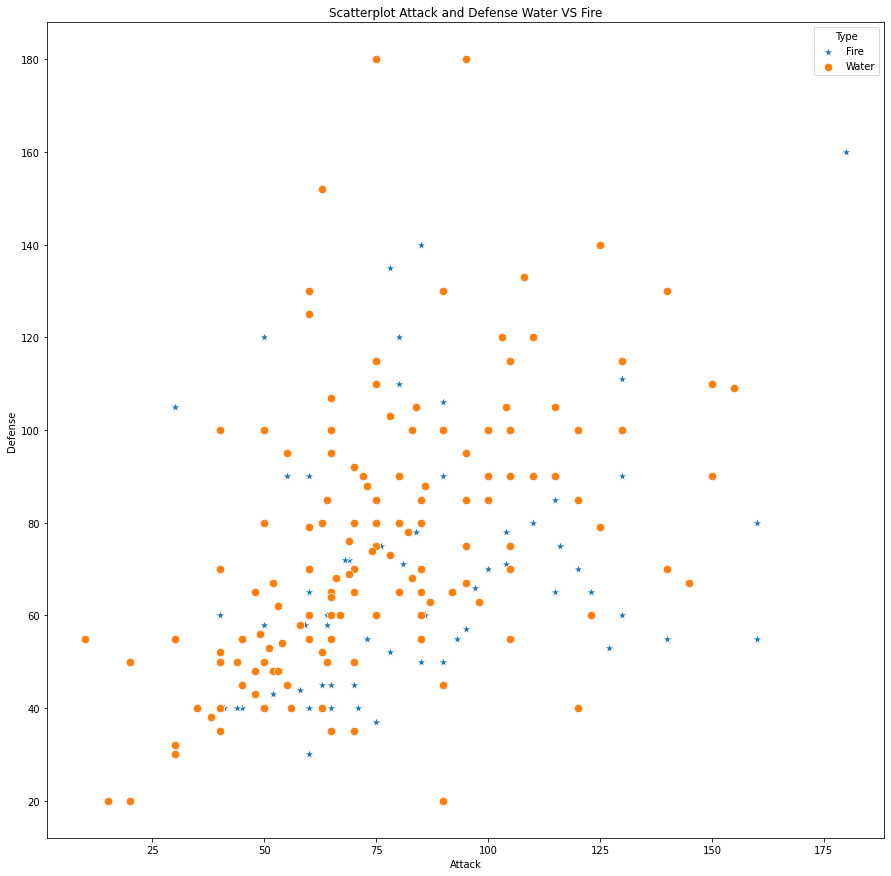

In [ ]:
# Scatterplot :

fig, ax = plt.subplots(figsize = (15, 15))

sns.scatterplot(data = df_pokemon, x = fire['Att'], y = fire['Def'], label = 'Fire', marker = "*", s = 100)
sns.scatterplot(data = df_pokemon, x = water['Att'], y = water['Def'], label = 'Water', s = 70)
ax.legend(loc = 'upper right', title = 'Type')
ax.set_ylabel("Defense")
ax.set_xlabel("Attack")
ax.set_title("Scatterplot Attack and Defense Water VS Fire")

plt.show()

Good idea, but it's too long to display many scatterplot to compare all stats and Types... Let's check an another solution.

### Strong Pokemon by Type

In [ ]:
top_types = df_pokemon['Type 1'].value_counts()[:10] # take the top 10 Types
types = df_pokemon[df_pokemon['Type 1'].isin(top_types.index)] # take the Pokemon of the type with highest numbers, top 10
types.head(5)

Number Type 1  Type 2                    Abilities  HP  Att  \
Name                                                                         
Bulbasaur           1  Grass  Poison  ['Chlorophyll', 'Overgrow']  45   49   
Ivysaur             2  Grass  Poison  ['Chlorophyll', 'Overgrow']  60   62   
Venusaur            3  Grass  Poison  ['Chlorophyll', 'Overgrow']  80   82   
Mega Venusaur       3  Grass  Poison                ['Thick Fat']  80  100   
Charmander          4   Fire     NaN     ['Blaze', 'Solar Power']  39   52   

               Def  Spa  Spd  Spe  BST        Mean  Standard Deviation  \
Name                                                                     
Bulbasaur       49   65   65   45  318   53.000000            8.640988   
Ivysaur         63   80   80   60  405   67.500000            8.902247   
Venusaur        83  100  100   80  525   87.500000            8.902247   
Mega Venusaur  123  122  120   80  625  104.166667           18.747592   
Charmander      43   60   50   65  309   51.500000            8.995369   

               Generation Experience type  Experience to level 100  \
Name                                                                 
Bulbasaur             1.0     Medium Slow                  1059860   
Ivysaur               1.0     Medium Slow                  1059860   
Venusaur              1.0     Medium Slow                  1059860   
Mega Venusaur         6.0     Medium Slow                  1059860   
Charmander            1.0     Medium Slow                  1059860   

               Final Evolution  Catch Rate  Legendary  Mega Evolution  \
Name                                                                    
Bulbasaur                  0.0          45        0.0             0.0   
Ivysaur                    0.0          45        0.0             0.0   
Venusaur                   1.0          45        0.0             0.0   
Mega Venusaur              1.0          45        0.0             1.0   
Charmander                 0.0          45        0.0             0.0   

               Alolan Form  Galarian Form  Against Normal  Against Fire  \
Name                                                                      
Bulbasaur              0.0            0.0             1.0           2.0   
Ivysaur                0.0            0.0             1.0           2.0   
Venusaur               0.0            0.0             1.0           2.0   
Mega Venusaur          0.0            0.0             1.0           2.0   
Charmander             0.0            0.0             1.0           0.5   

               Against Water  Against Electric  Against Grass  Against Ice  \
Name                                                                         
Bulbasaur                0.5               0.5           0.25          2.0   
Ivysaur                  0.5               0.5           0.25          2.0   
Venusaur                 0.5               0.5           0.25          2.0   
Mega Venusaur            0.5               0.5           0.25          2.0   
Charmander               2.0               1.0           0.50          0.5   

               Against Fighting  Against Poison  Against Ground  \
Name                                                              
Bulbasaur                   0.5             1.0             1.0   
Ivysaur                     0.5             1.0             1.0   
Venusaur                    0.5             1.0             1.0   
Mega Venusaur               0.5             1.0             1.0   
Charmander                  1.0             1.0             2.0   

               Against Flying  Against Psychic  Against Bug  Against Rock  \
Name                                                                        
Bulbasaur                 2.0              2.0          1.0           1.0   
Ivysaur                   2.0              2.0          1.0           1.0   
Venusaur                  2.0              2.0          1.0           1.0   
Mega Venusaur     

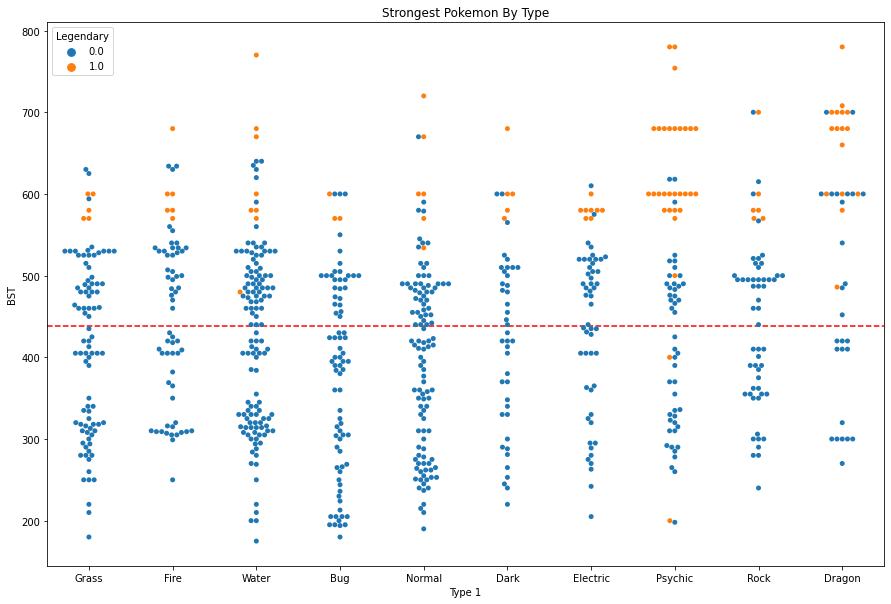

In [ ]:
plt.figure(figsize = (15, 10))

sns.swarmplot(data = types, x = 'Type 1', y = 'BST', hue = 'Legendary') # each point belonging to individual Pokemon
plt.axhline(types['BST'].mean(), color = 'red', linestyle = 'dashed')
plt.ylabel("BST")
plt.xlabel("Type 1")
plt.title('Strongest Pokemon By Type')

plt.show()

Legendary :
- 0.0 = No
- 1.0 = Yes

Legendaries are the strongest Pokemon (except 2).

### With BST column

Which type is the best in Pokemon ? We will use the column BST.

In [ ]:
# Final Evolution = Yes
# Legendaries = No
# Mega Evolution = No
# Create a DF group by stats
# Groupby Type 1 / Type 2 and BST mean / 2

best1 = (df_pokemon[(df_pokemon['Final Evolution'] == 1) & (df_pokemon['Legendary'] == 0) & (df_pokemon['Mega Evolution'] == 0)].groupby('Type 1')['BST'].mean()/2.0).sort_values(ascending = False).to_frame()
best1

BST
Type 1              
Dragon    284.166667
Fire      252.875000
Flying    250.833333
Rock      250.772727
Fairy     248.722222
Steel     247.727273
Ghost     246.733333
Grass     246.236842
Ice       244.966667
Water     244.816667
Poison    244.473684
Ground    243.333333
Dark      241.289474
Electric  240.950000
Fighting  239.447368
Psychic   237.119048
Normal    229.363636
Bug       226.628571

In [ ]:
best2 = (df_pokemon[(df_pokemon['Final Evolution'] == 1) & (df_pokemon['Legendary'] == 0) & (df_pokemon['Mega Evolution'] == 0)].groupby('Type 2')['BST'].mean()/2.0).sort_values(ascending = False).to_frame()
best2

BST
Type 2              
Dragon    258.035714
Fighting  257.833333
Fire      256.666667
Ice       253.400000
Dark      253.233333
Ground    248.333333
Water     247.222222
Psychic   246.214286
Steel     244.617647
Bug       243.625000
Rock      242.222222
Grass     241.625000
Normal    240.125000
Electric  239.800000
Flying    237.901961
Fairy     235.666667
Poison    232.846154
Ghost     226.850000

In [ ]:
df_mean_BST = round(pd.DataFrame(best1.add(best2, fill_value = 0)).sort_values(by = 'BST', ascending = False), 2)
df_mean_BST

BST
Dragon    542.20
Fire      509.54
Ice       498.37
Fighting  497.28
Dark      494.52
Rock      492.99
Steel     492.34
Water     492.04
Ground    491.67
Flying    488.74
Grass     487.86
Fairy     484.39
Psychic   483.33
Electric  480.75
Poison    477.32
Ghost     473.58
Bug       470.25
Normal    469.49

In [ ]:
df_mean_BST = df_mean_BST.reset_index()
df_mean_BST.columns = ['Type', 'Mean BST']
df_mean_BST = df_mean_BST.sort_values(by = 'Mean BST', ascending = False)
df_mean_BST

Type  Mean BST
0     Dragon    542.20
1       Fire    509.54
2        Ice    498.37
3   Fighting    497.28
4       Dark    494.52
5       Rock    492.99
6      Steel    492.34
7      Water    492.04
8     Ground    491.67
9     Flying    488.74
10     Grass    487.86
11     Fairy    484.39
12   Psychic    483.33
13  Electric    480.75
14    Poison    477.32
15     Ghost    473.58
16       Bug    470.25
17    Normal    469.49

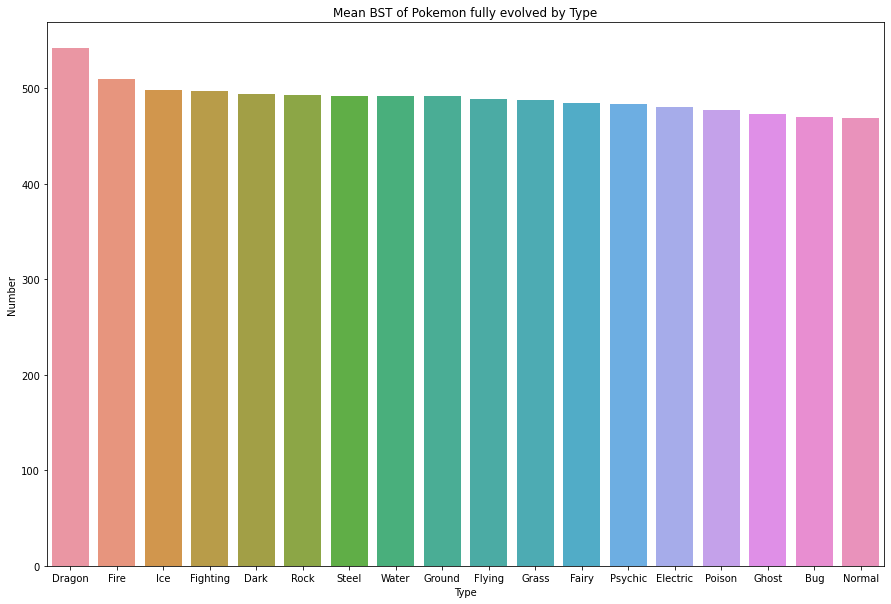

In [ ]:
# Figure :

fig, ax = plt.subplots(figsize = (15, 10))
sns.barplot(data = df_mean_BST, x = 'Type', y = 'Mean BST')
plt.ylabel("Number")
plt.xlabel("Type")
ax.set_title('Mean BST of Pokemon fully evolved by Type')

plt.show()

- The best Type --> Dragon, followed by Fire.
- The worst Type --> Normal.

### With Mean stats

Group by Types and get the mean values of each stat and by Generation. 

In [ ]:
labels = np.array(['HP','Sp.Atk','Sp. Def','Speed','Defense','Attack'])
angles = np.linspace(0,2 * np.pi, len(labels), endpoint = False)
angles = np.concatenate((angles, [angles[0]]))
angles

array([0.        , 1.04719755, 2.0943951 , 3.14159265, 4.1887902 ,
       5.23598776, 0.        ])

In [ ]:
angles = np.concatenate((angles, [angles[0]]))
angles

array([0.        , 1.04719755, 2.0943951 , 3.14159265, 4.1887902 ,
       5.23598776, 0.        , 0.        ])

In [ ]:
labels = np.array(['HP', 'Sp.Atk', 'Sp. Def', 'Speed', 'Defense', 'Attack'])
angles = np.linspace(0,2 * np.pi, len(labels), endpoint = False)
angles = np.concatenate((angles, [angles[0]]))
angles

array([0.        , 1.04719755, 2.0943951 , 3.14159265, 4.1887902 ,
       5.23598776, 0.        ])

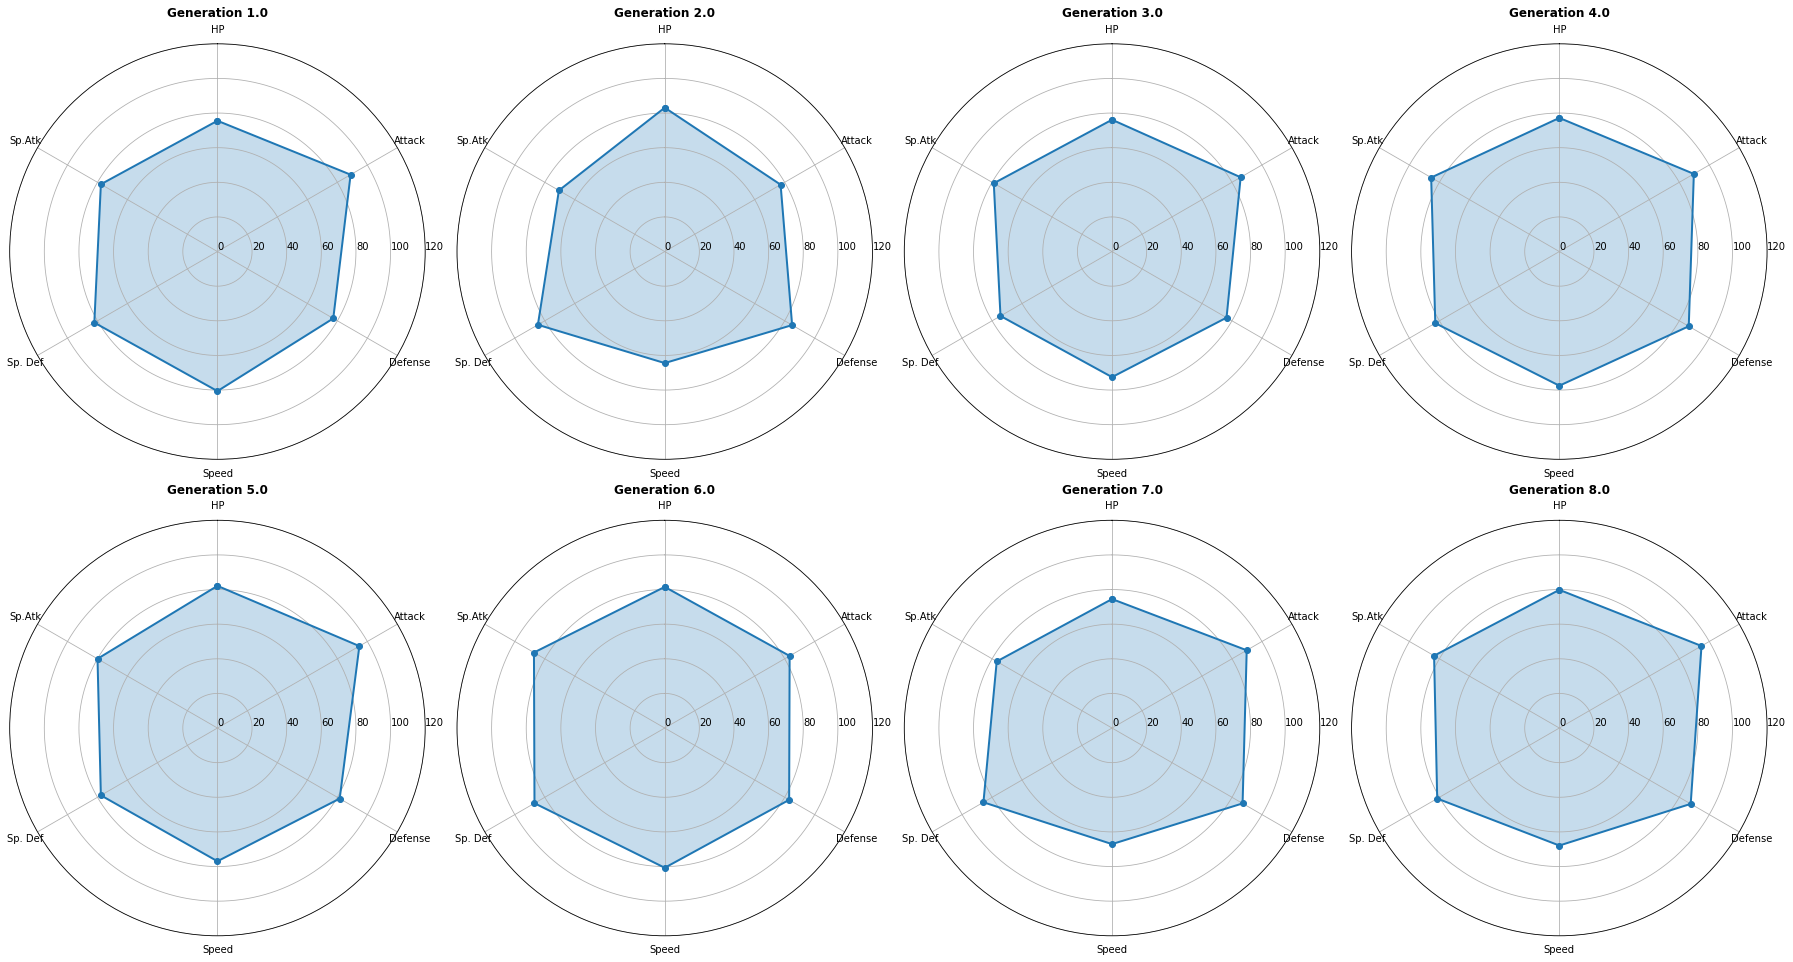

In [ ]:
# Figure :

fig, ax = plt.subplots(subplot_kw = {'projection': 'polar'}, nrows = 2, ncols = 4, figsize = (25, 25))
fig.patch.set_facecolor('white')
counter = 0
ncols = 4

for i in np.sort(df_pokemon['Generation'].unique()):
        generation_df = df_pokemon[(df_pokemon['Generation'] == i) & (df_pokemon['Final Evolution'] == 1) & (df_pokemon['Legendary'] == 0) & (df_pokemon['Mega Evolution'] == 0)][['HP', 'Att', 'Def', 'Spa', 'Spd', 'Spe']]
        generation_mean_df = generation_df.mean(axis = 0)

        j =  counter % ncols
        k = (counter-j) // ncols
        
        stats = [generation_mean_df.values[0], generation_mean_df.values[3], generation_mean_df.values[4], generation_mean_df.values[5], generation_mean_df.values[2], generation_mean_df.values[1]]
        
        stats=np.concatenate((stats, [stats[0]]))
        
        ax[k,j].set_theta_zero_location("N")
        ax[k,j].plot(angles, stats, 'o-', linewidth = 2)
        ax[k,j].fill(angles, stats, alpha = 0.25)
        ax[k,j].set_rticks([0, 20, 40, 60, 80, 100, 120])
        ax[k,j].set_rlabel_position(-90.0)
        ax[k,j].set_thetagrids((angles * 180/np.pi)[0:6], labels)
        ax[k,j].set_title('Generation '+ str(i), fontweight = 'bold',fontsize = 12)
        ax[k,j].grid(True)
        ax[k,j].set_facecolor('white')
        counter  = counter + 1
        plt.tight_layout() 

plt.subplots_adjust(left = None, bottom = None, right = None, top = None, wspace = 0.05, hspace = None)
plt.tight_layout()

plt.show()

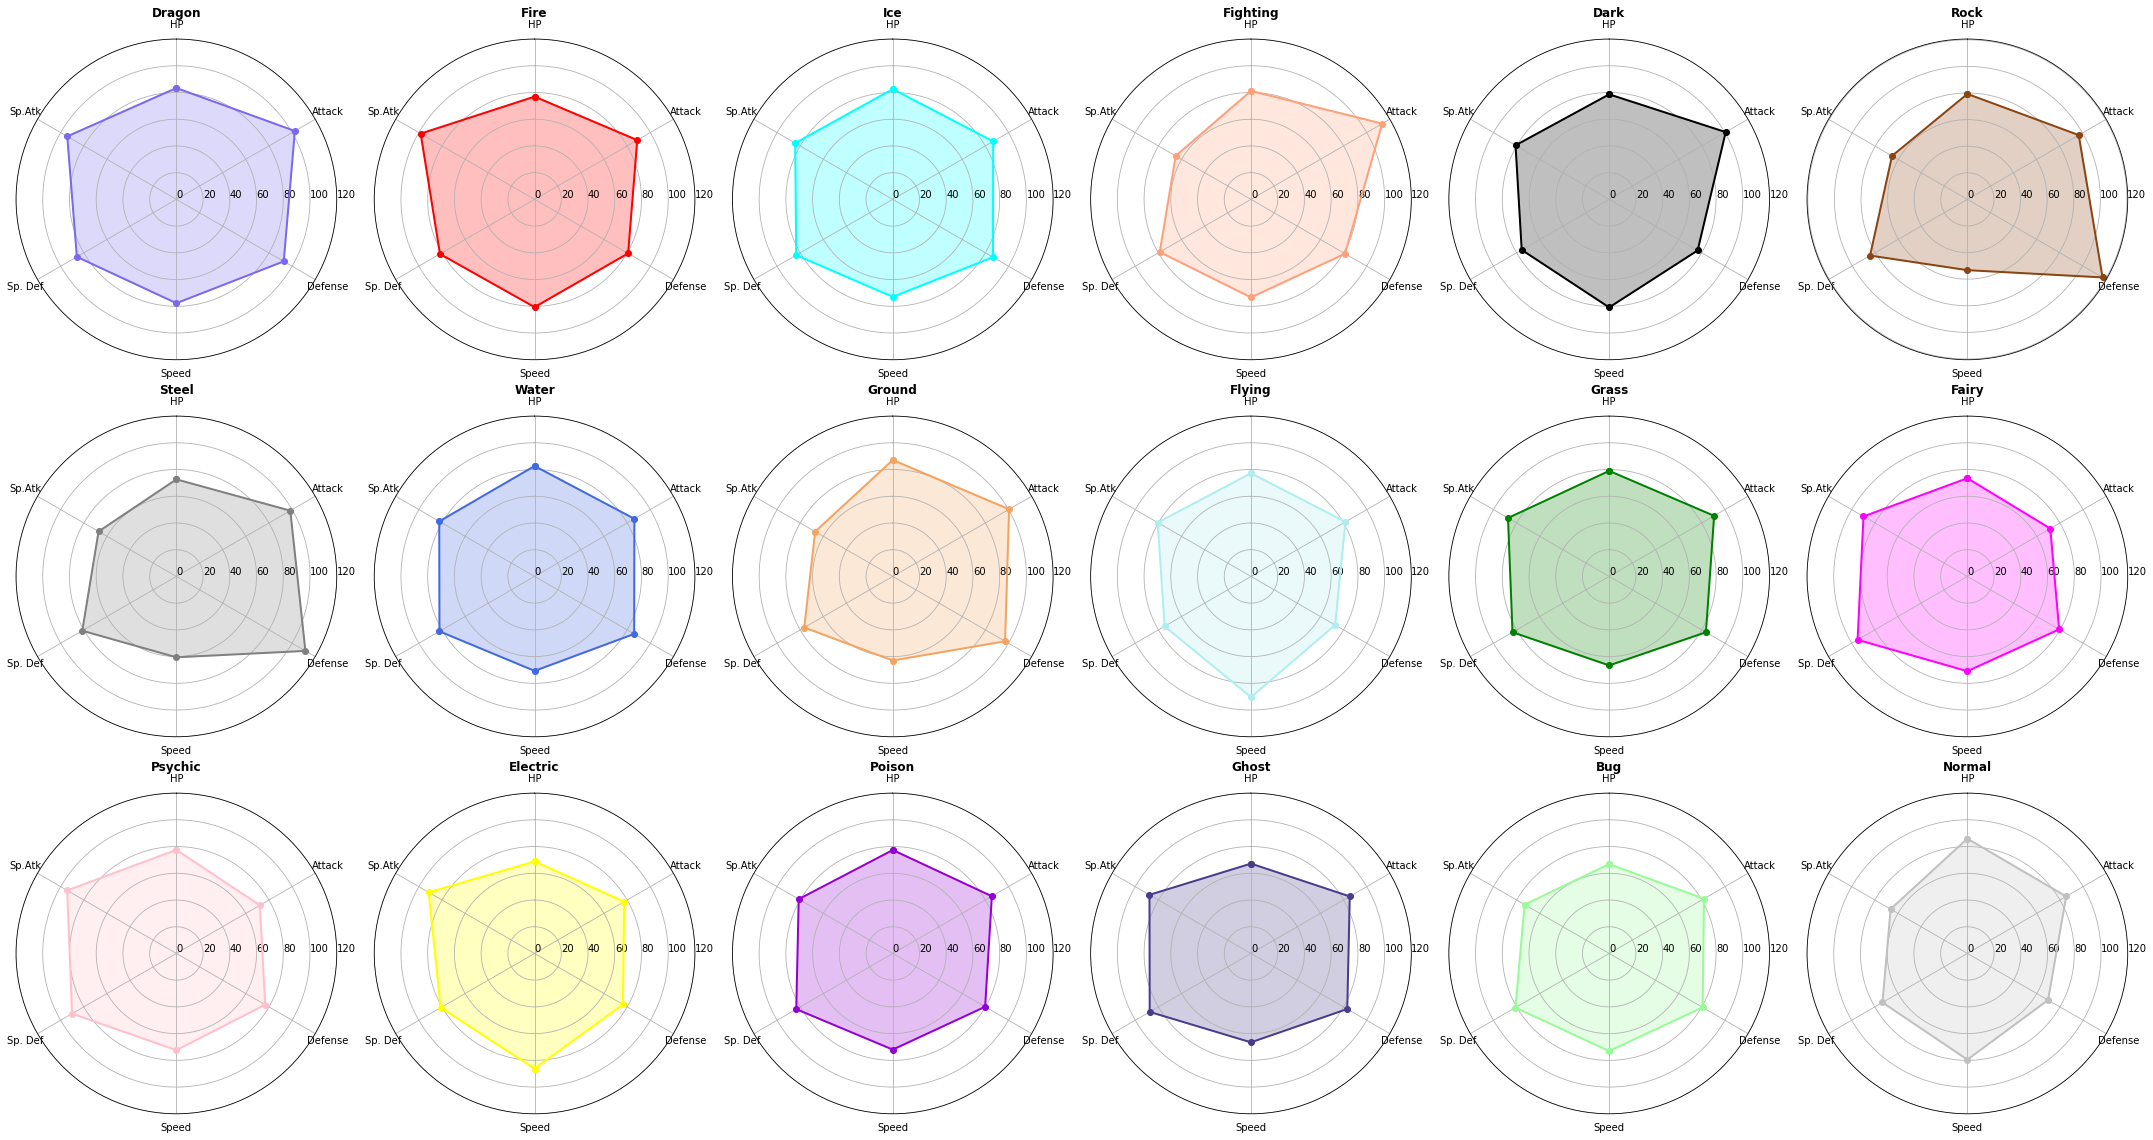

In [ ]:
# Figure :

fig, ax = plt.subplots(subplot_kw = {'projection': 'polar'}, nrows = 3, ncols = 6, figsize = (30, 30))
fig.patch.set_facecolor('white')
counter = 0
ncols = 6

colors = {'Fire':'red', 'Water':'royalblue', 'Grass':'green','Poison':'darkviolet','Steel':'grey','Bug':'palegreen','Normal':'silver','Dark':'k','Electric':'yellow','Ground':'sandybrown','Rock':'saddlebrown','Ice':'aqua','Fairy':'fuchsia','Fighting':'lightsalmon','Psychic':'pink','Ghost':'darkslateblue','Dragon':'mediumslateblue','Flying':'paleturquoise'}

for i in df_mean_BST.sort_values(by = 'Mean BST', ascending = False)['Type']:

    type_df = df_pokemon[((df_pokemon['Type 1'] == i) | ((df_pokemon['Type 2']) == i)) & (df_pokemon['Final Evolution'] == 1) & (df_pokemon['Mega Evolution'] == 0) & (df_pokemon['Legendary'] == 0)][['HP', 'Att', 'Def', 'Spa', 'Spd', 'Spe']]
    type_mean_df = type_df.mean(axis = 0)

    j =  counter % ncols
    k = (counter-j) // ncols
        
    stats = [type_mean_df.values[0], type_mean_df.values[3], type_mean_df.values[4], type_mean_df.values[5], type_mean_df.values[2], type_mean_df.values[1]]
    stats = np.concatenate((stats, [stats[0]]))
        
    ax[k,j].set_theta_zero_location("N")
    ax[k,j].plot(angles, stats, 'o-', linewidth = 2, color = colors[i])
    ax[k,j].fill(angles, stats, alpha = 0.25, color = colors[i])
    ax[k,j].set_rticks([0,20, 40, 60, 80, 100, 120])
    ax[k,j].set_rlabel_position(-90.0)
    ax[k,j].set_thetagrids((angles * 180 / np.pi)[0:6], labels)
    ax[k,j].set_title(i, fontweight = 'bold', fontsize = 12)
    ax[k,j].grid(True)
    ax[k,j].set_facecolor('white')
    counter = counter + 1
    plt.tight_layout()  

plt.subplots_adjust(left = None, bottom = None, right = None, top = None, wspace = 0.05, hspace = None)
plt.tight_layout()
plt.show()

This plot is ordered by Mean BST. Dragon Pokemon have the highest stats.

# MACHINE LEARNING

## Predicting Legendary

We will create a model to predict if a Pokemon is Legendary or not. Typically Legendary Pokemons have really high stats and a low catch rate, hence we will use them in our model. Data will be separed in training and test sets. 

Since we have access to the legendary labels this is a supervised classification problem, hence we use a Linear Support Vector Classification model.

In [13]:
# Define X and y :

X = df_pokemon[['HP', 'Att', 'Def', 'Spa', 'Spd','Spe', 'BST','Standard Deviation', 'Catch Rate']] # Numeric Features
y = df_pokemon['Legendary'] # Target

In [15]:
# Train-Test-Split :

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 32)
print("The length of the initial dataset is :", len(X))
print("The length of the test dataset is    :", len(X_test))
print("The length of the train dataset is   :", len(X_train))

The length of the initial dataset is : 1032
The length of the test dataset is    : 310
The length of the train dataset is   : 722


In [16]:
clf = make_pipeline(StandardScaler(), LinearSVC(random_state = 0, tol = 1e-5, max_iter = 100000))
clf

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(max_iter=100000, random_state=0, tol=1e-05))])

In [17]:
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(max_iter=100000, random_state=0, tol=1e-05))])

In [18]:
y_pred = clf.predict(X_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
print(confusion_matrix(y_test, y_pred))

[[271   4]
 [  6  29]]


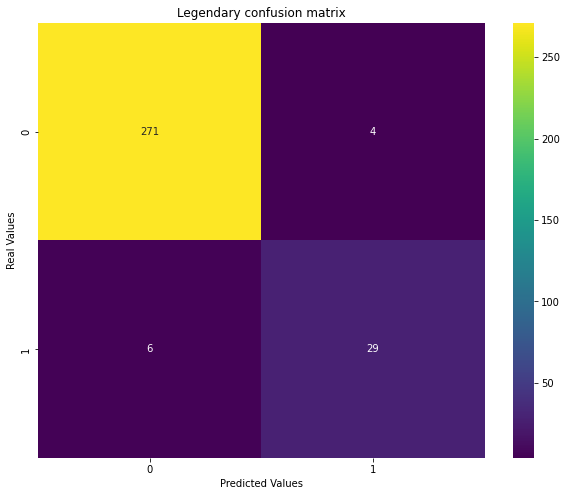

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = 'viridis',  fmt = 'g')
ax.set_ylabel('Real Values')
ax.set_xlabel('Predicted Values')
ax.set_title('Legendary confusion matrix')

plt.show()

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       275
         1.0       0.88      0.83      0.85        35

    accuracy                           0.97       310
   macro avg       0.93      0.91      0.92       310
weighted avg       0.97      0.97      0.97       310



The model in general is very satisfactory --> worst value = 0.83 recall for the Legendary Pokemons, meaning that the model usually detects legendary Pokemons as non-legendary. 

However for the true non-legendary pokemons it achieves really high precision and recall. The main reason it achieves such a high recall for the Legendary Pokemons is the catch rate, if we remove it and we only train the model using the base stats it drops to  0.5.

## Predicting Final Evolutions

In [24]:
X = df_pokemon[['HP', 'Att', 'Def', 'Spa', 'Spd','Spe', 'BST','Standard Deviation']]
y = df_pokemon['Final Evolution']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 32)
print("The length of the initial dataset is :", len(X))
print("The length of the test dataset is    :", len(X_test))
print("The length of the train dataset is   :", len(X_train))

The length of the initial dataset is : 1032
The length of the test dataset is    : 310
The length of the train dataset is   : 722


In [26]:
clf = make_pipeline(StandardScaler(), LinearSVC(random_state = 0, tol = 1e-5, max_iter = 100000))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(max_iter=100000, random_state=0, tol=1e-05))])

In [28]:
y_pred = clf.predict(X_test)
y_pred

array([0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 1.

In [29]:
print(confusion_matrix(y_test, y_pred))

[[126  17]
 [  9 158]]


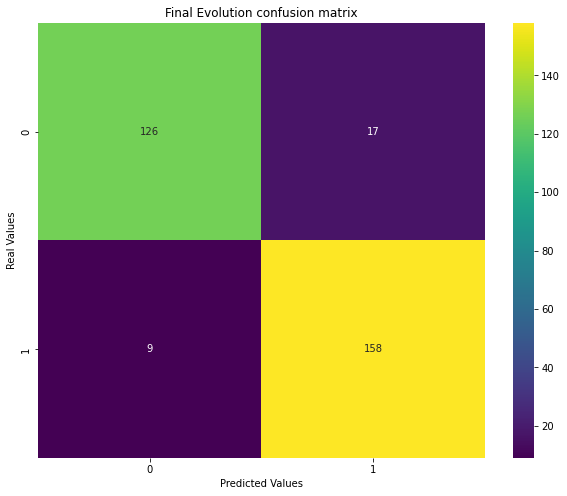

In [30]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = 'viridis',  fmt = 'g')
ax.set_ylabel('Real Values')
ax.set_xlabel('Predicted Values')
ax.set_title('Final Evolution confusion matrix')
plt.show()

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.88      0.91       143
         1.0       0.90      0.95      0.92       167

    accuracy                           0.92       310
   macro avg       0.92      0.91      0.92       310
weighted avg       0.92      0.92      0.92       310



As well as before the model is satisfactory. Using only base stats we can predict if a Pokemon is a final evolution or not with high accuracy.

## Predicting Base Stats

This is a harder problem, we will try to predict each base stat using the Catch rate, the experience it takes the pokemon to reach level 100, their weaknesses, etc. Since we are trying to predict a quantity we have a regression problem, we have a lot of features that can be important, so we are using a Elastic Net.

In [34]:
types = pd.unique(df_pokemon['Type 1'])

against = []
for i in types:
    against.append('Against {}'.format(i))

In [38]:
stats = ['HP', 'Att', 'Def', 'Spa', 'Spd', 'Spe']
X = df_pokemon[['Catch Rate', 'Final Evolution', 'Legendary', 'Mega Evolution', 'Experience to level 100'] + against]

line = np.linspace(0, 150, 1000)
line

array([  0.        ,   0.15015015,   0.3003003 ,   0.45045045,
         0.6006006 ,   0.75075075,   0.9009009 ,   1.05105105,
         1.2012012 ,   1.35135135,   1.5015015 ,   1.65165165,
         1.8018018 ,   1.95195195,   2.1021021 ,   2.25225225,
         2.4024024 ,   2.55255255,   2.7027027 ,   2.85285285,
         3.003003  ,   3.15315315,   3.3033033 ,   3.45345345,
         3.6036036 ,   3.75375375,   3.9039039 ,   4.05405405,
         4.2042042 ,   4.35435435,   4.5045045 ,   4.65465465,
         4.8048048 ,   4.95495495,   5.10510511,   5.25525526,
         5.40540541,   5.55555556,   5.70570571,   5.85585586,
         6.00600601,   6.15615616,   6.30630631,   6.45645646,
         6.60660661,   6.75675676,   6.90690691,   7.05705706,
         7.20720721,   7.35735736,   7.50750751,   7.65765766,
         7.80780781,   7.95795796,   8.10810811,   8.25825826,
         8.40840841,   8.55855856,   8.70870871,   8.85885886,
         9.00900901,   9.15915916,   9.30930931,   9.45

HP Mean absolute error is : 14.456271552692494
Att Mean absolute error is : 18.225175811857802
Def Mean absolute error is : 18.72753259281601
Spa Mean absolute error is : 18.142565083288
Spd Mean absolute error is : 15.90461990363296
Spe Mean absolute error is : 18.795955915704244


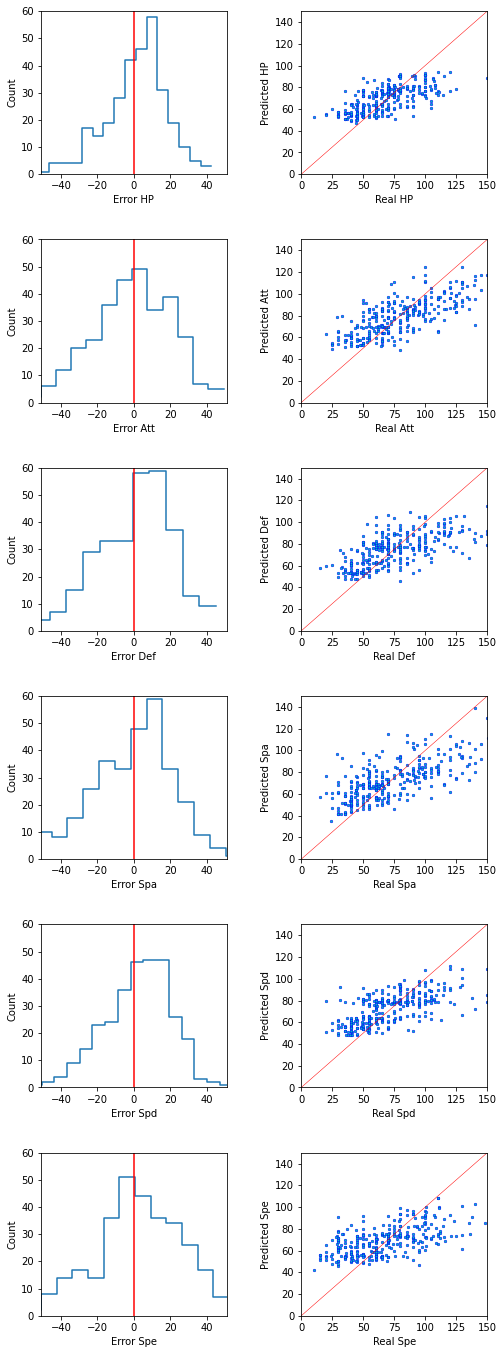

In [43]:
fig, ax = plt.subplots(figsize=(8, 24), ncols = 2, nrows = 6)

for i in range(6):
    y = df_pokemon[stats[i]]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

    regr = make_pipeline(StandardScaler(), ElasticNet(random_state = 4, tol = 1e-2))
    regr.fit(X_train, y_train)

    y_pred = regr.predict(X_test)

    print(stats[i], 'Mean absolute error is :', mean_absolute_error(y_pred, y_test))

    sns.histplot(y_pred - y_test, ax = ax[i, 0], element="step", fill = False, label = stats[i])
    ax[i, 0].set_xlim(-51, 51)
    ax[i, 0].set_ylim(0, 60)
    ax[i, 0].axvline(x = 0, color = 'red')
    ax[i, 0].set_xlabel('Error {}'.format(stats[i]))

    ax[i, 1].plot(line,line, color = 'red', linewidth = 0.5)  
    ax[i, 1].scatter(y_test, y_pred, s = 7, color = 'c', edgecolor = 'b', linewidth = 0.5, marker = "o")
    ax[i, 1].set_xlim(0, 150)
    ax[i, 1].set_ylim(0, 150)
    ax[i, 1].set_xlabel('Real {}'.format(stats[i]))
    ax[i, 1].set_ylabel('Predicted {}'.format(stats[i]))
    
    
plt.subplots_adjust(hspace=.4, wspace = 0.4)
plt.show()